In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
from bs4 import BeautifulSoup as bs

In [4]:
root = 'http://uba.tw'

In [574]:
soup = bs(endpoint)

NameError: name 'endpoint' is not defined

In [ ]:
resource = [{'team': i.find_all('img')[0].get('alt'), 'url': root + i.find_all('a')[0].get('href')} for i in soup.find_all('li')]

In [575]:
resource[0]['url']

NameError: name 'resource' is not defined

In [ ]:
for res in resource:
    roster = pd.read_html(res['url'], flavor='html5lib')[1]
    roster.columns = roster.iloc[0, :]
    roster = roster.iloc[1:, :]
    roster.head()
    res['roster'] = roster

In [5]:
def gen_game(txt):   
    df =pd.read_html(txt, flavor='html5lib')
    gbox = df[7]
    gbox.columns = gbox.iloc[0, :]
    gbox = gbox.iloc[1:, :]

    tboxs = []
    for i,j in enumerate(gbox.iloc[:, 0]):
        tbox = {}
        tbox['team'] = j
        tdf = df[i+7+1]
        tdf.columns = tdf.iloc[1, :]
        tdf = tdf.iloc[3:, :]
        
        tdf.columns = ['背號', '姓名'] + list(tdf.columns[2:])
        
        tdf['PTS'] = tdf['得分'].astype(int)
        
        tdf['ORB'] = tdf['進攻'].astype(int)
        tdf['DRB'] = tdf['防守'].astype(int)
        tdf['TRB'] = tdf['ORB'] + tdf['DRB']
        
        tdf['AST'] = tdf['助攻'].astype(int)
        tdf['TOV'] = tdf['失誤'].astype(int)
        
        tdf['STL'] = tdf['抄截'].astype(int)
        tdf['BLK'] = tdf['阻攻'].astype(int)
        tdf['MP'] = tdf['時間'].apply(lambda x: None if pd.isna(x) else int(x)) 
        
        tdf['2FGM'] = tdf['二分'].apply(lambda x: int(x.split('-')[0]))

        tdf['2FGA'] = tdf['二分'].apply(lambda x: int(x.split('-')[1]))

        tdf['3FGM'] = tdf['三分'].apply(lambda x: int(x.split('-')[0]))
        tdf['3FGA'] = tdf['三分'].apply(lambda x: int(x.split('-')[1]))

        tdf['FGA'] = tdf['2FGA'] + tdf['3FGA']
        tdf['FGM'] = tdf['2FGM'] + tdf['3FGM']

        tdf['FTA'] = tdf['罰球'].apply(lambda x: int(x.split('-')[0]))
        tdf['FTM'] = tdf['罰球'].apply(lambda x: int(x.split('-')[1]))
        
        tbox['df'] = tdf[['姓名', '背號', 'MP', 'PTS', '2FGA', '2FGM', '3FGA', '3FGM', 'FTA', 'FTM', 'FGA', 'FGM', 'ORB', 'DRB', 'TRB', 'STL', 'BLK', 'AST', 'TOV']]
        tboxs.append(tbox)
        
    soup = bs(txt)

    links = [i.get('href') for i in soup.find_all('a')]    
    links = [root + i for i in links if 'PlayByPlay' in i]
    
    if len(links) >0:        

        pbp = pd.read_html(links[0], flavor='html5lib')[0]
        pbp.columns = pbp.iloc[0, :]
        pbp = pbp.iloc[:0:-1, :]
        pbp
    
        return {'gbox': gbox, 'tbox': tboxs, 'play': pbp}
    else:
        return {'gbox': gbox, 'tbox': tboxs}

In [34]:
def gen_adv(tdf):

    tdf['TSA'] = tdf['FGA'] + tdf['FTA']* 0.44

    tdf['TS%'] = tdf['PTS'] / (2 * tdf['TSA']) * 100

    tdf['eFG%'] = (1.5 * tdf['3FGM'] + tdf['2FGM']) / tdf['FGA'] * 100
    
    return tdf

成大女籃

Game1

In [576]:
txt = """

                

<div class="left_content">
    <div class="final_block">
        <div class="final_title">
            <div class="final_logo">
                <img src="/Img/logo_s.png" width="78" height="38">
            </div>
            <div class="final_info">
                <div class="final_infoType">
                        <img src="/Images/fromWF/women_title.png">
                </div>
                <div class="final_infoName">2018年12月10日 PM 16:30 ＠臺灣大學 預賽</div>
            </div>
        </div>
        
        <div class="final_list">
            <div class="final_listSchool">
                <div class="listSchool_left">
                    <p>
                        <a href="/107/%E5%85%AC%E9%96%8B%E5%A5%B3%E4%B8%80%E7%B4%9A/Team/Index/1A2250BD-DED2-4C8B-9C10-88DC221100EB">佛光大學</a>
                        <br>
                    </p>
                </div>
                <div class="listSchool_right">
                    <p>
                        <a href="/107/%E5%85%AC%E9%96%8B%E5%A5%B3%E4%B8%80%E7%B4%9A/Team/Index/1F7EE3C9-3EBD-4852-BA98-E73323B571DA">成功大學</a>
                        <br>
                    </p>
                </div>
            </div>
            <div class="final_listTable">
                <div class="listTable_left">
                    <div class="badge_left">
                            <img src="/PhotoFiles/SchoolCodeManager/635246005016373786.jpg" width="44">
                            <br>
                    </div>
                        <div class="scores_left win">66</div>
                </div>
                <div class="listTable_center">
                    <div class="fixtures_table02">
                        <div class="fixtures_tableLi03">
                            <div class="school"></div>
                            <div class="roundtitle">
                                <span class="number"></span>
                                <span class="number">1</span>
                                <span class="number">2</span>
                                <span class="number">3</span>
                                <span class="number">4</span>
                                <span class="number">OT</span>
                                <span class="number">OT2</span>
                                <span class="number">OT3</span>
                                <span class="number"></span>
                            </div>
                        </div>
                        <div class="fixtures_tableLi03">
                            <div class="gray_bg">
                                <div class="school">
                                    <div class="school_name">
                                        <span>佛光大學</span>
                                    </div>
                                </div>
                                <div class="round">
                                    <span class="number">19</span>
                                    <span class="number">17</span>
                                    <span class="number">13</span>
                                    <span class="number">17</span>
                                    <span class="number"></span>
                                    <span class="number"></span>
                                    <span class="number"></span>
                                </div>
                                <div class="total_li01">
                                    
                                        <span class="text_win">66</span>
                                </div>
                            </div>
                        </div>
                        <div class="fixtures_tableLi04">
                            <div class="gray_bg">
                                <div class="school">
                                    <div class="school_name">
                                        <span>成功大學</span>
                                    </div>
                                </div>
                                <div class="round">
                                    <span class="number">4</span>
                                    <span class="number">14</span>
                                    <span class="number">0</span>
                                    <span class="number">9</span>
                                    <span class="number"></span>
                                    <span class="number"></span>
                                    <span class="number"></span>
                                </div>
                                <div class="total_li02">
                                    
                                        <span>27</span>
                                </div>
                            </div>
                        </div>
                    </div>
                        <div class="listTable_result">FINAL</div>


                </div>
                <div class="listTable_right">
                    <div class="badge_right">
                            <img src="/PhotoFiles/SchoolCodeManager/635207152198670862.jpg" width="44">
                            <br>

                    </div>
                        <div class="scores_right">27</div>
                </div>
            </div>
        </div>
    </div>
</div>
<div class="right_content noprint">
    
        <div class="custom_ad" style="margin-top: 10px;">
            <a href="https://www.youtube.com/watch?v=bBf0OT6eDrE" target="_blank"><img src="/Uploads/PhotoFile/EAF37853-DA72-4FB9-B2B4-4649C30EB8F8.png"></a>
        </div>
    <div class="spec_play_box">
        <ul>
            <li class="active"><a data-toggle="tab" href="#pts">得分王</a></li>
            <li><a data-toggle="tab" href="#rebound">籃板王</a></li>
            <li><a data-toggle="tab" href="#ast">助攻王</a></li>
        </ul>
        <div class="tab-content">
            <div id="pts" class="tab-pane fade in active">
                


            <table class="record_table03">
                <caption>佛光大學</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=cb668789-69b2-455e-957d-4de86ed1daf9" alt="球員圖片" width="30">
                        </td>
                        <td>
                            劉昕妤
                        </td>
                        <td>
                            12
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=824a10f9-3fea-421d-b04b-6bf99a0dcd89" alt="球員圖片" width="30">
                        </td>
                        <td>
                            楊婉琳
                        </td>
                        <td>
                            11
                        </td>
                    </tr>
                    <tr>
                        <td>
3                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=1a166cda-b80a-4d37-bfee-cd28981a8b07" alt="球員圖片" width="30">
                        </td>
                        <td>
                            羅培甄
                        </td>
                        <td>
                            10
                        </td>
                    </tr>
            </tbody></table>
            <table class="record_table03">
                <caption>成功大學</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=8e284df2-280b-4d3e-8edf-6fd7545223fb" alt="球員圖片" width="30">
                        </td>
                        <td>
                            李佳潔
                        </td>
                        <td>
                            10
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=e6385481-2fce-4089-9e2f-06d7005571ca" alt="球員圖片" width="30">
                        </td>
                        <td>
                            王勻妤
                        </td>
                        <td>
                            6
                        </td>
                    </tr>
                    <tr>
                        <td>
3                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=40328c80-77ab-4529-8b37-f67b337a4448" alt="球員圖片" width="30">
                        </td>
                        <td>
                            陳亭安
                        </td>
                        <td>
                            4
                        </td>
                    </tr>
            </tbody></table>

            </div>
            <div id="rebound" class="tab-pane fade">
                


            <table class="record_table03">
                <caption>佛光大學</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=cb668789-69b2-455e-957d-4de86ed1daf9" alt="球員圖片" width="30">
                        </td>
                        <td>
                            劉昕妤
                        </td>
                        <td>
                            13
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=6fd9dfd1-0075-4835-b04c-5633c1cb737e" alt="球員圖片" width="30">
                        </td>
                        <td>
                            王竫婷
                        </td>
                        <td>
                            11
                        </td>
                    </tr>
                    <tr>
                        <td>
3                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=f097c86d-5090-4817-80cd-d1d87a5d03f8" alt="球員圖片" width="30">
                        </td>
                        <td>
                            陳孟欣
                        </td>
                        <td>
                            8
                        </td>
                    </tr>
            </tbody></table>
            <table class="record_table03">
                <caption>成功大學</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=0e84bb0e-4046-4e27-b162-069bd22b0308" alt="球員圖片" width="30">
                        </td>
                        <td>
                            陳雅婷
                        </td>
                        <td>
                            6
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=e6385481-2fce-4089-9e2f-06d7005571ca" alt="球員圖片" width="30">
                        </td>
                        <td>
                            王勻妤
                        </td>
                        <td>
                            5
                        </td>
                    </tr>
                    <tr>
                        <td>
3                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=9f135e8b-49bd-4ed2-b442-cb50704756b5" alt="球員圖片" width="30">
                        </td>
                        <td>
                            蔡卉妮
                        </td>
                        <td>
                            4
                        </td>
                    </tr>
            </tbody></table>

            </div>
            <div id="ast" class="tab-pane fade">
                


            <table class="record_table03">
                <caption>佛光大學</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=f097c86d-5090-4817-80cd-d1d87a5d03f8" alt="球員圖片" width="30">
                        </td>
                        <td>
                            陳孟欣
                        </td>
                        <td>
                            4
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=0400d1ba-d1c9-4af0-86f6-7563b8ea0934" alt="球員圖片" width="30">
                        </td>
                        <td>
                            羅培儀
                        </td>
                        <td>
                            2
                        </td>
                    </tr>
                    <tr>
                        <td>
3                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=4863e7d8-cf1e-4259-b1fa-2eed65c2873d" alt="球員圖片" width="30">
                        </td>
                        <td>
                            楊芷瑜
                        </td>
                        <td>
                            1
                        </td>
                    </tr>
            </tbody></table>
            <table class="record_table03">
                <caption>成功大學</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=40328c80-77ab-4529-8b37-f67b337a4448" alt="球員圖片" width="30">
                        </td>
                        <td>
                            陳亭安
                        </td>
                        <td>
                            2
                        </td>
                    </tr>
                    <tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=772a0e3c-36e6-4c4f-b716-999152fbd491" alt="球員圖片" width="30">
                        </td>
                        <td>
                            周沛彤
                        </td>
                        <td>
                            2
                        </td>
                    </tr>
                    <tr>
                        <td>
3                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=9f135e8b-49bd-4ed2-b442-cb50704756b5" alt="球員圖片" width="30">
                        </td>
                        <td>
                            蔡卉妮
                        </td>
                        <td>
                            1
                        </td>
                    </tr>
            </tbody></table>

            </div>
        </div>
    </div>
</div>

<div class="boxscore_block">

    <h2>BOXSCORE</h2>

    <div class="noprint">
        <a href="" onclick="previewScreen(block)">
            <img src="/Images/fromWF/download_pdf.gif" alt="下載報表">
        </a>
    </div>
    
    <div id="block">
        
        <div class="hidden">
            <div class="table_boxer"><table align="center">
                <tbody><tr>
                    <td rowspan="2"><img src="/Img/logo_s.png" width="78" height="38"></td>
                    <td>
                            <img src="/Images/fromWF/women_title.png">
                    </td>
                </tr>
                <tr>
                    <td>2018年12月10日 PM 16:30 ＠臺灣大學 預賽</td>
                    </tr>
                </tbody></table>
            </div>
            <div class="table_boxer"><table align="center">
                <tbody><tr>
                    <td></td>
                    <td>0</td>
                    <td>1</td>
                    <td>2</td>
                    <td>3</td>
                    <td>OT</td>
                    <td>OT2</td>
                    <td>OT3</td>
                    <td></td>
                </tr>
                <tr>
                    <td>佛光大學</td>
                    <td>19</td>
                    <td>17</td>
                    <td>13</td>
                    <td>17</td>
                    <td></td>
                    <td></td>
                    <td></td>
                    <td>
                            <span class="text_win">66</span>
                    </td>
                </tr>
                <tr>
                    <td>成功大學</td>
                    <td>4</td>
                    <td>14</td>
                    <td>0</td>
                    <td>9</td>
                    <td></td>
                    <td></td>
                    <td></td>
                    <td>
                            <span>27</span>
                        </td>
                    </tr>
                </tbody></table>
            </div>
        </div>
        <div ng-app="sortApp" class="ng-scope">
            <div ng-controller="homeSortController" class="ng-scope">

<div class="boxscore_content">
        <div class="record_tableTitle">
            <span>佛光大學</span>
        </div>
        <div class="record_table">
            <div>
                <div class="table_boxer"><table class="record_table03 rctable">
                    <tbody><tr class="rctable_tr">
                        <td colspan="9">命中率 FIELD GOALS</td>
                        <td colspan="10">籃板 REBOUNDS</td>
                    </tr>
                    <tr class="rctable_tr02">
                        <td></td>
                        <td></td>
                        <td>先發</td>
                        <td>時間</td>
                        <td>二分</td>
                        <td>%</td>
                        <td>三分</td>
                        <td>%</td>
                        <td>罰球</td>
                        <td>%</td>
                        <td>進攻</td>
                        <td>防守</td>
                        <td>總計</td>
                        <td>助攻</td>
                        <td>抄截</td>
                        <td>阻攻</td>
                        <td>失誤</td>
                        <td>犯規</td>
                        <td>得分</td>
                    </tr>

                    <tr class="rctable_tr02">
                        <td></td>
                        <td></td>
                        <td>GS</td>
                        <td>
                            <a href="" ng-click="sortType = 'TimeTOT'; sortReverse = !sortReverse">
                                MIN
                                <span ng-show="sortType == 'TimeTOT' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TimeTOT' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>FGM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'FGMAPercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'FGMAPercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'FGMAPercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>3PM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'ThreePercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'ThreePercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'ThreePercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>FTM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'FTMAPercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'FTMAPercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'FTMAPercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'OFF'; sortReverse = !sortReverse">
                                OFF
                                <span ng-show="sortType == 'OFF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'OFF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'DFF'; sortReverse = !sortReverse">
                                DFF
                                <span ng-show="sortType == 'DFF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'DFF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'TOT'; sortReverse = !sortReverse">
                                TOT
                                <span ng-show="sortType == 'TOT' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TOT' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'AST'; sortReverse = !sortReverse">
                                AST
                                <span ng-show="sortType == 'AST' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'AST' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'ST'; sortReverse = !sortReverse">
                                ST
                                <span ng-show="sortType == 'ST' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'ST' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'BS'; sortReverse = !sortReverse">
                                BS
                                <span ng-show="sortType == 'BS' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'BS' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'TO'; sortReverse = !sortReverse">
                                TO
                                <span ng-show="sortType == 'TO' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TO' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'PF'; sortReverse = !sortReverse">
                                PF
                                <span ng-show="sortType == 'PF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'PF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'PTS'; sortReverse = !sortReverse">
                                PTS
                                <span ng-show="sortType == 'PTS' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'PTS' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                    </tr>

                    <!-- ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">5</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                陳孟欣
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">17</td>
                        <td class="ng-binding">2-4</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">0-2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">8</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">4</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">10</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                林嘉慈
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">16</td>
                        <td class="ng-binding">2-5</td>
                        <td class="ng-binding">40</td>
                        <td class="ng-binding">0-3</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">4</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">12</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                楊芷瑜
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">21</td>
                        <td class="ng-binding">4-8</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1-1</td>
                        <td class="ng-binding">100</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">9</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">13</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                王竫婷
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">21</td>
                        <td class="ng-binding">3-4</td>
                        <td class="ng-binding">75</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1-4</td>
                        <td class="ng-binding">25</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">6</td>
                        <td class="ng-binding">11</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">7</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">35</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                羅培甄
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">19</td>
                        <td class="ng-binding">3-7</td>
                        <td class="ng-binding">42.9</td>
                        <td class="ng-binding">0-4</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">4-5</td>
                        <td class="ng-binding">80</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">8</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">10</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">1</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                劉昕妤
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">27</td>
                        <td class="ng-binding">5-7</td>
                        <td class="ng-binding">71.4</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2-2</td>
                        <td class="ng-binding">100</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">9</td>
                        <td class="ng-binding">13</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">12</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">2</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                林品漩
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">0-2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2-2</td>
                        <td class="ng-binding">100</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">6</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                羅培儀
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">17</td>
                        <td class="ng-binding">0-2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1-5</td>
                        <td class="ng-binding">20</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">3</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">7</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                黃沁瑜
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">15</td>
                        <td class="ng-binding">0-3</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">9</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                張世雅
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">15</td>
                        <td class="ng-binding">0-2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-5</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">30</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                柯安妮
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">13</td>
                        <td class="ng-binding">2-3</td>
                        <td class="ng-binding">66.7</td>
                        <td class="ng-binding">0-3</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">4</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">32</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                楊婉琳
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">16</td>
                        <td class="ng-binding">5-8</td>
                        <td class="ng-binding">62.5</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1-2</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">11</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse -->

                    <tr class="total_tr">
                        <td></td>
                        <td>TOTAL</td>
                        <td></td>
                        <td></td>
                        <td>26-55</td>
                        <td>47.3</td>
                        <td>1-25</td>
                        <td>4</td>
                        <td>11-16</td>
                        <td>68.8</td>
                        <td>29</td>
                        <td>39</td>
                        <td>68</td>
                        <td>10</td>
                        <td>10</td>
                        <td>6</td>
                        <td>15</td>
                        <td>9</td>
                        <td>66</td>
                    </tr>
                </tbody></table></div>
            </div>
        </div>
</div>


            </div>
            <div ng-controller="awaySortController" class="ng-scope">

<div class="boxscore_content">
        <div class="record_tableTitle">
            <span>成功大學</span>
        </div>
        <div class="record_table">
            <div>
                <div class="table_boxer"><table class="record_table03 rctable">
                    <tbody><tr class="rctable_tr">
                        <td colspan="9">命中率 FIELD GOALS</td>
                        <td colspan="10">籃板 REBOUNDS</td>
                    </tr>
                    <tr class="rctable_tr02">
                        <td></td>
                        <td></td>
                        <td>先發</td>
                        <td>時間</td>
                        <td>二分</td>
                        <td>%</td>
                        <td>三分</td>
                        <td>%</td>
                        <td>罰球</td>
                        <td>%</td>
                        <td>進攻</td>
                        <td>防守</td>
                        <td>總計</td>
                        <td>助攻</td>
                        <td>抄截</td>
                        <td>阻攻</td>
                        <td>失誤</td>
                        <td>犯規</td>
                        <td>得分</td>
                    </tr>

                    <tr class="rctable_tr02">
                        <td></td>
                        <td></td>
                        <td>GS</td>
                        <td>
                            <a href="" ng-click="sortType = 'TimeTOT'; sortReverse = !sortReverse">
                                MIN
                                <span ng-show="sortType == 'TimeTOT' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TimeTOT' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>FGM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'FGMAPercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'FGMAPercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'FGMAPercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>3PM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'ThreePercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'ThreePercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'ThreePercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>FTM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'FTMAPercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'FTMAPercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'FTMAPercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'OFF'; sortReverse = !sortReverse">
                                OFF
                                <span ng-show="sortType == 'OFF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'OFF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'DFF'; sortReverse = !sortReverse">
                                DFF
                                <span ng-show="sortType == 'DFF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'DFF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'TOT'; sortReverse = !sortReverse">
                                TOT
                                <span ng-show="sortType == 'TOT' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TOT' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'AST'; sortReverse = !sortReverse">
                                AST
                                <span ng-show="sortType == 'AST' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'AST' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'ST'; sortReverse = !sortReverse">
                                ST
                                <span ng-show="sortType == 'ST' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'ST' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'BS'; sortReverse = !sortReverse">
                                BS
                                <span ng-show="sortType == 'BS' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'BS' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'TO'; sortReverse = !sortReverse">
                                TO
                                <span ng-show="sortType == 'TO' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TO' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'PF'; sortReverse = !sortReverse">
                                PF
                                <span ng-show="sortType == 'PF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'PF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'PTS'; sortReverse = !sortReverse">
                                PTS
                                <span ng-show="sortType == 'PTS' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'PTS' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                    </tr>

                    <!-- ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">4</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                王勻妤
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">28</td>
                        <td class="ng-binding">0-5</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2-6</td>
                        <td class="ng-binding">33.3</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">8</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">6</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">5</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                蔡卉妮
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">25</td>
                        <td class="ng-binding">1-5</td>
                        <td class="ng-binding">20</td>
                        <td class="ng-binding">0-6</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">2</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">11</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                李佳潔
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">35</td>
                        <td class="ng-binding">2-7</td>
                        <td class="ng-binding">28.6</td>
                        <td class="ng-binding">2-7</td>
                        <td class="ng-binding">28.6</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">10</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">13</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                陳亭安
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">31</td>
                        <td class="ng-binding">1-10</td>
                        <td class="ng-binding">10</td>
                        <td class="ng-binding">0-5</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2-4</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">4</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">88</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                陳雅婷
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">30</td>
                        <td class="ng-binding">1-8</td>
                        <td class="ng-binding">12.5</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1-2</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">6</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">3</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">1</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                王雅菲
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">7</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                陳芳加
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">8</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">8</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                溫演盈
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">12</td>
                        <td class="ng-binding">0-1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">9</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                李妍蓉
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">10</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                楊靜儀
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">6</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">19</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                周沛彤
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">25</td>
                        <td class="ng-binding">1-4</td>
                        <td class="ng-binding">25</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">25</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                古巧真
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse -->

                    <tr class="total_tr">
                        <td></td>
                        <td>TOTAL</td>
                        <td></td>
                        <td></td>
                        <td>6-40</td>
                        <td>15</td>
                        <td>4-24</td>
                        <td>16.7</td>
                        <td>3-7</td>
                        <td>42.9</td>
                        <td>10</td>
                        <td>21</td>
                        <td>31</td>
                        <td>5</td>
                        <td>10</td>
                        <td>2</td>
                        <td>19</td>
                        <td>16</td>
                        <td>27</td>
                    </tr>
                </tbody></table></div>
            </div>
        </div>
</div>


            </div>
        </div>
    </div>
</div>


            
"""

In [577]:
g1 = gen_game(txt)

In [578]:
_ = g1['tbox'][0]['df']

In [579]:
g1['tbox'][1]['df'].columns

Index(['姓名', '背號', 'MP', 'PTS', '2FGA', '2FGM', '3FGA', '3FGM', 'FTA', 'FTM',
       'FGA', 'FGM', 'ORB', 'DRB', 'TRB', 'STL', 'BLK', 'AST', 'TOV'],
      dtype='object')

In [580]:
_

姓名   背號    MP  PTS  2FGA  2FGM  3FGA  3FGM  FTA  FTM  FGA  FGM  ORB  \
3     陳孟欣    5  17.0    4     4     2     2     0    0    0    6    2    4   
4     林嘉慈   10  16.0    4     5     2     3     0    0    0    8    2    1   
5     楊芷瑜   12  21.0    9     8     4     0     0    1    1    8    4    1   
6     王竫婷   13  21.0    7     4     3     0     0    1    4    4    3    5   
7     羅培甄   35  19.0   10     7     3     4     0    4    5   11    3    5   
8     劉昕妤    1  27.0   12     7     5     0     0    2    2    7    5    4   
9     林品漩    2   3.0    2     2     0     1     0    2    2    3    0    0   
10    羅培儀    6  17.0    3     2     0     5     1    0    0    7    1    3   
11    黃沁瑜    7  15.0    0     3     0     2     0    0    0    5    0    2   
12    張世雅    9  15.0    0     2     0     5     0    0    0    7    0    1   
13    柯安妮   30  13.0    4     3     2     3     0    0    0    6    2    1   
14    楊婉琳   32  16.0   11     8     5     0     0    1    2    8    5    2   
15  TOTAL  NaN   NaN   66    55    26    25     1   11   16   80   27   29   

    DRB  TRB  STL  BLK  AST  TOV  
3     4    8    0    1    4    1  
4     3    4    3    0    0    0  
5     2    3    2    1    1    1  
6     6   11    1    2    1    2  
7     3    8    1    0    1    2  
8     9   13    1    2    0    1  
9     0    0    0    0    0    2  
10    1    4    1    0    2    2  
11    3    5    1    0    0    2  
12    2    3    0    0    0    0  
13    4    5    0    0    1    2  
14    2    4    0    0    0    0  
15   39   68   10    6   10   15

In [581]:
txt = """

                

<div class="left_content">
    <div class="final_block">
        <div class="final_title">
            <div class="final_logo">
                <img src="/Img/logo_s.png" width="78" height="38">
            </div>
            <div class="final_info">
                <div class="final_infoType">
                        <img src="/Images/fromWF/women_title.png">
                </div>
                <div class="final_infoName">2018年12月11日 PM 15:00 ＠臺灣大學 預賽</div>
            </div>
        </div>
        
        <div class="final_list">
            <div class="final_listSchool">
                <div class="listSchool_left">
                    <p>
                        <a href="/107/%E5%85%AC%E9%96%8B%E5%A5%B3%E4%B8%80%E7%B4%9A/Team/Index/1F7EE3C9-3EBD-4852-BA98-E73323B571DA">成功大學</a>
                        <br>
                    </p>
                </div>
                <div class="listSchool_right">
                    <p>
                        <a href="/107/%E5%85%AC%E9%96%8B%E5%A5%B3%E4%B8%80%E7%B4%9A/Team/Index/4AD27FC9-0687-4DE5-B6E9-B4D1F4D4492D">北市大學</a>
                        <br>
                    </p>
                </div>
            </div>
            <div class="final_listTable">
                <div class="listTable_left">
                    <div class="badge_left">
                            <img src="/PhotoFiles/SchoolCodeManager/635207152198670862.jpg" width="44">
                            <br>
                    </div>
                        <div class="scores_left">41</div>
                </div>
                <div class="listTable_center">
                    <div class="fixtures_table02">
                        <div class="fixtures_tableLi03">
                            <div class="school"></div>
                            <div class="roundtitle">
                                <span class="number"></span>
                                <span class="number">1</span>
                                <span class="number">2</span>
                                <span class="number">3</span>
                                <span class="number">4</span>
                                <span class="number">OT</span>
                                <span class="number">OT2</span>
                                <span class="number">OT3</span>
                                <span class="number"></span>
                            </div>
                        </div>
                        <div class="fixtures_tableLi03">
                            <div class="gray_bg">
                                <div class="school">
                                    <div class="school_name">
                                        <span>成功大學</span>
                                    </div>
                                </div>
                                <div class="round">
                                    <span class="number">9</span>
                                    <span class="number">8</span>
                                    <span class="number">8</span>
                                    <span class="number">16</span>
                                    <span class="number"></span>
                                    <span class="number"></span>
                                    <span class="number"></span>
                                </div>
                                <div class="total_li01">
                                    
                                        <span>41</span>
                                </div>
                            </div>
                        </div>
                        <div class="fixtures_tableLi04">
                            <div class="gray_bg">
                                <div class="school">
                                    <div class="school_name">
                                        <span>北市大學</span>
                                    </div>
                                </div>
                                <div class="round">
                                    <span class="number">9</span>
                                    <span class="number">21</span>
                                    <span class="number">17</span>
                                    <span class="number">20</span>
                                    <span class="number"></span>
                                    <span class="number"></span>
                                    <span class="number"></span>
                                </div>
                                <div class="total_li02">
                                    
                                        <span class="text_win">67</span>
                                </div>
                            </div>
                        </div>
                    </div>
                        <div class="listTable_result">FINAL</div>

                        <a href="/107/PlayByPlay/Index/1F7EE3C9-3EBD-4852-BA98-E73323B571DA?scheduleId=A7EB8049-540F-465E-8872-52B0069ECE8F">
                            <div class="listTable_result">Play-By-Play&gt;&gt;</div>
                        </a>

                </div>
                <div class="listTable_right">
                    <div class="badge_right">
                            <img src="/PhotoFiles/SchoolCodeManager/635532164987168272.jpg" width="44">
                            <br>

                    </div>
                        <div class="scores_right win">67</div>
                </div>
            </div>
        </div>
    </div>
</div>
<div class="right_content noprint">
    
        <div class="custom_ad" style="margin-top: 10px;">
            <a href="https://www.youtube.com/watch?v=bBf0OT6eDrE" target="_blank"><img src="/Uploads/PhotoFile/EAF37853-DA72-4FB9-B2B4-4649C30EB8F8.png"></a>
        </div>
    <div class="spec_play_box">
        <ul>
            <li class="active"><a data-toggle="tab" href="#pts">得分王</a></li>
            <li><a data-toggle="tab" href="#rebound">籃板王</a></li>
            <li><a data-toggle="tab" href="#ast">助攻王</a></li>
        </ul>
        <div class="tab-content">
            <div id="pts" class="tab-pane fade in active">
                


            <table class="record_table03">
                <caption>成功大學</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=40328c80-77ab-4529-8b37-f67b337a4448" alt="球員圖片" width="30">
                        </td>
                        <td>
                            陳亭安
                        </td>
                        <td>
                            12
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=9f135e8b-49bd-4ed2-b442-cb50704756b5" alt="球員圖片" width="30">
                        </td>
                        <td>
                            蔡卉妮
                        </td>
                        <td>
                            7
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=8e284df2-280b-4d3e-8edf-6fd7545223fb" alt="球員圖片" width="30">
                        </td>
                        <td>
                            李佳潔
                        </td>
                        <td>
                            7
                        </td>
                    </tr>
            </tbody></table>
            <table class="record_table03">
                <caption>北市大學</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=bace9217-5b8c-4c49-99ff-8bd2fcfb12db" alt="球員圖片" width="30">
                        </td>
                        <td>
                            侯子映
                        </td>
                        <td>
                            17
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=e75ce74d-d30e-4e8c-b142-e2994785f2bb" alt="球員圖片" width="30">
                        </td>
                        <td>
                            莫翊妏
                        </td>
                        <td>
                            11
                        </td>
                    </tr>
                    <tr>
                        <td>
3                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=cdc5d095-bac6-4dc5-9570-48cfea04fab8" alt="球員圖片" width="30">
                        </td>
                        <td>
                            朱育勤
                        </td>
                        <td>
                            8
                        </td>
                    </tr>
            </tbody></table>

            </div>
            <div id="rebound" class="tab-pane fade">
                


            <table class="record_table03">
                <caption>成功大學</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=8e284df2-280b-4d3e-8edf-6fd7545223fb" alt="球員圖片" width="30">
                        </td>
                        <td>
                            李佳潔
                        </td>
                        <td>
                            6
                        </td>
                    </tr>
                    <tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=40328c80-77ab-4529-8b37-f67b337a4448" alt="球員圖片" width="30">
                        </td>
                        <td>
                            陳亭安
                        </td>
                        <td>
                            6
                        </td>
                    </tr>
                    <tr>
                        <td>
3                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=0e84bb0e-4046-4e27-b162-069bd22b0308" alt="球員圖片" width="30">
                        </td>
                        <td>
                            陳雅婷
                        </td>
                        <td>
                            5
                        </td>
                    </tr>
            </tbody></table>
            <table class="record_table03">
                <caption>北市大學</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=e75ce74d-d30e-4e8c-b142-e2994785f2bb" alt="球員圖片" width="30">
                        </td>
                        <td>
                            莫翊妏
                        </td>
                        <td>
                            8
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=cdc5d095-bac6-4dc5-9570-48cfea04fab8" alt="球員圖片" width="30">
                        </td>
                        <td>
                            朱育勤
                        </td>
                        <td>
                            7
                        </td>
                    </tr>
                    <tr>
                        <td>
3                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=089f900d-4154-4453-974e-2eaa9618bcd4" alt="球員圖片" width="30">
                        </td>
                        <td>
                            陳品嬛
                        </td>
                        <td>
                            6
                        </td>
                    </tr>
            </tbody></table>

            </div>
            <div id="ast" class="tab-pane fade">
                


            <table class="record_table03">
                <caption>成功大學</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=e6385481-2fce-4089-9e2f-06d7005571ca" alt="球員圖片" width="30">
                        </td>
                        <td>
                            王勻妤
                        </td>
                        <td>
                            2
                        </td>
                    </tr>
                    <tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=40328c80-77ab-4529-8b37-f67b337a4448" alt="球員圖片" width="30">
                        </td>
                        <td>
                            陳亭安
                        </td>
                        <td>
                            2
                        </td>
                    </tr>
                    <tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=772a0e3c-36e6-4c4f-b716-999152fbd491" alt="球員圖片" width="30">
                        </td>
                        <td>
                            周沛彤
                        </td>
                        <td>
                            2
                        </td>
                    </tr>
            </tbody></table>
            <table class="record_table03">
                <caption>北市大學</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=cdc5d095-bac6-4dc5-9570-48cfea04fab8" alt="球員圖片" width="30">
                        </td>
                        <td>
                            朱育勤
                        </td>
                        <td>
                            5
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=bace9217-5b8c-4c49-99ff-8bd2fcfb12db" alt="球員圖片" width="30">
                        </td>
                        <td>
                            侯子映
                        </td>
                        <td>
                            3
                        </td>
                    </tr>
                    <tr>
                        <td>
3                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=e75ce74d-d30e-4e8c-b142-e2994785f2bb" alt="球員圖片" width="30">
                        </td>
                        <td>
                            莫翊妏
                        </td>
                        <td>
                            2
                        </td>
                    </tr>
            </tbody></table>

            </div>
        </div>
    </div>
</div>

<div class="boxscore_block">

    <h2>BOXSCORE</h2>

    <div class="noprint">
        <a href="" onclick="previewScreen(block)">
            <img src="/Images/fromWF/download_pdf.gif" alt="下載報表">
        </a>
    </div>
    
    <div id="block">
        
        <div class="hidden">
            <div class="table_boxer"><table align="center">
                <tbody><tr>
                    <td rowspan="2"><img src="/Img/logo_s.png" width="78" height="38"></td>
                    <td>
                            <img src="/Images/fromWF/women_title.png">
                    </td>
                </tr>
                <tr>
                    <td>2018年12月11日 PM 15:00 ＠臺灣大學 預賽</td>
                    </tr>
                </tbody></table>
            </div>
            <div class="table_boxer"><table align="center">
                <tbody><tr>
                    <td></td>
                    <td>0</td>
                    <td>1</td>
                    <td>2</td>
                    <td>3</td>
                    <td>OT</td>
                    <td>OT2</td>
                    <td>OT3</td>
                    <td></td>
                </tr>
                <tr>
                    <td>成功大學</td>
                    <td>9</td>
                    <td>8</td>
                    <td>8</td>
                    <td>16</td>
                    <td></td>
                    <td></td>
                    <td></td>
                    <td>
                            <span>41</span>
                    </td>
                </tr>
                <tr>
                    <td>北市大學</td>
                    <td>9</td>
                    <td>21</td>
                    <td>17</td>
                    <td>20</td>
                    <td></td>
                    <td></td>
                    <td></td>
                    <td>
                            <span class="text_win">67</span>
                        </td>
                    </tr>
                </tbody></table>
            </div>
        </div>
        <div ng-app="sortApp" class="ng-scope">
            <div ng-controller="homeSortController" class="ng-scope">

<div class="boxscore_content">
        <div class="record_tableTitle">
            <span>成功大學</span>
        </div>
        <div class="record_table">
            <div>
                <div class="table_boxer"><table class="record_table03 rctable">
                    <tbody><tr class="rctable_tr">
                        <td colspan="9">命中率 FIELD GOALS</td>
                        <td colspan="10">籃板 REBOUNDS</td>
                    </tr>
                    <tr class="rctable_tr02">
                        <td></td>
                        <td></td>
                        <td>先發</td>
                        <td>時間</td>
                        <td>二分</td>
                        <td>%</td>
                        <td>三分</td>
                        <td>%</td>
                        <td>罰球</td>
                        <td>%</td>
                        <td>進攻</td>
                        <td>防守</td>
                        <td>總計</td>
                        <td>助攻</td>
                        <td>抄截</td>
                        <td>阻攻</td>
                        <td>失誤</td>
                        <td>犯規</td>
                        <td>得分</td>
                    </tr>

                    <tr class="rctable_tr02">
                        <td></td>
                        <td></td>
                        <td>GS</td>
                        <td>
                            <a href="" ng-click="sortType = 'TimeTOT'; sortReverse = !sortReverse">
                                MIN
                                <span ng-show="sortType == 'TimeTOT' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TimeTOT' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>FGM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'FGMAPercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'FGMAPercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'FGMAPercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>3PM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'ThreePercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'ThreePercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'ThreePercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>FTM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'FTMAPercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'FTMAPercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'FTMAPercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'OFF'; sortReverse = !sortReverse">
                                OFF
                                <span ng-show="sortType == 'OFF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'OFF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'DFF'; sortReverse = !sortReverse">
                                DFF
                                <span ng-show="sortType == 'DFF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'DFF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'TOT'; sortReverse = !sortReverse">
                                TOT
                                <span ng-show="sortType == 'TOT' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TOT' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'AST'; sortReverse = !sortReverse">
                                AST
                                <span ng-show="sortType == 'AST' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'AST' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'ST'; sortReverse = !sortReverse">
                                ST
                                <span ng-show="sortType == 'ST' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'ST' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'BS'; sortReverse = !sortReverse">
                                BS
                                <span ng-show="sortType == 'BS' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'BS' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'TO'; sortReverse = !sortReverse">
                                TO
                                <span ng-show="sortType == 'TO' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TO' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'PF'; sortReverse = !sortReverse">
                                PF
                                <span ng-show="sortType == 'PF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'PF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'PTS'; sortReverse = !sortReverse">
                                PTS
                                <span ng-show="sortType == 'PTS' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'PTS' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                    </tr>

                    <!-- ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">4</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                王勻妤
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">30</td>
                        <td class="ng-binding">1-4</td>
                        <td class="ng-binding">25</td>
                        <td class="ng-binding">1-5</td>
                        <td class="ng-binding">20</td>
                        <td class="ng-binding">1-2</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">6</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">5</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                蔡卉妮
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">33</td>
                        <td class="ng-binding">0-2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2-8</td>
                        <td class="ng-binding">25</td>
                        <td class="ng-binding">1-2</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">7</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">11</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                李佳潔
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">32</td>
                        <td class="ng-binding">2-7</td>
                        <td class="ng-binding">28.6</td>
                        <td class="ng-binding">1-6</td>
                        <td class="ng-binding">16.7</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">6</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">7</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">13</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                陳亭安
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">31</td>
                        <td class="ng-binding">3-12</td>
                        <td class="ng-binding">25</td>
                        <td class="ng-binding">2-8</td>
                        <td class="ng-binding">25</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">6</td>
                        <td class="ng-binding">6</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">12</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">88</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                陳雅婷
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">31</td>
                        <td class="ng-binding">1-3</td>
                        <td class="ng-binding">33.3</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1-2</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">3</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">1</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                王雅菲
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">7</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                陳芳加
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">8</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                溫演盈
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">22</td>
                        <td class="ng-binding">2-3</td>
                        <td class="ng-binding">66.7</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">4</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">9</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                李妍蓉
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">10</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                楊靜儀
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">19</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                周沛彤
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">18</td>
                        <td class="ng-binding">1-3</td>
                        <td class="ng-binding">33.3</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">2</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">25</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                古巧真
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse -->

                    <tr class="total_tr">
                        <td></td>
                        <td>TOTAL</td>
                        <td></td>
                        <td></td>
                        <td>10-34</td>
                        <td>29.4</td>
                        <td>6-27</td>
                        <td>22.2</td>
                        <td>3-6</td>
                        <td>50</td>
                        <td>4</td>
                        <td>25</td>
                        <td>29</td>
                        <td>7</td>
                        <td>9</td>
                        <td>1</td>
                        <td>18</td>
                        <td>21</td>
                        <td>41</td>
                    </tr>
                </tbody></table></div>
            </div>
        </div>
</div>


            </div>
            <div ng-controller="awaySortController" class="ng-scope">

<div class="boxscore_content">
        <div class="record_tableTitle">
            <span>北市大學</span>
        </div>
        <div class="record_table">
            <div>
                <div class="table_boxer"><table class="record_table03 rctable">
                    <tbody><tr class="rctable_tr">
                        <td colspan="9">命中率 FIELD GOALS</td>
                        <td colspan="10">籃板 REBOUNDS</td>
                    </tr>
                    <tr class="rctable_tr02">
                        <td></td>
                        <td></td>
                        <td>先發</td>
                        <td>時間</td>
                        <td>二分</td>
                        <td>%</td>
                        <td>三分</td>
                        <td>%</td>
                        <td>罰球</td>
                        <td>%</td>
                        <td>進攻</td>
                        <td>防守</td>
                        <td>總計</td>
                        <td>助攻</td>
                        <td>抄截</td>
                        <td>阻攻</td>
                        <td>失誤</td>
                        <td>犯規</td>
                        <td>得分</td>
                    </tr>

                    <tr class="rctable_tr02">
                        <td></td>
                        <td></td>
                        <td>GS</td>
                        <td>
                            <a href="" ng-click="sortType = 'TimeTOT'; sortReverse = !sortReverse">
                                MIN
                                <span ng-show="sortType == 'TimeTOT' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TimeTOT' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>FGM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'FGMAPercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'FGMAPercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'FGMAPercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>3PM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'ThreePercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'ThreePercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'ThreePercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>FTM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'FTMAPercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'FTMAPercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'FTMAPercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'OFF'; sortReverse = !sortReverse">
                                OFF
                                <span ng-show="sortType == 'OFF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'OFF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'DFF'; sortReverse = !sortReverse">
                                DFF
                                <span ng-show="sortType == 'DFF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'DFF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'TOT'; sortReverse = !sortReverse">
                                TOT
                                <span ng-show="sortType == 'TOT' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TOT' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'AST'; sortReverse = !sortReverse">
                                AST
                                <span ng-show="sortType == 'AST' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'AST' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'ST'; sortReverse = !sortReverse">
                                ST
                                <span ng-show="sortType == 'ST' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'ST' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'BS'; sortReverse = !sortReverse">
                                BS
                                <span ng-show="sortType == 'BS' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'BS' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'TO'; sortReverse = !sortReverse">
                                TO
                                <span ng-show="sortType == 'TO' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TO' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'PF'; sortReverse = !sortReverse">
                                PF
                                <span ng-show="sortType == 'PF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'PF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'PTS'; sortReverse = !sortReverse">
                                PTS
                                <span ng-show="sortType == 'PTS' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'PTS' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                    </tr>

                    <!-- ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">1</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                陳品嬛
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">17</td>
                        <td class="ng-binding">0-4</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">6</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">4</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                邱怡禎
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">16</td>
                        <td class="ng-binding">2-7</td>
                        <td class="ng-binding">28.6</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-3</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">4</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">7</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                莫翊妏
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">28</td>
                        <td class="ng-binding">1-1</td>
                        <td class="ng-binding">100</td>
                        <td class="ng-binding">2-6</td>
                        <td class="ng-binding">33.3</td>
                        <td class="ng-binding">3-5</td>
                        <td class="ng-binding">60</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">6</td>
                        <td class="ng-binding">8</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">11</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">18</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                史靜茹
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">15</td>
                        <td class="ng-binding">0-6</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2-4</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">77</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                朱育勤
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">20</td>
                        <td class="ng-binding">2-3</td>
                        <td class="ng-binding">66.7</td>
                        <td class="ng-binding">1-2</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">1-2</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">7</td>
                        <td class="ng-binding">7</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">8</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">3</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                侯子映
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">19</td>
                        <td class="ng-binding">5-6</td>
                        <td class="ng-binding">83.3</td>
                        <td class="ng-binding">2-3</td>
                        <td class="ng-binding">66.7</td>
                        <td class="ng-binding">1-2</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">17</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">10</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                胡思瑩
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">11</td>
                        <td class="ng-binding">1-3</td>
                        <td class="ng-binding">33.3</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">12</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                張雅萍
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">21</td>
                        <td class="ng-binding">3-6</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">6</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">15</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                林庭鈺
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">9</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">17</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                梁孟勤
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">16</td>
                        <td class="ng-binding">0-2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1-2</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">5-6</td>
                        <td class="ng-binding">83.3</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">8</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">21</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                曾伃辰
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">12</td>
                        <td class="ng-binding">1-3</td>
                        <td class="ng-binding">33.3</td>
                        <td class="ng-binding">0-2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">23</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                陳又甄
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">16</td>
                        <td class="ng-binding">2-4</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">1-3</td>
                        <td class="ng-binding">33.3</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">7</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse -->

                    <tr class="total_tr">
                        <td></td>
                        <td>TOTAL</td>
                        <td></td>
                        <td></td>
                        <td>17-45</td>
                        <td>37.8</td>
                        <td>7-19</td>
                        <td>36.8</td>
                        <td>12-23</td>
                        <td>52.2</td>
                        <td>11</td>
                        <td>34</td>
                        <td>45</td>
                        <td>18</td>
                        <td>10</td>
                        <td>1</td>
                        <td>18</td>
                        <td>10</td>
                        <td>67</td>
                    </tr>
                </tbody></table></div>
            </div>
        </div>
</div>


            </div>
        </div>
    </div>
</div>


            
"""

In [582]:
g2 = gen_game(txt)

In [583]:
txt = """

                

<div class="left_content">
    <div class="final_block">
        <div class="final_title">
            <div class="final_logo">
                <img src="/Img/logo_s.png" width="78" height="38">
            </div>
            <div class="final_info">
                <div class="final_infoType">
                        <img src="/Images/fromWF/women_title.png">
                </div>
                <div class="final_infoName">2018年12月12日 PM 12:00 ＠臺灣大學 預賽</div>
            </div>
        </div>
        
        <div class="final_list">
            <div class="final_listSchool">
                <div class="listSchool_left">
                    <p>
                        <a href="/107/%E5%85%AC%E9%96%8B%E5%A5%B3%E4%B8%80%E7%B4%9A/Team/Index/4E0E51A0-13C0-49C5-9FC3-07CD79BEE88F">臺北商大</a>
                        <br>
                    </p>
                </div>
                <div class="listSchool_right">
                    <p>
                        <a href="/107/%E5%85%AC%E9%96%8B%E5%A5%B3%E4%B8%80%E7%B4%9A/Team/Index/1F7EE3C9-3EBD-4852-BA98-E73323B571DA">成功大學</a>
                        <br>
                    </p>
                </div>
            </div>
            <div class="final_listTable">
                <div class="listTable_left">
                    <div class="badge_left">
                            <img src="/Uploads/Bages/05E33B11-96F6-4055-9A69-F5FDC2233919.png" width="44">
                            <br>
                    </div>
                        <div class="scores_left">55</div>
                </div>
                <div class="listTable_center">
                    <div class="fixtures_table02">
                        <div class="fixtures_tableLi03">
                            <div class="school"></div>
                            <div class="roundtitle">
                                <span class="number"></span>
                                <span class="number">1</span>
                                <span class="number">2</span>
                                <span class="number">3</span>
                                <span class="number">4</span>
                                <span class="number">OT</span>
                                <span class="number">OT2</span>
                                <span class="number">OT3</span>
                                <span class="number"></span>
                            </div>
                        </div>
                        <div class="fixtures_tableLi03">
                            <div class="gray_bg">
                                <div class="school">
                                    <div class="school_name">
                                        <span>臺北商大</span>
                                    </div>
                                </div>
                                <div class="round">
                                    <span class="number">17</span>
                                    <span class="number">18</span>
                                    <span class="number">15</span>
                                    <span class="number">5</span>
                                    <span class="number"></span>
                                    <span class="number"></span>
                                    <span class="number"></span>
                                </div>
                                <div class="total_li01">
                                    
                                        <span>55</span>
                                </div>
                            </div>
                        </div>
                        <div class="fixtures_tableLi04">
                            <div class="gray_bg">
                                <div class="school">
                                    <div class="school_name">
                                        <span>成功大學</span>
                                    </div>
                                </div>
                                <div class="round">
                                    <span class="number">16</span>
                                    <span class="number">16</span>
                                    <span class="number">13</span>
                                    <span class="number">17</span>
                                    <span class="number"></span>
                                    <span class="number"></span>
                                    <span class="number"></span>
                                </div>
                                <div class="total_li02">
                                    
                                        <span class="text_win">62</span>
                                </div>
                            </div>
                        </div>
                    </div>
                        <div class="listTable_result">FINAL</div>


                </div>
                <div class="listTable_right">
                    <div class="badge_right">
                            <img src="/PhotoFiles/SchoolCodeManager/635207152198670862.jpg" width="44">
                            <br>

                    </div>
                        <div class="scores_right win">62</div>
                </div>
            </div>
        </div>
    </div>
</div>
<div class="right_content noprint">
    
        <div class="custom_ad" style="margin-top: 10px;">
            <a href="https://www.youtube.com/watch?v=bBf0OT6eDrE" target="_blank"><img src="/Uploads/PhotoFile/EAF37853-DA72-4FB9-B2B4-4649C30EB8F8.png"></a>
        </div>
    <div class="spec_play_box">
        <ul>
            <li class="active"><a data-toggle="tab" href="#pts">得分王</a></li>
            <li><a data-toggle="tab" href="#rebound">籃板王</a></li>
            <li><a data-toggle="tab" href="#ast">助攻王</a></li>
        </ul>
        <div class="tab-content">
            <div id="pts" class="tab-pane fade in active">
                


            <table class="record_table03">
                <caption>臺北商大</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=0f34641a-94b2-40d9-9fac-446e32107c2b" alt="球員圖片" width="30">
                        </td>
                        <td>
                            蕭梅君
                        </td>
                        <td>
                            14
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=e53e67fd-a65c-4208-ac03-074d914ef89a" alt="球員圖片" width="30">
                        </td>
                        <td>
                            江明娟
                        </td>
                        <td>
                            11
                        </td>
                    </tr>
                    <tr>
                        <td>
3                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=79020cc3-acb4-4c26-87d3-c73e203c1828" alt="球員圖片" width="30">
                        </td>
                        <td>
                            蕭竹妤
                        </td>
                        <td>
                            10
                        </td>
                    </tr>
            </tbody></table>
            <table class="record_table03">
                <caption>成功大學</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=8e284df2-280b-4d3e-8edf-6fd7545223fb" alt="球員圖片" width="30">
                        </td>
                        <td>
                            李佳潔
                        </td>
                        <td>
                            20
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=40328c80-77ab-4529-8b37-f67b337a4448" alt="球員圖片" width="30">
                        </td>
                        <td>
                            陳亭安
                        </td>
                        <td>
                            19
                        </td>
                    </tr>
                    <tr>
                        <td>
3                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=9f135e8b-49bd-4ed2-b442-cb50704756b5" alt="球員圖片" width="30">
                        </td>
                        <td>
                            蔡卉妮
                        </td>
                        <td>
                            10
                        </td>
                    </tr>
            </tbody></table>

            </div>
            <div id="rebound" class="tab-pane fade">
                


            <table class="record_table03">
                <caption>臺北商大</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=10852db0-dd5e-4545-ad5b-3dd103d4face" alt="球員圖片" width="30">
                        </td>
                        <td>
                            吳玟萱
                        </td>
                        <td>
                            10
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=bc49ec39-6dfc-4b63-a6e8-8fbf8565b010" alt="球員圖片" width="30">
                        </td>
                        <td>
                            駱易
                        </td>
                        <td>
                            7
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=780c70a4-3270-4298-8038-d7549b751f50" alt="球員圖片" width="30">
                        </td>
                        <td>
                            胡家嘉
                        </td>
                        <td>
                            7
                        </td>
                    </tr>
            </tbody></table>
            <table class="record_table03">
                <caption>成功大學</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=40328c80-77ab-4529-8b37-f67b337a4448" alt="球員圖片" width="30">
                        </td>
                        <td>
                            陳亭安
                        </td>
                        <td>
                            15
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=0e84bb0e-4046-4e27-b162-069bd22b0308" alt="球員圖片" width="30">
                        </td>
                        <td>
                            陳雅婷
                        </td>
                        <td>
                            9
                        </td>
                    </tr>
                    <tr>
                        <td>
3                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=8e284df2-280b-4d3e-8edf-6fd7545223fb" alt="球員圖片" width="30">
                        </td>
                        <td>
                            李佳潔
                        </td>
                        <td>
                            8
                        </td>
                    </tr>
            </tbody></table>

            </div>
            <div id="ast" class="tab-pane fade">
                


            <table class="record_table03">
                <caption>臺北商大</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=e53e67fd-a65c-4208-ac03-074d914ef89a" alt="球員圖片" width="30">
                        </td>
                        <td>
                            江明娟
                        </td>
                        <td>
                            2
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=79020cc3-acb4-4c26-87d3-c73e203c1828" alt="球員圖片" width="30">
                        </td>
                        <td>
                            蕭竹妤
                        </td>
                        <td>
                            1
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=bc49ec39-6dfc-4b63-a6e8-8fbf8565b010" alt="球員圖片" width="30">
                        </td>
                        <td>
                            駱易
                        </td>
                        <td>
                            1
                        </td>
                    </tr>
            </tbody></table>
            <table class="record_table03">
                <caption>成功大學</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=8e284df2-280b-4d3e-8edf-6fd7545223fb" alt="球員圖片" width="30">
                        </td>
                        <td>
                            李佳潔
                        </td>
                        <td>
                            3
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=40328c80-77ab-4529-8b37-f67b337a4448" alt="球員圖片" width="30">
                        </td>
                        <td>
                            陳亭安
                        </td>
                        <td>
                            2
                        </td>
                    </tr>
                    <tr>
                        <td>
3                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=e6385481-2fce-4089-9e2f-06d7005571ca" alt="球員圖片" width="30">
                        </td>
                        <td>
                            王勻妤
                        </td>
                        <td>
                            1
                        </td>
                    </tr>
            </tbody></table>

            </div>
        </div>
    </div>
</div>

<div class="boxscore_block">

    <h2>BOXSCORE</h2>

    <div class="noprint">
        <a href="" onclick="previewScreen(block)">
            <img src="/Images/fromWF/download_pdf.gif" alt="下載報表">
        </a>
    </div>
    
    <div id="block">
        
        <div class="hidden">
            <div class="table_boxer"><table align="center">
                <tbody><tr>
                    <td rowspan="2"><img src="/Img/logo_s.png" width="78" height="38"></td>
                    <td>
                            <img src="/Images/fromWF/women_title.png">
                    </td>
                </tr>
                <tr>
                    <td>2018年12月12日 PM 12:00 ＠臺灣大學 預賽</td>
                    </tr>
                </tbody></table>
            </div>
            <div class="table_boxer"><table align="center">
                <tbody><tr>
                    <td></td>
                    <td>0</td>
                    <td>1</td>
                    <td>2</td>
                    <td>3</td>
                    <td>OT</td>
                    <td>OT2</td>
                    <td>OT3</td>
                    <td></td>
                </tr>
                <tr>
                    <td>臺北商大</td>
                    <td>17</td>
                    <td>18</td>
                    <td>15</td>
                    <td>5</td>
                    <td></td>
                    <td></td>
                    <td></td>
                    <td>
                            <span>55</span>
                    </td>
                </tr>
                <tr>
                    <td>成功大學</td>
                    <td>16</td>
                    <td>16</td>
                    <td>13</td>
                    <td>17</td>
                    <td></td>
                    <td></td>
                    <td></td>
                    <td>
                            <span class="text_win">62</span>
                        </td>
                    </tr>
                </tbody></table>
            </div>
        </div>
        <div ng-app="sortApp" class="ng-scope">
            <div ng-controller="homeSortController" class="ng-scope">

<div class="boxscore_content">
        <div class="record_tableTitle">
            <span>臺北商大</span>
        </div>
        <div class="record_table">
            <div>
                <div class="table_boxer"><table class="record_table03 rctable">
                    <tbody><tr class="rctable_tr">
                        <td colspan="9">命中率 FIELD GOALS</td>
                        <td colspan="10">籃板 REBOUNDS</td>
                    </tr>
                    <tr class="rctable_tr02">
                        <td></td>
                        <td></td>
                        <td>先發</td>
                        <td>時間</td>
                        <td>二分</td>
                        <td>%</td>
                        <td>三分</td>
                        <td>%</td>
                        <td>罰球</td>
                        <td>%</td>
                        <td>進攻</td>
                        <td>防守</td>
                        <td>總計</td>
                        <td>助攻</td>
                        <td>抄截</td>
                        <td>阻攻</td>
                        <td>失誤</td>
                        <td>犯規</td>
                        <td>得分</td>
                    </tr>

                    <tr class="rctable_tr02">
                        <td></td>
                        <td></td>
                        <td>GS</td>
                        <td>
                            <a href="" ng-click="sortType = 'TimeTOT'; sortReverse = !sortReverse">
                                MIN
                                <span ng-show="sortType == 'TimeTOT' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TimeTOT' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>FGM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'FGMAPercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'FGMAPercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'FGMAPercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>3PM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'ThreePercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'ThreePercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'ThreePercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>FTM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'FTMAPercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'FTMAPercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'FTMAPercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'OFF'; sortReverse = !sortReverse">
                                OFF
                                <span ng-show="sortType == 'OFF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'OFF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'DFF'; sortReverse = !sortReverse">
                                DFF
                                <span ng-show="sortType == 'DFF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'DFF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'TOT'; sortReverse = !sortReverse">
                                TOT
                                <span ng-show="sortType == 'TOT' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TOT' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'AST'; sortReverse = !sortReverse">
                                AST
                                <span ng-show="sortType == 'AST' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'AST' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'ST'; sortReverse = !sortReverse">
                                ST
                                <span ng-show="sortType == 'ST' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'ST' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'BS'; sortReverse = !sortReverse">
                                BS
                                <span ng-show="sortType == 'BS' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'BS' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'TO'; sortReverse = !sortReverse">
                                TO
                                <span ng-show="sortType == 'TO' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TO' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'PF'; sortReverse = !sortReverse">
                                PF
                                <span ng-show="sortType == 'PF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'PF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'PTS'; sortReverse = !sortReverse">
                                PTS
                                <span ng-show="sortType == 'PTS' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'PTS' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                    </tr>

                    <!-- ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">5</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                蕭竹妤
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">22</td>
                        <td class="ng-binding">2-7</td>
                        <td class="ng-binding">28.6</td>
                        <td class="ng-binding">1-1</td>
                        <td class="ng-binding">100</td>
                        <td class="ng-binding">3-4</td>
                        <td class="ng-binding">75</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">10</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">6</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                駱易
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">28</td>
                        <td class="ng-binding">0-1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-4</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">7</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">8</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                楊芷瑄
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">20</td>
                        <td class="ng-binding">2-6</td>
                        <td class="ng-binding">33.3</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">4</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">13</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                蕭梅君
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">25</td>
                        <td class="ng-binding">3-7</td>
                        <td class="ng-binding">42.9</td>
                        <td class="ng-binding">2-5</td>
                        <td class="ng-binding">40</td>
                        <td class="ng-binding">2-2</td>
                        <td class="ng-binding">100</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">6</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">14</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">15</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                吳玟萱
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">18</td>
                        <td class="ng-binding">1-3</td>
                        <td class="ng-binding">33.3</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1-2</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">7</td>
                        <td class="ng-binding">10</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">3</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">4</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                解詠韻
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">7</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                黃築琳
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">18</td>
                        <td class="ng-binding">2-5</td>
                        <td class="ng-binding">40</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">4</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">9</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                游舒涵
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">8</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">14</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                江明娟
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">18</td>
                        <td class="ng-binding">2-6</td>
                        <td class="ng-binding">33.3</td>
                        <td class="ng-binding">1-3</td>
                        <td class="ng-binding">33.3</td>
                        <td class="ng-binding">4-6</td>
                        <td class="ng-binding">66.7</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">11</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">20</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                胡家嘉
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">19</td>
                        <td class="ng-binding">3-12</td>
                        <td class="ng-binding">25</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1-2</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">7</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">7</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">24</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                張瓊月
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">6</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">25</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                蘇穎
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">14</td>
                        <td class="ng-binding">1-2</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse -->

                    <tr class="total_tr">
                        <td></td>
                        <td>TOTAL</td>
                        <td></td>
                        <td></td>
                        <td>16-49</td>
                        <td>32.7</td>
                        <td>4-13</td>
                        <td>30.8</td>
                        <td>11-16</td>
                        <td>68.8</td>
                        <td>13</td>
                        <td>33</td>
                        <td>46</td>
                        <td>7</td>
                        <td>2</td>
                        <td>2</td>
                        <td>23</td>
                        <td>13</td>
                        <td>55</td>
                    </tr>
                </tbody></table></div>
            </div>
        </div>
</div>


            </div>
            <div ng-controller="awaySortController" class="ng-scope">

<div class="boxscore_content">
        <div class="record_tableTitle">
            <span>成功大學</span>
        </div>
        <div class="record_table">
            <div>
                <div class="table_boxer"><table class="record_table03 rctable">
                    <tbody><tr class="rctable_tr">
                        <td colspan="9">命中率 FIELD GOALS</td>
                        <td colspan="10">籃板 REBOUNDS</td>
                    </tr>
                    <tr class="rctable_tr02">
                        <td></td>
                        <td></td>
                        <td>先發</td>
                        <td>時間</td>
                        <td>二分</td>
                        <td>%</td>
                        <td>三分</td>
                        <td>%</td>
                        <td>罰球</td>
                        <td>%</td>
                        <td>進攻</td>
                        <td>防守</td>
                        <td>總計</td>
                        <td>助攻</td>
                        <td>抄截</td>
                        <td>阻攻</td>
                        <td>失誤</td>
                        <td>犯規</td>
                        <td>得分</td>
                    </tr>

                    <tr class="rctable_tr02">
                        <td></td>
                        <td></td>
                        <td>GS</td>
                        <td>
                            <a href="" ng-click="sortType = 'TimeTOT'; sortReverse = !sortReverse">
                                MIN
                                <span ng-show="sortType == 'TimeTOT' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TimeTOT' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>FGM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'FGMAPercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'FGMAPercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'FGMAPercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>3PM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'ThreePercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'ThreePercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'ThreePercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>FTM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'FTMAPercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'FTMAPercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'FTMAPercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'OFF'; sortReverse = !sortReverse">
                                OFF
                                <span ng-show="sortType == 'OFF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'OFF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'DFF'; sortReverse = !sortReverse">
                                DFF
                                <span ng-show="sortType == 'DFF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'DFF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'TOT'; sortReverse = !sortReverse">
                                TOT
                                <span ng-show="sortType == 'TOT' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TOT' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'AST'; sortReverse = !sortReverse">
                                AST
                                <span ng-show="sortType == 'AST' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'AST' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'ST'; sortReverse = !sortReverse">
                                ST
                                <span ng-show="sortType == 'ST' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'ST' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'BS'; sortReverse = !sortReverse">
                                BS
                                <span ng-show="sortType == 'BS' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'BS' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'TO'; sortReverse = !sortReverse">
                                TO
                                <span ng-show="sortType == 'TO' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TO' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'PF'; sortReverse = !sortReverse">
                                PF
                                <span ng-show="sortType == 'PF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'PF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'PTS'; sortReverse = !sortReverse">
                                PTS
                                <span ng-show="sortType == 'PTS' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'PTS' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                    </tr>

                    <!-- ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">4</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                王勻妤
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">29</td>
                        <td class="ng-binding">1-5</td>
                        <td class="ng-binding">20</td>
                        <td class="ng-binding">1-3</td>
                        <td class="ng-binding">33.3</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">5</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">5</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                蔡卉妮
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">34</td>
                        <td class="ng-binding">2-6</td>
                        <td class="ng-binding">33.3</td>
                        <td class="ng-binding">2-12</td>
                        <td class="ng-binding">16.7</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">10</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">11</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                李佳潔
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">39</td>
                        <td class="ng-binding">4-13</td>
                        <td class="ng-binding">30.8</td>
                        <td class="ng-binding">4-7</td>
                        <td class="ng-binding">57.1</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">6</td>
                        <td class="ng-binding">8</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">20</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">13</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                陳亭安
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">37</td>
                        <td class="ng-binding">5-10</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">0-2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">9-10</td>
                        <td class="ng-binding">90</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">10</td>
                        <td class="ng-binding">15</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">19</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">88</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                陳雅婷
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">29</td>
                        <td class="ng-binding">1-5</td>
                        <td class="ng-binding">20</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">8</td>
                        <td class="ng-binding">9</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">2</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">1</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                王雅菲
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">7</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                陳芳加
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">8</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                溫演盈
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">11</td>
                        <td class="ng-binding">0-3</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">9</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                李妍蓉
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">10</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                楊靜儀
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">19</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                周沛彤
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">21</td>
                        <td class="ng-binding">2-6</td>
                        <td class="ng-binding">33.3</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2-2</td>
                        <td class="ng-binding">100</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">6</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">25</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                古巧真
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse -->

                    <tr class="total_tr">
                        <td></td>
                        <td>TOTAL</td>
                        <td></td>
                        <td></td>
                        <td>15-48</td>
                        <td>31.2</td>
                        <td>7-24</td>
                        <td>29.2</td>
                        <td>11-14</td>
                        <td>78.6</td>
                        <td>10</td>
                        <td>27</td>
                        <td>37</td>
                        <td>8</td>
                        <td>12</td>
                        <td>2</td>
                        <td>12</td>
                        <td>16</td>
                        <td>62</td>
                    </tr>
                </tbody></table></div>
            </div>
        </div>
</div>


            </div>
        </div>
    </div>
</div>


            

"""

In [584]:
g3 = gen_game(txt)

In [585]:
g3['gbox']

0   NaN   0   1   2   3   OT  OT2  OT3   NaN
1  臺北商大  17  18  15   5  NaN  NaN  NaN  55.0
2  成功大學  16  16  13  17  NaN  NaN  NaN  62.0

In [586]:
ncku = [g1, g2, g3]

In [587]:
pdf = [i for i in g3['tbox'] if i ['team'] != '成功大學'][0]['df']

In [18]:
def stats_compare(series, team):

    team_stats = [[j['df'] for j in i['tbox'] if j['team'] == team][0]  for i in series]
    op_stats = [[j['df'] for j in i['tbox'] if j['team'] != team][0]  for i in series]
    
    return pd.concat(team_stats), pd.concat(op_stats)

In [589]:
gen_adv(stats_compare(ncku, '成功大學')[0].groupby('姓名').sum())

MP  PTS  2FGA  2FGM  3FGA  3FGM  FTA  FTM  FGA  FGM  ORB  DRB  TRB  \
姓名                                                                             
TOTAL    0.0  130   122    31    75    17   17   27  197   48   24   73   97   
古巧真      0.0    0     0     0     0     0    0    0    0    0    0    0    0   
周沛彤     64.0   10    13     4     0     0    2    3   13    4    3    3    6   
李佳潔    106.0   37    27     8    20     7    0    0   47   15    3   15   18   
李妍蓉      0.0    0     0     0     0     0    0    0    0    0    0    0    0   
楊靜儀      7.0    0     0     0     0     0    0    0    0    0    0    2    2   
溫演盈     45.0    4     7     2     0     0    0    0    7    2    2    3    5   
王勻妤     87.0   17    14     2    14     4    1    2   28    6    0   10   10   
王雅菲      0.0    0     0     0     0     0    0    0    0    0    0    0    0   
蔡卉妮     92.0   19    13     3    26     4    1    2   39    7    1    8    9   
陳亭安     99.0   35    32     9    15     2   11   14   47   11    6   18   24   
陳芳加     10.0    0     0     0     0     0    0    0    0    0    1    2    3   
陳雅婷     90.0    8    16     3     0     0    2    6   16    3    8   12   20   

       STL  BLK  AST  TOV     TSA        TS%       eFG%  
姓名                                                       
TOTAL   31    5   20   49  204.48  31.787950  28.680203  
古巧真      0    0    0    0    0.00        NaN        NaN  
周沛彤      3    0    4    5   13.88  36.023055  30.769231  
李佳潔      5    0    4    7   47.00  39.361702  39.361702  
李妍蓉      0    0    0    0    0.00        NaN        NaN  
楊靜儀      0    0    0    0    0.00        NaN        NaN  
溫演盈      3    0    1    3    7.00  28.571429  28.571429  
王勻妤      4    0    3   14   28.44  29.887482  28.571429  
王雅菲      0    0    0    0    0.00        NaN        NaN  
蔡卉妮      4    1    1    6   39.44  24.087221  23.076923  
陳亭安      5    4    6    8   51.84  33.757716  25.531915  
陳芳加      1    0    0    0    0.00        NaN        NaN  
陳雅婷      6    0    1    6   16.88  23.696682  18.750000

文化

In [590]:
txt = """


                

<div class="left_content">
    <div class="final_block">
        <div class="final_title">
            <div class="final_logo">
                <img src="/Img/logo_s.png" width="78" height="38">
            </div>
            <div class="final_info">
                <div class="final_infoType">
                        <img src="/Images/fromWF/women_title.png">
                </div>
                <div class="final_infoName">2018年12月10日 PM 12:00 ＠臺灣大學 預賽</div>
            </div>
        </div>
        
        <div class="final_list">
            <div class="final_listSchool">
                <div class="listSchool_left">
                    <p>
                        <a href="/107/%E5%85%AC%E9%96%8B%E5%A5%B3%E4%B8%80%E7%B4%9A/Team/Index/51EFA4F3-36AD-4266-A178-4773EFAC9390">文化大學</a>
                        <br>
                    </p>
                </div>
                <div class="listSchool_right">
                    <p>
                        <a href="/107/%E5%85%AC%E9%96%8B%E5%A5%B3%E4%B8%80%E7%B4%9A/Team/Index/6775E3E6-7287-4DE6-99FE-DF1269052728">輔仁大學</a>
                        <br>
                    </p>
                </div>
            </div>
            <div class="final_listTable">
                <div class="listTable_left">
                    <div class="badge_left">
                            <img src="/Uploads/Bages/0504864F-79B0-451E-9684-87801D5EF1EA.png" width="44">
                            <br>
                    </div>
                        <div class="scores_left win">74</div>
                </div>
                <div class="listTable_center">
                    <div class="fixtures_table02">
                        <div class="fixtures_tableLi03">
                            <div class="school"></div>
                            <div class="roundtitle">
                                <span class="number"></span>
                                <span class="number">1</span>
                                <span class="number">2</span>
                                <span class="number">3</span>
                                <span class="number">4</span>
                                <span class="number">OT</span>
                                <span class="number">OT2</span>
                                <span class="number">OT3</span>
                                <span class="number"></span>
                            </div>
                        </div>
                        <div class="fixtures_tableLi03">
                            <div class="gray_bg">
                                <div class="school">
                                    <div class="school_name">
                                        <span>文化大學</span>
                                    </div>
                                </div>
                                <div class="round">
                                    <span class="number">25</span>
                                    <span class="number">16</span>
                                    <span class="number">23</span>
                                    <span class="number">10</span>
                                    <span class="number"></span>
                                    <span class="number"></span>
                                    <span class="number"></span>
                                </div>
                                <div class="total_li01">
                                    
                                        <span class="text_win">74</span>
                                </div>
                            </div>
                        </div>
                        <div class="fixtures_tableLi04">
                            <div class="gray_bg">
                                <div class="school">
                                    <div class="school_name">
                                        <span>輔仁大學</span>
                                    </div>
                                </div>
                                <div class="round">
                                    <span class="number">9</span>
                                    <span class="number">7</span>
                                    <span class="number">8</span>
                                    <span class="number">18</span>
                                    <span class="number"></span>
                                    <span class="number"></span>
                                    <span class="number"></span>
                                </div>
                                <div class="total_li02">
                                    
                                        <span>42</span>
                                </div>
                            </div>
                        </div>
                    </div>
                        <div class="listTable_result">FINAL</div>


                </div>
                <div class="listTable_right">
                    <div class="badge_right">
                            <img src="/Uploads/Bages/F17284B0-6029-4864-92F2-0DD1217294B8.png" width="44">
                            <br>

                    </div>
                        <div class="scores_right">42</div>
                </div>
            </div>
        </div>
    </div>
</div>
<div class="right_content noprint">
    
        <div class="custom_ad" style="margin-top: 10px;">
            <a href="https://www.youtube.com/watch?v=bBf0OT6eDrE" target="_blank"><img src="/Uploads/PhotoFile/EAF37853-DA72-4FB9-B2B4-4649C30EB8F8.png"></a>
        </div>
    <div class="spec_play_box">
        <ul>
            <li class="active"><a data-toggle="tab" href="#pts">得分王</a></li>
            <li><a data-toggle="tab" href="#rebound">籃板王</a></li>
            <li><a data-toggle="tab" href="#ast">助攻王</a></li>
        </ul>
        <div class="tab-content">
            <div id="pts" class="tab-pane fade in active">
                


            <table class="record_table03">
                <caption>文化大學</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=5e973135-69c1-4fdd-8757-40af4fb53817" alt="球員圖片" width="30">
                        </td>
                        <td>
                            戴宜庭
                        </td>
                        <td>
                            23
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=8b0348dd-0ca8-44c4-a1f5-1e5bd6b4740c" alt="球員圖片" width="30">
                        </td>
                        <td>
                            方曉晴
                        </td>
                        <td>
                            13
                        </td>
                    </tr>
                    <tr>
                        <td>
3                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=703a0f2b-fa61-4156-a032-e5fabb6d986c" alt="球員圖片" width="30">
                        </td>
                        <td>
                            児玉楓
                        </td>
                        <td>
                            11
                        </td>
                    </tr>
            </tbody></table>
            <table class="record_table03">
                <caption>輔仁大學</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=6b52f551-ab98-494f-b632-3180ff9a8f83" alt="球員圖片" width="30">
                        </td>
                        <td>
                            郭宜婷
                        </td>
                        <td>
                            16
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=69bbfb02-e0c0-42c5-898b-41b402e82e61" alt="球員圖片" width="30">
                        </td>
                        <td>
                            楊絜茵
                        </td>
                        <td>
                            7
                        </td>
                    </tr>
                    <tr>
                        <td>
3                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=0cb0e9da-f65f-4d80-bb50-fd90f9e20c31" alt="球員圖片" width="30">
                        </td>
                        <td>
                            徐珮齡
                        </td>
                        <td>
                            6
                        </td>
                    </tr>
            </tbody></table>

            </div>
            <div id="rebound" class="tab-pane fade">
                


            <table class="record_table03">
                <caption>文化大學</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=905af892-cf78-44a7-bfb7-2ada9175baa8" alt="球員圖片" width="30">
                        </td>
                        <td>
                            蘇怡菁
                        </td>
                        <td>
                            15
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=505f2219-f2f8-4b92-9ff4-621e7deabd75" alt="球員圖片" width="30">
                        </td>
                        <td>
                            徐玉蓮
                        </td>
                        <td>
                            11
                        </td>
                    </tr>
                    <tr>
                        <td>
3                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=8ef2ea10-1814-4882-a57d-033a56697d7b" alt="球員圖片" width="30">
                        </td>
                        <td>
                            李依蒨
                        </td>
                        <td>
                            7
                        </td>
                    </tr>
            </tbody></table>
            <table class="record_table03">
                <caption>輔仁大學</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=6b52f551-ab98-494f-b632-3180ff9a8f83" alt="球員圖片" width="30">
                        </td>
                        <td>
                            郭宜婷
                        </td>
                        <td>
                            11
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=0cb0e9da-f65f-4d80-bb50-fd90f9e20c31" alt="球員圖片" width="30">
                        </td>
                        <td>
                            徐珮齡
                        </td>
                        <td>
                            9
                        </td>
                    </tr>
                    <tr>
                        <td>
3                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=d8609877-5cf3-4937-ab83-3ca08c36f466" alt="球員圖片" width="30">
                        </td>
                        <td>
                            廖予琦
                        </td>
                        <td>
                            5
                        </td>
                    </tr>
            </tbody></table>

            </div>
            <div id="ast" class="tab-pane fade">
                


            <table class="record_table03">
                <caption>文化大學</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=8b0348dd-0ca8-44c4-a1f5-1e5bd6b4740c" alt="球員圖片" width="30">
                        </td>
                        <td>
                            方曉晴
                        </td>
                        <td>
                            6
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=5e973135-69c1-4fdd-8757-40af4fb53817" alt="球員圖片" width="30">
                        </td>
                        <td>
                            戴宜庭
                        </td>
                        <td>
                            3
                        </td>
                    </tr>
                    <tr>
                        <td>
3                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=703a0f2b-fa61-4156-a032-e5fabb6d986c" alt="球員圖片" width="30">
                        </td>
                        <td>
                            児玉楓
                        </td>
                        <td>
                            2
                        </td>
                    </tr>
            </tbody></table>
            <table class="record_table03">
                <caption>輔仁大學</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=6b52f551-ab98-494f-b632-3180ff9a8f83" alt="球員圖片" width="30">
                        </td>
                        <td>
                            郭宜婷
                        </td>
                        <td>
                            5
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=0cb0e9da-f65f-4d80-bb50-fd90f9e20c31" alt="球員圖片" width="30">
                        </td>
                        <td>
                            徐珮齡
                        </td>
                        <td>
                            1
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=69bbfb02-e0c0-42c5-898b-41b402e82e61" alt="球員圖片" width="30">
                        </td>
                        <td>
                            楊絜茵
                        </td>
                        <td>
                            1
                        </td>
                    </tr>
            </tbody></table>

            </div>
        </div>
    </div>
</div>

<div class="boxscore_block">

    <h2>BOXSCORE</h2>

    <div class="noprint">
        <a href="" onclick="previewScreen(block)">
            <img src="/Images/fromWF/download_pdf.gif" alt="下載報表">
        </a>
    </div>
    
    <div id="block">
        
        <div class="hidden">
            <div class="table_boxer"><table align="center">
                <tbody><tr>
                    <td rowspan="2"><img src="/Img/logo_s.png" width="78" height="38"></td>
                    <td>
                            <img src="/Images/fromWF/women_title.png">
                    </td>
                </tr>
                <tr>
                    <td>2018年12月10日 PM 12:00 ＠臺灣大學 預賽</td>
                    </tr>
                </tbody></table>
            </div>
            <div class="table_boxer"><table align="center">
                <tbody><tr>
                    <td></td>
                    <td>0</td>
                    <td>1</td>
                    <td>2</td>
                    <td>3</td>
                    <td>OT</td>
                    <td>OT2</td>
                    <td>OT3</td>
                    <td></td>
                </tr>
                <tr>
                    <td>文化大學</td>
                    <td>25</td>
                    <td>16</td>
                    <td>23</td>
                    <td>10</td>
                    <td></td>
                    <td></td>
                    <td></td>
                    <td>
                            <span class="text_win">74</span>
                    </td>
                </tr>
                <tr>
                    <td>輔仁大學</td>
                    <td>9</td>
                    <td>7</td>
                    <td>8</td>
                    <td>18</td>
                    <td></td>
                    <td></td>
                    <td></td>
                    <td>
                            <span>42</span>
                        </td>
                    </tr>
                </tbody></table>
            </div>
        </div>
        <div ng-app="sortApp" class="ng-scope">
            <div ng-controller="homeSortController" class="ng-scope">

<div class="boxscore_content">
        <div class="record_tableTitle">
            <span>文化大學</span>
        </div>
        <div class="record_table">
            <div>
                <div class="table_boxer"><table class="record_table03 rctable">
                    <tbody><tr class="rctable_tr">
                        <td colspan="9">命中率 FIELD GOALS</td>
                        <td colspan="10">籃板 REBOUNDS</td>
                    </tr>
                    <tr class="rctable_tr02">
                        <td></td>
                        <td></td>
                        <td>先發</td>
                        <td>時間</td>
                        <td>二分</td>
                        <td>%</td>
                        <td>三分</td>
                        <td>%</td>
                        <td>罰球</td>
                        <td>%</td>
                        <td>進攻</td>
                        <td>防守</td>
                        <td>總計</td>
                        <td>助攻</td>
                        <td>抄截</td>
                        <td>阻攻</td>
                        <td>失誤</td>
                        <td>犯規</td>
                        <td>得分</td>
                    </tr>

                    <tr class="rctable_tr02">
                        <td></td>
                        <td></td>
                        <td>GS</td>
                        <td>
                            <a href="" ng-click="sortType = 'TimeTOT'; sortReverse = !sortReverse">
                                MIN
                                <span ng-show="sortType == 'TimeTOT' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TimeTOT' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>FGM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'FGMAPercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'FGMAPercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'FGMAPercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>3PM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'ThreePercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'ThreePercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'ThreePercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>FTM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'FTMAPercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'FTMAPercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'FTMAPercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'OFF'; sortReverse = !sortReverse">
                                OFF
                                <span ng-show="sortType == 'OFF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'OFF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'DFF'; sortReverse = !sortReverse">
                                DFF
                                <span ng-show="sortType == 'DFF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'DFF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'TOT'; sortReverse = !sortReverse">
                                TOT
                                <span ng-show="sortType == 'TOT' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TOT' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'AST'; sortReverse = !sortReverse">
                                AST
                                <span ng-show="sortType == 'AST' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'AST' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'ST'; sortReverse = !sortReverse">
                                ST
                                <span ng-show="sortType == 'ST' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'ST' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'BS'; sortReverse = !sortReverse">
                                BS
                                <span ng-show="sortType == 'BS' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'BS' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'TO'; sortReverse = !sortReverse">
                                TO
                                <span ng-show="sortType == 'TO' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TO' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'PF'; sortReverse = !sortReverse">
                                PF
                                <span ng-show="sortType == 'PF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'PF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'PTS'; sortReverse = !sortReverse">
                                PTS
                                <span ng-show="sortType == 'PTS' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'PTS' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                    </tr>

                    <!-- ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">7</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                方曉晴
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">34</td>
                        <td class="ng-binding">5-11</td>
                        <td class="ng-binding">45.5</td>
                        <td class="ng-binding">1-4</td>
                        <td class="ng-binding">25</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">6</td>
                        <td class="ng-binding">6</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">13</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">9</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                徐玉蓮
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">31</td>
                        <td class="ng-binding">4-6</td>
                        <td class="ng-binding">66.7</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1-2</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">6</td>
                        <td class="ng-binding">11</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">9</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">12</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                蘇怡菁
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">21</td>
                        <td class="ng-binding">4-7</td>
                        <td class="ng-binding">57.1</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">8</td>
                        <td class="ng-binding">7</td>
                        <td class="ng-binding">15</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">8</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">13</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                戴宜庭
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">31</td>
                        <td class="ng-binding">5-13</td>
                        <td class="ng-binding">38.5</td>
                        <td class="ng-binding">3-17</td>
                        <td class="ng-binding">17.6</td>
                        <td class="ng-binding">4-4</td>
                        <td class="ng-binding">100</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">23</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">19</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                児玉楓
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">24</td>
                        <td class="ng-binding">2-4</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">2-12</td>
                        <td class="ng-binding">16.7</td>
                        <td class="ng-binding">1-2</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">6</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">11</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">8</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                李依蒨
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">17</td>
                        <td class="ng-binding">2-2</td>
                        <td class="ng-binding">100</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">7</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">4</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">10</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                劉倩伶
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">7</td>
                        <td class="ng-binding">1-1</td>
                        <td class="ng-binding">100</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">14</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                鄭棋晏
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">7</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">15</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                江曉蘋
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">8</td>
                        <td class="ng-binding">2-2</td>
                        <td class="ng-binding">100</td>
                        <td class="ng-binding">0-1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">4</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">16</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                管韻慈
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">6</td>
                        <td class="ng-binding">0-2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">18</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                陳千惠
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">14</td>
                        <td class="ng-binding">0-3</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-6</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse -->

                    <tr class="total_tr">
                        <td></td>
                        <td>TOTAL</td>
                        <td></td>
                        <td></td>
                        <td>25-51</td>
                        <td>49</td>
                        <td>6-40</td>
                        <td>15</td>
                        <td>6-11</td>
                        <td>54.5</td>
                        <td>26</td>
                        <td>24</td>
                        <td>50</td>
                        <td>16</td>
                        <td>25</td>
                        <td>2</td>
                        <td>21</td>
                        <td>22</td>
                        <td>74</td>
                    </tr>
                </tbody></table></div>
            </div>
        </div>
</div>


            </div>
            <div ng-controller="awaySortController" class="ng-scope">

<div class="boxscore_content">
        <div class="record_tableTitle">
            <span>輔仁大學</span>
        </div>
        <div class="record_table">
            <div>
                <div class="table_boxer"><table class="record_table03 rctable">
                    <tbody><tr class="rctable_tr">
                        <td colspan="9">命中率 FIELD GOALS</td>
                        <td colspan="10">籃板 REBOUNDS</td>
                    </tr>
                    <tr class="rctable_tr02">
                        <td></td>
                        <td></td>
                        <td>先發</td>
                        <td>時間</td>
                        <td>二分</td>
                        <td>%</td>
                        <td>三分</td>
                        <td>%</td>
                        <td>罰球</td>
                        <td>%</td>
                        <td>進攻</td>
                        <td>防守</td>
                        <td>總計</td>
                        <td>助攻</td>
                        <td>抄截</td>
                        <td>阻攻</td>
                        <td>失誤</td>
                        <td>犯規</td>
                        <td>得分</td>
                    </tr>

                    <tr class="rctable_tr02">
                        <td></td>
                        <td></td>
                        <td>GS</td>
                        <td>
                            <a href="" ng-click="sortType = 'TimeTOT'; sortReverse = !sortReverse">
                                MIN
                                <span ng-show="sortType == 'TimeTOT' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TimeTOT' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>FGM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'FGMAPercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'FGMAPercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'FGMAPercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>3PM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'ThreePercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'ThreePercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'ThreePercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>FTM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'FTMAPercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'FTMAPercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'FTMAPercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'OFF'; sortReverse = !sortReverse">
                                OFF
                                <span ng-show="sortType == 'OFF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'OFF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'DFF'; sortReverse = !sortReverse">
                                DFF
                                <span ng-show="sortType == 'DFF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'DFF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'TOT'; sortReverse = !sortReverse">
                                TOT
                                <span ng-show="sortType == 'TOT' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TOT' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'AST'; sortReverse = !sortReverse">
                                AST
                                <span ng-show="sortType == 'AST' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'AST' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'ST'; sortReverse = !sortReverse">
                                ST
                                <span ng-show="sortType == 'ST' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'ST' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'BS'; sortReverse = !sortReverse">
                                BS
                                <span ng-show="sortType == 'BS' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'BS' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'TO'; sortReverse = !sortReverse">
                                TO
                                <span ng-show="sortType == 'TO' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TO' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'PF'; sortReverse = !sortReverse">
                                PF
                                <span ng-show="sortType == 'PF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'PF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'PTS'; sortReverse = !sortReverse">
                                PTS
                                <span ng-show="sortType == 'PTS' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'PTS' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                    </tr>

                    <!-- ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">4</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                郭宜婷
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">38</td>
                        <td class="ng-binding">3-6</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">0-1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">10-18</td>
                        <td class="ng-binding">55.6</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">10</td>
                        <td class="ng-binding">11</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">13</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">16</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">5</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                張怡雅
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">24</td>
                        <td class="ng-binding">1-2</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">7</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                張育瑗
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">26</td>
                        <td class="ng-binding">1-4</td>
                        <td class="ng-binding">25</td>
                        <td class="ng-binding">1-3</td>
                        <td class="ng-binding">33.3</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">5</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">10</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                彭玟靜
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">26</td>
                        <td class="ng-binding">1-7</td>
                        <td class="ng-binding">14.3</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">17</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                徐珮齡
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">40</td>
                        <td class="ng-binding">3-7</td>
                        <td class="ng-binding">42.9</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">9</td>
                        <td class="ng-binding">9</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">6</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">6</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                翁嘉璘
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">8</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                廖予琦
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">18</td>
                        <td class="ng-binding">2-4</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">0-1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">4</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">9</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                何宣儒
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">11</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                張䧥文
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">12</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                楊絜茵
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">16</td>
                        <td class="ng-binding">0-2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">7-12</td>
                        <td class="ng-binding">58.3</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">7</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">13</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                劉鎧忻
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">15</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                連潤善
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">6</td>
                        <td class="ng-binding">0-2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse -->

                    <tr class="total_tr">
                        <td></td>
                        <td>TOTAL</td>
                        <td></td>
                        <td></td>
                        <td>11-34</td>
                        <td>32.4</td>
                        <td>1-5</td>
                        <td>20</td>
                        <td>17-30</td>
                        <td>56.7</td>
                        <td>3</td>
                        <td>28</td>
                        <td>31</td>
                        <td>7</td>
                        <td>10</td>
                        <td>0</td>
                        <td>39</td>
                        <td>12</td>
                        <td>42</td>
                    </tr>
                </tbody></table></div>
            </div>
        </div>
</div>


            </div>
        </div>
    </div>
</div>


            
"""

In [591]:
g1 = gen_game(txt)

In [592]:
g1['gbox']

0   NaN   0   1   2   3   OT  OT2  OT3   NaN
1  文化大學  25  16  23  10  NaN  NaN  NaN  74.0
2  輔仁大學   9   7   8  18  NaN  NaN  NaN  42.0

In [593]:
[i['df'] for i in g1['tbox'] if i['team']][0]

姓名   背號    MP  PTS  2FGA  2FGM  3FGA  3FGM  FTA  FTM  FGA  FGM  ORB  \
3     方曉晴    7  34.0   13    11     5     4     1    0    0   15    6    5   
4     徐玉蓮    9  31.0    9     6     4     0     0    1    2    6    4    5   
5     蘇怡菁   12  21.0    8     7     4     0     0    0    1    7    4    8   
6     戴宜庭   13  31.0   23    13     5    17     3    4    4   30    8    2   
7     児玉楓   19  24.0   11     4     2    12     2    1    2   16    4    0   
8     李依蒨    8  17.0    4     2     2     0     0    0    0    2    2    4   
9     劉倩伶   10   7.0    2     1     1     0     0    0    0    1    1    1   
10    鄭棋晏   14   7.0    0     0     0     0     0    0    0    0    0    0   
11    江曉蘋   15   8.0    4     2     2     1     0    0    0    3    2    0   
12    管韻慈   16   6.0    0     2     0     0     0    0    2    2    0    1   
13    陳千惠   18  14.0    0     3     0     6     0    0    0    9    0    0   
14  TOTAL  NaN   NaN   74    51    25    40     6    6   11   91   31   26   

    DRB  TRB  STL  BLK  AST  TOV  
3     1    6    4    0    6    5  
4     6   11    4    0    1    1  
5     7   15    3    1    0    1  
6     3    5    4    1    3    4  
7     2    2    2    0    2    6  
8     3    7    4    0    1    0  
9     0    1    0    0    0    0  
10    0    0    0    0    0    1  
11    1    1    1    0    0    1  
12    1    2    1    0    1    0  
13    0    0    2    0    2    2  
14   24   50   25    2   16   21

In [594]:
txt = """

                

<div class="left_content">
    <div class="final_block">
        <div class="final_title">
            <div class="final_logo">
                <img src="/Img/logo_s.png" width="78" height="38">
            </div>
            <div class="final_info">
                <div class="final_infoType">
                        <img src="/Images/fromWF/women_title.png">
                </div>
                <div class="final_infoName">2018年12月11日 PM 13:30 ＠臺灣大學 預賽</div>
            </div>
        </div>
        
        <div class="final_list">
            <div class="final_listSchool">
                <div class="listSchool_left">
                    <p>
                        <a href="/107/%E5%85%AC%E9%96%8B%E5%A5%B3%E4%B8%80%E7%B4%9A/Team/Index/4E0E51A0-13C0-49C5-9FC3-07CD79BEE88F">臺北商大</a>
                        <br>
                    </p>
                </div>
                <div class="listSchool_right">
                    <p>
                        <a href="/107/%E5%85%AC%E9%96%8B%E5%A5%B3%E4%B8%80%E7%B4%9A/Team/Index/51EFA4F3-36AD-4266-A178-4773EFAC9390">文化大學</a>
                        <br>
                    </p>
                </div>
            </div>
            <div class="final_listTable">
                <div class="listTable_left">
                    <div class="badge_left">
                            <img src="/Uploads/Bages/05E33B11-96F6-4055-9A69-F5FDC2233919.png" width="44">
                            <br>
                    </div>
                        <div class="scores_left">57</div>
                </div>
                <div class="listTable_center">
                    <div class="fixtures_table02">
                        <div class="fixtures_tableLi03">
                            <div class="school"></div>
                            <div class="roundtitle">
                                <span class="number"></span>
                                <span class="number">1</span>
                                <span class="number">2</span>
                                <span class="number">3</span>
                                <span class="number">4</span>
                                <span class="number">OT</span>
                                <span class="number">OT2</span>
                                <span class="number">OT3</span>
                                <span class="number"></span>
                            </div>
                        </div>
                        <div class="fixtures_tableLi03">
                            <div class="gray_bg">
                                <div class="school">
                                    <div class="school_name">
                                        <span>臺北商大</span>
                                    </div>
                                </div>
                                <div class="round">
                                    <span class="number">6</span>
                                    <span class="number">17</span>
                                    <span class="number">18</span>
                                    <span class="number">16</span>
                                    <span class="number"></span>
                                    <span class="number"></span>
                                    <span class="number"></span>
                                </div>
                                <div class="total_li01">
                                    
                                        <span>57</span>
                                </div>
                            </div>
                        </div>
                        <div class="fixtures_tableLi04">
                            <div class="gray_bg">
                                <div class="school">
                                    <div class="school_name">
                                        <span>文化大學</span>
                                    </div>
                                </div>
                                <div class="round">
                                    <span class="number">33</span>
                                    <span class="number">9</span>
                                    <span class="number">22</span>
                                    <span class="number">25</span>
                                    <span class="number"></span>
                                    <span class="number"></span>
                                    <span class="number"></span>
                                </div>
                                <div class="total_li02">
                                    
                                        <span class="text_win">89</span>
                                </div>
                            </div>
                        </div>
                    </div>
                        <div class="listTable_result">FINAL</div>

                        <a href="/107/PlayByPlay/Index/51EFA4F3-36AD-4266-A178-4773EFAC9390?scheduleId=1C944EF8-4DB0-48DD-B67E-1EF6D259ED3C">
                            <div class="listTable_result">Play-By-Play&gt;&gt;</div>
                        </a>

                </div>
                <div class="listTable_right">
                    <div class="badge_right">
                            <img src="/Uploads/Bages/0504864F-79B0-451E-9684-87801D5EF1EA.png" width="44">
                            <br>

                    </div>
                        <div class="scores_right win">89</div>
                </div>
            </div>
        </div>
    </div>
</div>
<div class="right_content noprint">
    
        <div class="custom_ad" style="margin-top: 10px;">
            <a href="https://www.youtube.com/watch?v=bBf0OT6eDrE" target="_blank"><img src="/Uploads/PhotoFile/EAF37853-DA72-4FB9-B2B4-4649C30EB8F8.png"></a>
        </div>
    <div class="spec_play_box">
        <ul>
            <li class="active"><a data-toggle="tab" href="#pts">得分王</a></li>
            <li><a data-toggle="tab" href="#rebound">籃板王</a></li>
            <li><a data-toggle="tab" href="#ast">助攻王</a></li>
        </ul>
        <div class="tab-content">
            <div id="pts" class="tab-pane fade in active">
                


            <table class="record_table03">
                <caption>臺北商大</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=bc49ec39-6dfc-4b63-a6e8-8fbf8565b010" alt="球員圖片" width="30">
                        </td>
                        <td>
                            駱易
                        </td>
                        <td>
                            16
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=79020cc3-acb4-4c26-87d3-c73e203c1828" alt="球員圖片" width="30">
                        </td>
                        <td>
                            蕭竹妤
                        </td>
                        <td>
                            11
                        </td>
                    </tr>
                    <tr>
                        <td>
3                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=780c70a4-3270-4298-8038-d7549b751f50" alt="球員圖片" width="30">
                        </td>
                        <td>
                            胡家嘉
                        </td>
                        <td>
                            9
                        </td>
                    </tr>
            </tbody></table>
            <table class="record_table03">
                <caption>文化大學</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=5e973135-69c1-4fdd-8757-40af4fb53817" alt="球員圖片" width="30">
                        </td>
                        <td>
                            戴宜庭
                        </td>
                        <td>
                            39
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=505f2219-f2f8-4b92-9ff4-621e7deabd75" alt="球員圖片" width="30">
                        </td>
                        <td>
                            徐玉蓮
                        </td>
                        <td>
                            24
                        </td>
                    </tr>
                    <tr>
                        <td>
3                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=703a0f2b-fa61-4156-a032-e5fabb6d986c" alt="球員圖片" width="30">
                        </td>
                        <td>
                            児玉楓
                        </td>
                        <td>
                            10
                        </td>
                    </tr>
            </tbody></table>

            </div>
            <div id="rebound" class="tab-pane fade">
                


            <table class="record_table03">
                <caption>臺北商大</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=0f34641a-94b2-40d9-9fac-446e32107c2b" alt="球員圖片" width="30">
                        </td>
                        <td>
                            蕭梅君
                        </td>
                        <td>
                            5
                        </td>
                    </tr>
                    <tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=7f00f791-595b-4d11-8de7-5d37d36529f8" alt="球員圖片" width="30">
                        </td>
                        <td>
                            蘇穎
                        </td>
                        <td>
                            5
                        </td>
                    </tr>
                    <tr>
                        <td>
3                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=79020cc3-acb4-4c26-87d3-c73e203c1828" alt="球員圖片" width="30">
                        </td>
                        <td>
                            蕭竹妤
                        </td>
                        <td>
                            4
                        </td>
                    </tr>
            </tbody></table>
            <table class="record_table03">
                <caption>文化大學</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=505f2219-f2f8-4b92-9ff4-621e7deabd75" alt="球員圖片" width="30">
                        </td>
                        <td>
                            徐玉蓮
                        </td>
                        <td>
                            15
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=905af892-cf78-44a7-bfb7-2ada9175baa8" alt="球員圖片" width="30">
                        </td>
                        <td>
                            蘇怡菁
                        </td>
                        <td>
                            7
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=5e973135-69c1-4fdd-8757-40af4fb53817" alt="球員圖片" width="30">
                        </td>
                        <td>
                            戴宜庭
                        </td>
                        <td>
                            7
                        </td>
                    </tr>
            </tbody></table>

            </div>
            <div id="ast" class="tab-pane fade">
                


            <table class="record_table03">
                <caption>臺北商大</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=bc49ec39-6dfc-4b63-a6e8-8fbf8565b010" alt="球員圖片" width="30">
                        </td>
                        <td>
                            駱易
                        </td>
                        <td>
                            5
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=79020cc3-acb4-4c26-87d3-c73e203c1828" alt="球員圖片" width="30">
                        </td>
                        <td>
                            蕭竹妤
                        </td>
                        <td>
                            3
                        </td>
                    </tr>
                    <tr>
                        <td>
3                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=bda69aaa-5219-4ac0-818a-0eee0a7dbeae" alt="球員圖片" width="30">
                        </td>
                        <td>
                            楊芷瑄
                        </td>
                        <td>
                            2
                        </td>
                    </tr>
            </tbody></table>
            <table class="record_table03">
                <caption>文化大學</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=703a0f2b-fa61-4156-a032-e5fabb6d986c" alt="球員圖片" width="30">
                        </td>
                        <td>
                            児玉楓
                        </td>
                        <td>
                            6
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=505f2219-f2f8-4b92-9ff4-621e7deabd75" alt="球員圖片" width="30">
                        </td>
                        <td>
                            徐玉蓮
                        </td>
                        <td>
                            3
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=5e973135-69c1-4fdd-8757-40af4fb53817" alt="球員圖片" width="30">
                        </td>
                        <td>
                            戴宜庭
                        </td>
                        <td>
                            3
                        </td>
                    </tr>
            </tbody></table>

            </div>
        </div>
    </div>
</div>

<div class="boxscore_block">

    <h2>BOXSCORE</h2>

    <div class="noprint">
        <a href="" onclick="previewScreen(block)">
            <img src="/Images/fromWF/download_pdf.gif" alt="下載報表">
        </a>
    </div>
    
    <div id="block">
        
        <div class="hidden">
            <div class="table_boxer"><table align="center">
                <tbody><tr>
                    <td rowspan="2"><img src="/Img/logo_s.png" width="78" height="38"></td>
                    <td>
                            <img src="/Images/fromWF/women_title.png">
                    </td>
                </tr>
                <tr>
                    <td>2018年12月11日 PM 13:30 ＠臺灣大學 預賽</td>
                    </tr>
                </tbody></table>
            </div>
            <div class="table_boxer"><table align="center">
                <tbody><tr>
                    <td></td>
                    <td>0</td>
                    <td>1</td>
                    <td>2</td>
                    <td>3</td>
                    <td>OT</td>
                    <td>OT2</td>
                    <td>OT3</td>
                    <td></td>
                </tr>
                <tr>
                    <td>臺北商大</td>
                    <td>6</td>
                    <td>17</td>
                    <td>18</td>
                    <td>16</td>
                    <td></td>
                    <td></td>
                    <td></td>
                    <td>
                            <span>57</span>
                    </td>
                </tr>
                <tr>
                    <td>文化大學</td>
                    <td>33</td>
                    <td>9</td>
                    <td>22</td>
                    <td>25</td>
                    <td></td>
                    <td></td>
                    <td></td>
                    <td>
                            <span class="text_win">89</span>
                        </td>
                    </tr>
                </tbody></table>
            </div>
        </div>
        <div ng-app="sortApp" class="ng-scope">
            <div ng-controller="homeSortController" class="ng-scope">

<div class="boxscore_content">
        <div class="record_tableTitle">
            <span>臺北商大</span>
        </div>
        <div class="record_table">
            <div>
                <div class="table_boxer"><table class="record_table03 rctable">
                    <tbody><tr class="rctable_tr">
                        <td colspan="9">命中率 FIELD GOALS</td>
                        <td colspan="10">籃板 REBOUNDS</td>
                    </tr>
                    <tr class="rctable_tr02">
                        <td></td>
                        <td></td>
                        <td>先發</td>
                        <td>時間</td>
                        <td>二分</td>
                        <td>%</td>
                        <td>三分</td>
                        <td>%</td>
                        <td>罰球</td>
                        <td>%</td>
                        <td>進攻</td>
                        <td>防守</td>
                        <td>總計</td>
                        <td>助攻</td>
                        <td>抄截</td>
                        <td>阻攻</td>
                        <td>失誤</td>
                        <td>犯規</td>
                        <td>得分</td>
                    </tr>

                    <tr class="rctable_tr02">
                        <td></td>
                        <td></td>
                        <td>GS</td>
                        <td>
                            <a href="" ng-click="sortType = 'TimeTOT'; sortReverse = !sortReverse">
                                MIN
                                <span ng-show="sortType == 'TimeTOT' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TimeTOT' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>FGM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'FGMAPercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'FGMAPercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'FGMAPercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>3PM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'ThreePercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'ThreePercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'ThreePercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>FTM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'FTMAPercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'FTMAPercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'FTMAPercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'OFF'; sortReverse = !sortReverse">
                                OFF
                                <span ng-show="sortType == 'OFF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'OFF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'DFF'; sortReverse = !sortReverse">
                                DFF
                                <span ng-show="sortType == 'DFF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'DFF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'TOT'; sortReverse = !sortReverse">
                                TOT
                                <span ng-show="sortType == 'TOT' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TOT' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'AST'; sortReverse = !sortReverse">
                                AST
                                <span ng-show="sortType == 'AST' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'AST' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'ST'; sortReverse = !sortReverse">
                                ST
                                <span ng-show="sortType == 'ST' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'ST' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'BS'; sortReverse = !sortReverse">
                                BS
                                <span ng-show="sortType == 'BS' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'BS' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'TO'; sortReverse = !sortReverse">
                                TO
                                <span ng-show="sortType == 'TO' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TO' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'PF'; sortReverse = !sortReverse">
                                PF
                                <span ng-show="sortType == 'PF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'PF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'PTS'; sortReverse = !sortReverse">
                                PTS
                                <span ng-show="sortType == 'PTS' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'PTS' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                    </tr>

                    <!-- ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">5</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                蕭竹妤
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">29</td>
                        <td class="ng-binding">5-10</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1-2</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">11</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">6</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                駱易
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">25</td>
                        <td class="ng-binding">2-2</td>
                        <td class="ng-binding">100</td>
                        <td class="ng-binding">3-4</td>
                        <td class="ng-binding">75</td>
                        <td class="ng-binding">3-4</td>
                        <td class="ng-binding">75</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">16</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">8</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                楊芷瑄
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">25</td>
                        <td class="ng-binding">0-1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">13</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                蕭梅君
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">24</td>
                        <td class="ng-binding">2-6</td>
                        <td class="ng-binding">33.3</td>
                        <td class="ng-binding">1-4</td>
                        <td class="ng-binding">25</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">7</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">15</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                吳玟萱
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">18</td>
                        <td class="ng-binding">2-4</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">0-1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1-1</td>
                        <td class="ng-binding">100</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">5</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">4</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                解詠韻
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">7</td>
                        <td class="ng-binding">0-1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2-2</td>
                        <td class="ng-binding">100</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">7</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                黃築琳
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">0-2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1-2</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">12</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                蘇鈺婷
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">8</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">14</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                江明娟
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">17</td>
                        <td class="ng-binding">1-6</td>
                        <td class="ng-binding">16.7</td>
                        <td class="ng-binding">1-3</td>
                        <td class="ng-binding">33.3</td>
                        <td class="ng-binding">1-1</td>
                        <td class="ng-binding">100</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">6</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">20</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                胡家嘉
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">19</td>
                        <td class="ng-binding">4-4</td>
                        <td class="ng-binding">100</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1-2</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">9</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">21</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                陳珮瑄
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">25</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                蘇穎
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">21</td>
                        <td class="ng-binding">0-3</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse -->

                    <tr class="total_tr">
                        <td></td>
                        <td>TOTAL</td>
                        <td></td>
                        <td></td>
                        <td>16-39</td>
                        <td>41</td>
                        <td>5-16</td>
                        <td>31.2</td>
                        <td>10-14</td>
                        <td>71.4</td>
                        <td>5</td>
                        <td>19</td>
                        <td>24</td>
                        <td>13</td>
                        <td>6</td>
                        <td>1</td>
                        <td>25</td>
                        <td>13</td>
                        <td>57</td>
                    </tr>
                </tbody></table></div>
            </div>
        </div>
</div>


            </div>
            <div ng-controller="awaySortController" class="ng-scope">

<div class="boxscore_content">
        <div class="record_tableTitle">
            <span>文化大學</span>
        </div>
        <div class="record_table">
            <div>
                <div class="table_boxer"><table class="record_table03 rctable">
                    <tbody><tr class="rctable_tr">
                        <td colspan="9">命中率 FIELD GOALS</td>
                        <td colspan="10">籃板 REBOUNDS</td>
                    </tr>
                    <tr class="rctable_tr02">
                        <td></td>
                        <td></td>
                        <td>先發</td>
                        <td>時間</td>
                        <td>二分</td>
                        <td>%</td>
                        <td>三分</td>
                        <td>%</td>
                        <td>罰球</td>
                        <td>%</td>
                        <td>進攻</td>
                        <td>防守</td>
                        <td>總計</td>
                        <td>助攻</td>
                        <td>抄截</td>
                        <td>阻攻</td>
                        <td>失誤</td>
                        <td>犯規</td>
                        <td>得分</td>
                    </tr>

                    <tr class="rctable_tr02">
                        <td></td>
                        <td></td>
                        <td>GS</td>
                        <td>
                            <a href="" ng-click="sortType = 'TimeTOT'; sortReverse = !sortReverse">
                                MIN
                                <span ng-show="sortType == 'TimeTOT' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TimeTOT' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>FGM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'FGMAPercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'FGMAPercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'FGMAPercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>3PM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'ThreePercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'ThreePercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'ThreePercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>FTM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'FTMAPercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'FTMAPercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'FTMAPercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'OFF'; sortReverse = !sortReverse">
                                OFF
                                <span ng-show="sortType == 'OFF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'OFF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'DFF'; sortReverse = !sortReverse">
                                DFF
                                <span ng-show="sortType == 'DFF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'DFF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'TOT'; sortReverse = !sortReverse">
                                TOT
                                <span ng-show="sortType == 'TOT' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TOT' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'AST'; sortReverse = !sortReverse">
                                AST
                                <span ng-show="sortType == 'AST' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'AST' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'ST'; sortReverse = !sortReverse">
                                ST
                                <span ng-show="sortType == 'ST' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'ST' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'BS'; sortReverse = !sortReverse">
                                BS
                                <span ng-show="sortType == 'BS' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'BS' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'TO'; sortReverse = !sortReverse">
                                TO
                                <span ng-show="sortType == 'TO' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TO' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'PF'; sortReverse = !sortReverse">
                                PF
                                <span ng-show="sortType == 'PF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'PF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'PTS'; sortReverse = !sortReverse">
                                PTS
                                <span ng-show="sortType == 'PTS' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'PTS' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                    </tr>

                    <!-- ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">7</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                方曉晴
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">18</td>
                        <td class="ng-binding">0-4</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">9</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                徐玉蓮
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">34</td>
                        <td class="ng-binding">8-15</td>
                        <td class="ng-binding">53.3</td>
                        <td class="ng-binding">1-2</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">5-6</td>
                        <td class="ng-binding">83.3</td>
                        <td class="ng-binding">7</td>
                        <td class="ng-binding">8</td>
                        <td class="ng-binding">15</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">24</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">12</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                蘇怡菁
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">14</td>
                        <td class="ng-binding">2-5</td>
                        <td class="ng-binding">40</td>
                        <td class="ng-binding">0-1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">7</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">4</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">13</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                戴宜庭
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">30</td>
                        <td class="ng-binding">14-16</td>
                        <td class="ng-binding">87.5</td>
                        <td class="ng-binding">3-7</td>
                        <td class="ng-binding">42.9</td>
                        <td class="ng-binding">2-2</td>
                        <td class="ng-binding">100</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">7</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">39</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">19</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                児玉楓
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">34</td>
                        <td class="ng-binding">3-8</td>
                        <td class="ng-binding">37.5</td>
                        <td class="ng-binding">1-7</td>
                        <td class="ng-binding">14.3</td>
                        <td class="ng-binding">1-2</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">7</td>
                        <td class="ng-binding">7</td>
                        <td class="ng-binding">6</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">10</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">8</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                李依蒨
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">20</td>
                        <td class="ng-binding">0-2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">10</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                劉倩伶
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1-2</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">14</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                鄭棋晏
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">16</td>
                        <td class="ng-binding">1-4</td>
                        <td class="ng-binding">25</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">4-4</td>
                        <td class="ng-binding">100</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">6</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">15</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                江曉蘋
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">10</td>
                        <td class="ng-binding">0-1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1-5</td>
                        <td class="ng-binding">20</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">3</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">16</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                管韻慈
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">14</td>
                        <td class="ng-binding">1-1</td>
                        <td class="ng-binding">100</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">18</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                陳千惠
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">6</td>
                        <td class="ng-binding">0-3</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse -->

                    <tr class="total_tr">
                        <td></td>
                        <td>TOTAL</td>
                        <td></td>
                        <td></td>
                        <td>29-59</td>
                        <td>49.2</td>
                        <td>6-26</td>
                        <td>23.1</td>
                        <td>13-16</td>
                        <td>81.2</td>
                        <td>24</td>
                        <td>27</td>
                        <td>51</td>
                        <td>17</td>
                        <td>15</td>
                        <td>0</td>
                        <td>12</td>
                        <td>18</td>
                        <td>89</td>
                    </tr>
                </tbody></table></div>
            </div>
        </div>
</div>


            </div>
        </div>
    </div>
</div>


            
"""

In [595]:
g2 = gen_game(txt)
g2['play'].head()

0   順序 節數         時間 場上球員                   文字直播    球隊
370  1  1  10:00.000  NaN               文化大學取得球權  文化大學
369  2  1  09:57.157  徐玉蓮        徐玉蓮2分投籃：不中 (0分)  文化大學
368  3  1  09:43.583  蕭梅君           蕭梅君失誤 (1次失誤)  臺北商大
367  4  1  09:26.437  戴宜庭        戴宜庭3分投籃：不中 (0分)  文化大學
366  5  1  09:26.437  徐玉蓮  徐玉蓮籃板 (進攻籃板:1 防守籃板:0)  文化大學

In [596]:
g2['gbox']

0   NaN   0   1   2   3   OT  OT2  OT3   NaN
1  臺北商大   6  17  18  16  NaN  NaN  NaN  57.0
2  文化大學  33   9  22  25  NaN  NaN  NaN  89.0

In [597]:
[i['df'] for i in g2['tbox']][1]

姓名   背號    MP  PTS  2FGA  2FGM  3FGA  3FGM  FTA  FTM  FGA  FGM  ORB  \
3     方曉晴    7  18.0    0     4     0     2     0    0    0    6    0    1   
4     徐玉蓮    9  34.0   24    15     8     2     1    5    6   17    9    7   
5     蘇怡菁   12  14.0    4     5     2     1     0    0    0    6    2    5   
6     戴宜庭   13  30.0   39    16    14     7     3    2    2   23   17    4   
7     児玉楓   19  34.0   10     8     3     7     1    1    2   15    4    0   
8     李依蒨    8  20.0    0     2     0     1     0    0    0    3    0    1   
9     劉倩伶   10   4.0    1     0     0     0     0    1    2    0    0    1   
10    鄭棋晏   14  16.0    6     4     1     0     0    4    4    4    1    2   
11    江曉蘋   15  10.0    3     1     0     5     1    0    0    6    1    0   
12    管韻慈   16  14.0    2     1     1     0     0    0    0    1    1    1   
13    陳千惠   18   6.0    0     3     0     1     0    0    0    4    0    2   
14  TOTAL  NaN   NaN   89    59    29    26     6   13   16   85   35   24   

    DRB  TRB  STL  BLK  AST  TOV  
3     3    4    1    0    1    1  
4     8   15    3    0    3    1  
5     2    7    1    0    0    2  
6     3    7    2    0    3    0  
7     7    7    5    0    6    3  
8     2    3    1    0    1    1  
9     0    1    0    0    1    0  
10    0    2    0    0    0    2  
11    0    0    1    0    0    1  
12    2    3    1    0    1    1  
13    0    2    0    0    1    0  
14   27   51   15    0   17   12

In [598]:
txt = """

                

<div class="left_content">
    <div class="final_block">
        <div class="final_title">
            <div class="final_logo">
                <img src="/Img/logo_s.png" width="78" height="38">
            </div>
            <div class="final_info">
                <div class="final_infoType">
                        <img src="/Images/fromWF/women_title.png">
                </div>
                <div class="final_infoName">2018年12月12日 PM 15:00 ＠臺灣大學 預賽</div>
            </div>
        </div>
        
        <div class="final_list">
            <div class="final_listSchool">
                <div class="listSchool_left">
                    <p>
                        <a href="/107/%E5%85%AC%E9%96%8B%E5%A5%B3%E4%B8%80%E7%B4%9A/Team/Index/A48D95F5-27D7-4A9B-9E84-569F6E074406">東南科大</a>
                        <br>
                    </p>
                </div>
                <div class="listSchool_right">
                    <p>
                        <a href="/107/%E5%85%AC%E9%96%8B%E5%A5%B3%E4%B8%80%E7%B4%9A/Team/Index/51EFA4F3-36AD-4266-A178-4773EFAC9390">文化大學</a>
                        <br>
                    </p>
                </div>
            </div>
            <div class="final_listTable">
                <div class="listTable_left">
                    <div class="badge_left">
                            <img src="/PhotoFiles/SchoolCodeManager/635539134351361825.jpg" width="44">
                            <br>
                    </div>
                        <div class="scores_left">32</div>
                </div>
                <div class="listTable_center">
                    <div class="fixtures_table02">
                        <div class="fixtures_tableLi03">
                            <div class="school"></div>
                            <div class="roundtitle">
                                <span class="number"></span>
                                <span class="number">1</span>
                                <span class="number">2</span>
                                <span class="number">3</span>
                                <span class="number">4</span>
                                <span class="number">OT</span>
                                <span class="number">OT2</span>
                                <span class="number">OT3</span>
                                <span class="number"></span>
                            </div>
                        </div>
                        <div class="fixtures_tableLi03">
                            <div class="gray_bg">
                                <div class="school">
                                    <div class="school_name">
                                        <span>東南科大</span>
                                    </div>
                                </div>
                                <div class="round">
                                    <span class="number">7</span>
                                    <span class="number">7</span>
                                    <span class="number">4</span>
                                    <span class="number">14</span>
                                    <span class="number"></span>
                                    <span class="number"></span>
                                    <span class="number"></span>
                                </div>
                                <div class="total_li01">
                                    
                                        <span>32</span>
                                </div>
                            </div>
                        </div>
                        <div class="fixtures_tableLi04">
                            <div class="gray_bg">
                                <div class="school">
                                    <div class="school_name">
                                        <span>文化大學</span>
                                    </div>
                                </div>
                                <div class="round">
                                    <span class="number">14</span>
                                    <span class="number">19</span>
                                    <span class="number">34</span>
                                    <span class="number">17</span>
                                    <span class="number"></span>
                                    <span class="number"></span>
                                    <span class="number"></span>
                                </div>
                                <div class="total_li02">
                                    
                                        <span class="text_win">84</span>
                                </div>
                            </div>
                        </div>
                    </div>
                        <div class="listTable_result">FINAL</div>

                        <a href="/107/PlayByPlay/Index/51EFA4F3-36AD-4266-A178-4773EFAC9390?scheduleId=F5B9D224-FC98-48DD-9E24-F1670A918506">
                            <div class="listTable_result">Play-By-Play&gt;&gt;</div>
                        </a>

                </div>
                <div class="listTable_right">
                    <div class="badge_right">
                            <img src="/Uploads/Bages/0504864F-79B0-451E-9684-87801D5EF1EA.png" width="44">
                            <br>

                    </div>
                        <div class="scores_right win">84</div>
                </div>
            </div>
        </div>
    </div>
</div>
<div class="right_content noprint">
    
        <div class="custom_ad" style="margin-top: 10px;">
            <a href="https://www.youtube.com/watch?v=bBf0OT6eDrE" target="_blank"><img src="/Uploads/PhotoFile/EAF37853-DA72-4FB9-B2B4-4649C30EB8F8.png"></a>
        </div>
    <div class="spec_play_box">
        <ul>
            <li class="active"><a data-toggle="tab" href="#pts">得分王</a></li>
            <li><a data-toggle="tab" href="#rebound">籃板王</a></li>
            <li><a data-toggle="tab" href="#ast">助攻王</a></li>
        </ul>
        <div class="tab-content">
            <div id="pts" class="tab-pane fade in active">
                


            <table class="record_table03">
                <caption>東南科大</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=6bb6285b-7861-403e-befe-7a4af76e39e1" alt="球員圖片" width="30">
                        </td>
                        <td>
                            孫明秀
                        </td>
                        <td>
                            11
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=6de214d6-7ac4-4b21-a0bb-f7d561e84795" alt="球員圖片" width="30">
                        </td>
                        <td>
                            劉麗芸
                        </td>
                        <td>
                            6
                        </td>
                    </tr>
                    <tr>
                        <td>
3                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=0d151430-d103-41e8-be33-74720198ec19" alt="球員圖片" width="30">
                        </td>
                        <td>
                            廖珮連
                        </td>
                        <td>
                            4
                        </td>
                    </tr>
            </tbody></table>
            <table class="record_table03">
                <caption>文化大學</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=5e973135-69c1-4fdd-8757-40af4fb53817" alt="球員圖片" width="30">
                        </td>
                        <td>
                            戴宜庭
                        </td>
                        <td>
                            21
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=505f2219-f2f8-4b92-9ff4-621e7deabd75" alt="球員圖片" width="30">
                        </td>
                        <td>
                            徐玉蓮
                        </td>
                        <td>
                            20
                        </td>
                    </tr>
                    <tr>
                        <td>
3                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=905af892-cf78-44a7-bfb7-2ada9175baa8" alt="球員圖片" width="30">
                        </td>
                        <td>
                            蘇怡菁
                        </td>
                        <td>
                            14
                        </td>
                    </tr>
            </tbody></table>

            </div>
            <div id="rebound" class="tab-pane fade">
                


            <table class="record_table03">
                <caption>東南科大</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=0ac1d753-d2d6-4f48-9aaf-ae44ce29f059" alt="球員圖片" width="30">
                        </td>
                        <td>
                            陳心
                        </td>
                        <td>
                            6
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=0d151430-d103-41e8-be33-74720198ec19" alt="球員圖片" width="30">
                        </td>
                        <td>
                            廖珮連
                        </td>
                        <td>
                            5
                        </td>
                    </tr>
                    <tr>
                        <td>
3                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=381b1eff-b03f-4463-b0bb-a211ce72b104" alt="球員圖片" width="30">
                        </td>
                        <td>
                            張文瀞
                        </td>
                        <td>
                            4
                        </td>
                    </tr>
            </tbody></table>
            <table class="record_table03">
                <caption>文化大學</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=905af892-cf78-44a7-bfb7-2ada9175baa8" alt="球員圖片" width="30">
                        </td>
                        <td>
                            蘇怡菁
                        </td>
                        <td>
                            17
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=703a0f2b-fa61-4156-a032-e5fabb6d986c" alt="球員圖片" width="30">
                        </td>
                        <td>
                            児玉楓
                        </td>
                        <td>
                            10
                        </td>
                    </tr>
                    <tr>
                        <td>
3                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=5e973135-69c1-4fdd-8757-40af4fb53817" alt="球員圖片" width="30">
                        </td>
                        <td>
                            戴宜庭
                        </td>
                        <td>
                            9
                        </td>
                    </tr>
            </tbody></table>

            </div>
            <div id="ast" class="tab-pane fade">
                


            <table class="record_table03">
                <caption>東南科大</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=0d151430-d103-41e8-be33-74720198ec19" alt="球員圖片" width="30">
                        </td>
                        <td>
                            廖珮連
                        </td>
                        <td>
                            2
                        </td>
                    </tr>
                    <tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=6de214d6-7ac4-4b21-a0bb-f7d561e84795" alt="球員圖片" width="30">
                        </td>
                        <td>
                            劉麗芸
                        </td>
                        <td>
                            2
                        </td>
                    </tr>
                    <tr>
                        <td>
3                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=68787cbc-f7ac-4c74-b430-2e28669a3619" alt="球員圖片" width="30">
                        </td>
                        <td>
                            林靜怡
                        </td>
                        <td>
                            1
                        </td>
                    </tr>
            </tbody></table>
            <table class="record_table03">
                <caption>文化大學</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=703a0f2b-fa61-4156-a032-e5fabb6d986c" alt="球員圖片" width="30">
                        </td>
                        <td>
                            児玉楓
                        </td>
                        <td>
                            6
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=8b0348dd-0ca8-44c4-a1f5-1e5bd6b4740c" alt="球員圖片" width="30">
                        </td>
                        <td>
                            方曉晴
                        </td>
                        <td>
                            5
                        </td>
                    </tr>
                    <tr>
                        <td>
3                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=505f2219-f2f8-4b92-9ff4-621e7deabd75" alt="球員圖片" width="30">
                        </td>
                        <td>
                            徐玉蓮
                        </td>
                        <td>
                            4
                        </td>
                    </tr>
            </tbody></table>

            </div>
        </div>
    </div>
</div>

<div class="boxscore_block">

    <h2>BOXSCORE</h2>

    <div class="noprint">
        <a href="" onclick="previewScreen(block)">
            <img src="/Images/fromWF/download_pdf.gif" alt="下載報表">
        </a>
    </div>
    
    <div id="block">
        
        <div class="hidden">
            <div class="table_boxer"><table align="center">
                <tbody><tr>
                    <td rowspan="2"><img src="/Img/logo_s.png" width="78" height="38"></td>
                    <td>
                            <img src="/Images/fromWF/women_title.png">
                    </td>
                </tr>
                <tr>
                    <td>2018年12月12日 PM 15:00 ＠臺灣大學 預賽</td>
                    </tr>
                </tbody></table>
            </div>
            <div class="table_boxer"><table align="center">
                <tbody><tr>
                    <td></td>
                    <td>0</td>
                    <td>1</td>
                    <td>2</td>
                    <td>3</td>
                    <td>OT</td>
                    <td>OT2</td>
                    <td>OT3</td>
                    <td></td>
                </tr>
                <tr>
                    <td>東南科大</td>
                    <td>7</td>
                    <td>7</td>
                    <td>4</td>
                    <td>14</td>
                    <td></td>
                    <td></td>
                    <td></td>
                    <td>
                            <span>32</span>
                    </td>
                </tr>
                <tr>
                    <td>文化大學</td>
                    <td>14</td>
                    <td>19</td>
                    <td>34</td>
                    <td>17</td>
                    <td></td>
                    <td></td>
                    <td></td>
                    <td>
                            <span class="text_win">84</span>
                        </td>
                    </tr>
                </tbody></table>
            </div>
        </div>
        <div ng-app="sortApp" class="ng-scope">
            <div ng-controller="homeSortController" class="ng-scope">

<div class="boxscore_content">
        <div class="record_tableTitle">
            <span>東南科大</span>
        </div>
        <div class="record_table">
            <div>
                <div class="table_boxer"><table class="record_table03 rctable">
                    <tbody><tr class="rctable_tr">
                        <td colspan="9">命中率 FIELD GOALS</td>
                        <td colspan="10">籃板 REBOUNDS</td>
                    </tr>
                    <tr class="rctable_tr02">
                        <td></td>
                        <td></td>
                        <td>先發</td>
                        <td>時間</td>
                        <td>二分</td>
                        <td>%</td>
                        <td>三分</td>
                        <td>%</td>
                        <td>罰球</td>
                        <td>%</td>
                        <td>進攻</td>
                        <td>防守</td>
                        <td>總計</td>
                        <td>助攻</td>
                        <td>抄截</td>
                        <td>阻攻</td>
                        <td>失誤</td>
                        <td>犯規</td>
                        <td>得分</td>
                    </tr>

                    <tr class="rctable_tr02">
                        <td></td>
                        <td></td>
                        <td>GS</td>
                        <td>
                            <a href="" ng-click="sortType = 'TimeTOT'; sortReverse = !sortReverse">
                                MIN
                                <span ng-show="sortType == 'TimeTOT' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TimeTOT' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>FGM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'FGMAPercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'FGMAPercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'FGMAPercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>3PM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'ThreePercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'ThreePercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'ThreePercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>FTM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'FTMAPercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'FTMAPercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'FTMAPercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'OFF'; sortReverse = !sortReverse">
                                OFF
                                <span ng-show="sortType == 'OFF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'OFF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'DFF'; sortReverse = !sortReverse">
                                DFF
                                <span ng-show="sortType == 'DFF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'DFF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'TOT'; sortReverse = !sortReverse">
                                TOT
                                <span ng-show="sortType == 'TOT' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TOT' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'AST'; sortReverse = !sortReverse">
                                AST
                                <span ng-show="sortType == 'AST' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'AST' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'ST'; sortReverse = !sortReverse">
                                ST
                                <span ng-show="sortType == 'ST' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'ST' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'BS'; sortReverse = !sortReverse">
                                BS
                                <span ng-show="sortType == 'BS' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'BS' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'TO'; sortReverse = !sortReverse">
                                TO
                                <span ng-show="sortType == 'TO' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TO' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'PF'; sortReverse = !sortReverse">
                                PF
                                <span ng-show="sortType == 'PF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'PF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'PTS'; sortReverse = !sortReverse">
                                PTS
                                <span ng-show="sortType == 'PTS' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'PTS' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                    </tr>

                    <!-- ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">0</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                廖子誼
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">12</td>
                        <td class="ng-binding">0-2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1-3</td>
                        <td class="ng-binding">33.3</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">3</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">2</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                張文瀞
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">11</td>
                        <td class="ng-binding">1-1</td>
                        <td class="ng-binding">100</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">2</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">3</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                林靜怡
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">28</td>
                        <td class="ng-binding">1-8</td>
                        <td class="ng-binding">12.5</td>
                        <td class="ng-binding">0-4</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">4</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                劉赫媞
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">26</td>
                        <td class="ng-binding">1-6</td>
                        <td class="ng-binding">16.7</td>
                        <td class="ng-binding">0-2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">17</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                廖珮連
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">30</td>
                        <td class="ng-binding">2-11</td>
                        <td class="ng-binding">18.2</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">4</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">1</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                孫明秀
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">23</td>
                        <td class="ng-binding">2-5</td>
                        <td class="ng-binding">40</td>
                        <td class="ng-binding">2-7</td>
                        <td class="ng-binding">28.6</td>
                        <td class="ng-binding">1-2</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">11</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">5</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                張筱彤
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">11</td>
                        <td class="ng-binding">0-2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">9</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                王曦晨
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">10</td>
                        <td class="ng-binding">0-1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">10</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                陳心
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">28</td>
                        <td class="ng-binding">1-1</td>
                        <td class="ng-binding">100</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">6</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">11</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                余家懿
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">16</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                劉麗芸
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">15</td>
                        <td class="ng-binding">2-4</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2-2</td>
                        <td class="ng-binding">100</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">6</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">18</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                潘芝琳
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse -->

                    <tr class="total_tr">
                        <td></td>
                        <td>TOTAL</td>
                        <td></td>
                        <td></td>
                        <td>10-41</td>
                        <td>24.4</td>
                        <td>3-17</td>
                        <td>17.6</td>
                        <td>3-6</td>
                        <td>50</td>
                        <td>11</td>
                        <td>20</td>
                        <td>31</td>
                        <td>6</td>
                        <td>7</td>
                        <td>3</td>
                        <td>22</td>
                        <td>14</td>
                        <td>32</td>
                    </tr>
                </tbody></table></div>
            </div>
        </div>
</div>


            </div>
            <div ng-controller="awaySortController" class="ng-scope">

<div class="boxscore_content">
        <div class="record_tableTitle">
            <span>文化大學</span>
        </div>
        <div class="record_table">
            <div>
                <div class="table_boxer"><table class="record_table03 rctable">
                    <tbody><tr class="rctable_tr">
                        <td colspan="9">命中率 FIELD GOALS</td>
                        <td colspan="10">籃板 REBOUNDS</td>
                    </tr>
                    <tr class="rctable_tr02">
                        <td></td>
                        <td></td>
                        <td>先發</td>
                        <td>時間</td>
                        <td>二分</td>
                        <td>%</td>
                        <td>三分</td>
                        <td>%</td>
                        <td>罰球</td>
                        <td>%</td>
                        <td>進攻</td>
                        <td>防守</td>
                        <td>總計</td>
                        <td>助攻</td>
                        <td>抄截</td>
                        <td>阻攻</td>
                        <td>失誤</td>
                        <td>犯規</td>
                        <td>得分</td>
                    </tr>

                    <tr class="rctable_tr02">
                        <td></td>
                        <td></td>
                        <td>GS</td>
                        <td>
                            <a href="" ng-click="sortType = 'TimeTOT'; sortReverse = !sortReverse">
                                MIN
                                <span ng-show="sortType == 'TimeTOT' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TimeTOT' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>FGM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'FGMAPercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'FGMAPercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'FGMAPercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>3PM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'ThreePercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'ThreePercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'ThreePercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>FTM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'FTMAPercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'FTMAPercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'FTMAPercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'OFF'; sortReverse = !sortReverse">
                                OFF
                                <span ng-show="sortType == 'OFF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'OFF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'DFF'; sortReverse = !sortReverse">
                                DFF
                                <span ng-show="sortType == 'DFF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'DFF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'TOT'; sortReverse = !sortReverse">
                                TOT
                                <span ng-show="sortType == 'TOT' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TOT' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'AST'; sortReverse = !sortReverse">
                                AST
                                <span ng-show="sortType == 'AST' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'AST' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'ST'; sortReverse = !sortReverse">
                                ST
                                <span ng-show="sortType == 'ST' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'ST' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'BS'; sortReverse = !sortReverse">
                                BS
                                <span ng-show="sortType == 'BS' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'BS' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'TO'; sortReverse = !sortReverse">
                                TO
                                <span ng-show="sortType == 'TO' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TO' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'PF'; sortReverse = !sortReverse">
                                PF
                                <span ng-show="sortType == 'PF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'PF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'PTS'; sortReverse = !sortReverse">
                                PTS
                                <span ng-show="sortType == 'PTS' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'PTS' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                    </tr>

                    <!-- ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">7</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                方曉晴
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">34</td>
                        <td class="ng-binding">5-12</td>
                        <td class="ng-binding">41.7</td>
                        <td class="ng-binding">0-2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2-2</td>
                        <td class="ng-binding">100</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">12</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">9</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                徐玉蓮
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">28</td>
                        <td class="ng-binding">8-13</td>
                        <td class="ng-binding">61.5</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">4-5</td>
                        <td class="ng-binding">80</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">7</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">20</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">12</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                蘇怡菁
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">26</td>
                        <td class="ng-binding">6-12</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2-5</td>
                        <td class="ng-binding">40</td>
                        <td class="ng-binding">9</td>
                        <td class="ng-binding">8</td>
                        <td class="ng-binding">17</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">14</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">13</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                戴宜庭
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">31</td>
                        <td class="ng-binding">3-7</td>
                        <td class="ng-binding">42.9</td>
                        <td class="ng-binding">5-11</td>
                        <td class="ng-binding">45.5</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">9</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">21</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">19</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                児玉楓
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">34</td>
                        <td class="ng-binding">2-10</td>
                        <td class="ng-binding">20</td>
                        <td class="ng-binding">0-8</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">3-4</td>
                        <td class="ng-binding">75</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">8</td>
                        <td class="ng-binding">10</td>
                        <td class="ng-binding">6</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">7</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">8</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                李依蒨
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">8</td>
                        <td class="ng-binding">1-3</td>
                        <td class="ng-binding">33.3</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">2</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">10</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                劉倩伶
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">6</td>
                        <td class="ng-binding">1-1</td>
                        <td class="ng-binding">100</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">11</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                莊家淯
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">14</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                鄭棋晏
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">12</td>
                        <td class="ng-binding">3-4</td>
                        <td class="ng-binding">75</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">6</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">15</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                江曉蘋
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">6</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">16</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                管韻慈
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">6</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">18</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                陳千惠
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">9</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse -->

                    <tr class="total_tr">
                        <td></td>
                        <td>TOTAL</td>
                        <td></td>
                        <td></td>
                        <td>29-62</td>
                        <td>46.8</td>
                        <td>5-22</td>
                        <td>22.7</td>
                        <td>11-20</td>
                        <td>55</td>
                        <td>25</td>
                        <td>31</td>
                        <td>56</td>
                        <td>20</td>
                        <td>17</td>
                        <td>4</td>
                        <td>12</td>
                        <td>10</td>
                        <td>84</td>
                    </tr>
                </tbody></table></div>
            </div>
        </div>
</div>


            </div>
        </div>
    </div>
</div>


            
"""

In [599]:
g3 = gen_game(txt)
g3['gbox']

0   NaN   0   1   2   3   OT  OT2  OT3   NaN
1  東南科大   7   7   4  14  NaN  NaN  NaN  32.0
2  文化大學  14  19  34  17  NaN  NaN  NaN  84.0

In [600]:
op = [g1, g2 ,g3]

In [601]:
op[2]['gbox']

0   NaN   0   1   2   3   OT  OT2  OT3   NaN
1  東南科大   7   7   4  14  NaN  NaN  NaN  32.0
2  文化大學  14  19  34  17  NaN  NaN  NaN  84.0

In [644]:
op[0]['tbox'][0]['df']

姓名   背號    MP  PTS  2FGA  2FGM  3FGA  3FGM  FTA  FTM  FGA  FGM  ORB  \
3     方曉晴    7  34.0   13    11     5     4     1    0    0   15    6    5   
4     徐玉蓮    9  31.0    9     6     4     0     0    1    2    6    4    5   
5     蘇怡菁   12  21.0    8     7     4     0     0    0    1    7    4    8   
6     戴宜庭   13  31.0   23    13     5    17     3    4    4   30    8    2   
7     児玉楓   19  24.0   11     4     2    12     2    1    2   16    4    0   
8     李依蒨    8  17.0    4     2     2     0     0    0    0    2    2    4   
9     劉倩伶   10   7.0    2     1     1     0     0    0    0    1    1    1   
10    鄭棋晏   14   7.0    0     0     0     0     0    0    0    0    0    0   
11    江曉蘋   15   8.0    4     2     2     1     0    0    0    3    2    0   
12    管韻慈   16   6.0    0     2     0     0     0    0    2    2    0    1   
13    陳千惠   18  14.0    0     3     0     6     0    0    0    9    0    0   
14  TOTAL  NaN   NaN   74    51    25    40     6    6   11   91   31   26   

    DRB  TRB  STL  BLK  AST  TOV  
3     1    6    4    0    6    5  
4     6   11    4    0    1    1  
5     7   15    3    1    0    1  
6     3    5    4    1    3    4  
7     2    2    2    0    2    6  
8     3    7    4    0    1    0  
9     0    1    0    0    0    0  
10    0    0    0    0    0    1  
11    1    1    1    0    0    1  
12    1    2    1    0    1    0  
13    0    0    2    0    2    2  
14   24   50   25    2   16   21

In [646]:
op[1]['tbox'][1]['df']

姓名   背號    MP  PTS  2FGA  2FGM  3FGA  3FGM  FTA  FTM  FGA  FGM  ORB  \
3     方曉晴    7  18.0    0     4     0     2     0    0    0    6    0    1   
4     徐玉蓮    9  34.0   24    15     8     2     1    5    6   17    9    7   
5     蘇怡菁   12  14.0    4     5     2     1     0    0    0    6    2    5   
6     戴宜庭   13  30.0   39    16    14     7     3    2    2   23   17    4   
7     児玉楓   19  34.0   10     8     3     7     1    1    2   15    4    0   
8     李依蒨    8  20.0    0     2     0     1     0    0    0    3    0    1   
9     劉倩伶   10   4.0    1     0     0     0     0    1    2    0    0    1   
10    鄭棋晏   14  16.0    6     4     1     0     0    4    4    4    1    2   
11    江曉蘋   15  10.0    3     1     0     5     1    0    0    6    1    0   
12    管韻慈   16  14.0    2     1     1     0     0    0    0    1    1    1   
13    陳千惠   18   6.0    0     3     0     1     0    0    0    4    0    2   
14  TOTAL  NaN   NaN   89    59    29    26     6   13   16   85   35   24   

    DRB  TRB  STL  BLK  AST  TOV  
3     3    4    1    0    1    1  
4     8   15    3    0    3    1  
5     2    7    1    0    0    2  
6     3    7    2    0    3    0  
7     7    7    5    0    6    3  
8     2    3    1    0    1    1  
9     0    1    0    0    1    0  
10    0    2    0    0    0    2  
11    0    0    1    0    0    1  
12    2    3    1    0    1    1  
13    0    2    0    0    1    0  
14   27   51   15    0   17   12

In [602]:
op[2]['tbox'][1]['df']

姓名   背號    MP  PTS  2FGA  2FGM  3FGA  3FGM  FTA  FTM  FGA  FGM  ORB  \
3     方曉晴    7  34.0   12    12     5     2     0    2    2   14    5    2   
4     徐玉蓮    9  28.0   20    13     8     0     0    4    5   13    8    5   
5     蘇怡菁   12  26.0   14    12     6     0     0    2    5   12    6    9   
6     戴宜庭   13  31.0   21     7     3    11     5    0    0   18    8    4   
7     児玉楓   19  34.0    7    10     2     8     0    3    4   18    2    2   
8     李依蒨    8   8.0    2     3     1     0     0    0    2    3    1    0   
9     劉倩伶   10   6.0    2     1     1     0     0    0    2    1    1    1   
10    莊家淯   11   0.0    0     0     0     0     0    0    0    0    0    0   
11    鄭棋晏   14  12.0    6     4     3     0     0    0    0    4    3    0   
12    江曉蘋   15   6.0    0     0     0     0     0    0    0    0    0    0   
13    管韻慈   16   6.0    0     0     0     0     0    0    0    0    0    2   
14    陳千惠   18   9.0    0     0     0     1     0    0    0    1    0    0   
15  TOTAL  NaN   NaN   84    62    29    22     5   11   20   84   34   25   

    DRB  TRB  STL  BLK  AST  TOV  
3     3    5    5    0    5    0  
4     2    7    2    1    4    3  
5     8   17    1    0    0    1  
6     5    9    2    1    2    2  
7     8   10    5    1    6    3  
8     2    2    1    1    0    0  
9     0    1    1    0    0    1  
10    0    0    0    0    0    0  
11    1    1    0    0    1    0  
12    0    0    0    0    0    0  
13    0    2    0    0    0    1  
14    2    2    0    0    2    1  
15   31   56   17    4   20   12

In [603]:
g1['gbox']

0   NaN   0   1   2   3   OT  OT2  OT3   NaN
1  文化大學  25  16  23  10  NaN  NaN  NaN  74.0
2  輔仁大學   9   7   8  18  NaN  NaN  NaN  42.0

In [616]:
ncku[0]['gbox']

0   NaN   0   1   2   3   OT  OT2  OT3   NaN
1  佛光大學  19  17  13  17  NaN  NaN  NaN  66.0
2  成功大學   4  14   0   9  NaN  NaN  NaN  27.0

In [634]:
df1 = gen_adv(stats_compare(op, '文化大學')[0].groupby(['姓名','背號']).sum()).reset_index()

df2 = gen_adv(stats_compare(ncku, '成功大學')[0].groupby(['姓名','背號']).sum()).reset_index()

In [23]:
import altair as alt

In [639]:
chart1 = alt.Chart(df1).mark_point().interactive()
chart2 = alt.Chart(df2).mark_point().interactive()

In [641]:
df1

姓名  背號    MP  PTS  2FGA  2FGM  3FGA  3FGM  FTA  FTM     ...      ORB  \
0   児玉楓  19  92.0   28    22     7    27     3    5    8     ...        2   
1   劉倩伶  10  17.0    5     2     2     0     0    1    4     ...        3   
2   徐玉蓮   9  93.0   53    34    20     2     1   10   13     ...       17   
3   戴宜庭  13  92.0   83    36    22    35    11    6    6     ...       10   
4   方曉晴   7  86.0   25    27    10     8     1    2    2     ...        8   
5   李依蒨   8  45.0    6     7     3     1     0    0    2     ...        5   
6   江曉蘋  15  24.0    7     3     2     6     1    0    0     ...        0   
7   管韻慈  16  26.0    2     3     1     0     0    0    2     ...        4   
8   莊家淯  11   0.0    0     0     0     0     0    0    0     ...        0   
9   蘇怡菁  12  61.0   26    24    12     1     0    2    6     ...       22   
10  鄭棋晏  14  35.0   12     8     4     0     0    4    4     ...        2   
11  陳千惠  18  29.0    0     6     0     8     0    0    0     ...        2   

    DRB  TRB  STL  BLK  AST  TOV    TSA         TS%        eFG%  
0    17   19   12    1   14   12  51.20   27.343750   23.469388  
1     0    3    1    0    1    1   2.44  102.459016  100.000000  
2    16   33    9    1    8    5  40.40   65.594059   59.722222  
3    11   21    8    2    8    6  73.64   56.355242   54.225352  
4     7   15   10    0   12    6  35.88   34.838350   32.857143  
5     7   12    6    1    2    1   8.00   37.500000   37.500000  
6     1    1    2    0    0    2   9.00   38.888889   38.888889  
7     3    7    2    0    2    2   3.00   33.333333   33.333333  
8     0    0    0    0    0    0   0.00         NaN         NaN  
9    17   39    5    1    0    4  25.88   50.231839   48.000000  
10    1    3    0    0    1    3   9.76   61.475410   50.000000  
11    2    4    2    0    5    3  14.00    0.000000    0.000000  

[12 rows x 22 columns]

In [642]:
chart1.encode(x = alt.X('FGA', scale= alt.Scale(domain = [0 , 100])), y =  alt.Y('TS%', scale = alt.Scale(domain = [0, 100])), size = 'PTS', color='姓名', tooltip = ['姓名', '背號'])

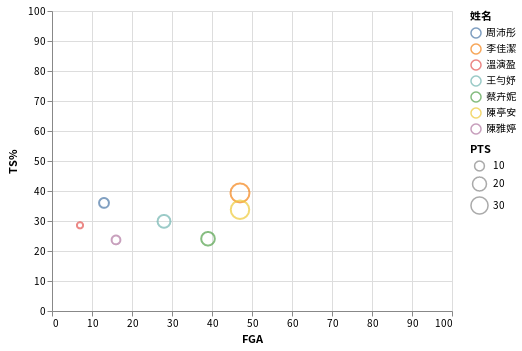

In [647]:
chart2.encode(x = alt.X('FGA', scale= alt.Scale(domain = [0 , 100])), y =  alt.Y('TS%', scale = alt.Scale(domain = [0, 100])), size = 'PTS', color='姓名', tooltip = ['姓名', '背號'])

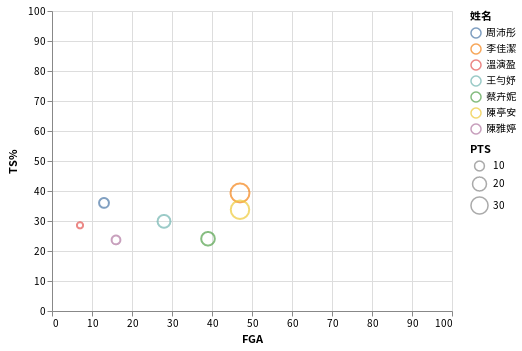

In [630]:
chart2.encode(x = alt.X('FGA', scale= alt.Scale(domain = [0 , 100])), y =  alt.Y('TS%', scale = alt.Scale(domain = [0, 100])), size = 'PTS', color='姓名', tooltip = ['姓名', 'PTS', 'TS%'])

In [611]:
p = op[1]['play']
p

0     順序 節數         時間 場上球員                           文字直播    球隊
370    1  1  10:00.000  NaN                       文化大學取得球權  文化大學
369    2  1  09:57.157  徐玉蓮                徐玉蓮2分投籃：不中 (0分)  文化大學
368    3  1  09:43.583  蕭梅君                   蕭梅君失誤 (1次失誤)  臺北商大
367    4  1  09:26.437  戴宜庭                戴宜庭3分投籃：不中 (0分)  文化大學
366    5  1  09:26.437  徐玉蓮          徐玉蓮籃板 (進攻籃板:1 防守籃板:0)  文化大學
365    6  1  09:23.680  徐玉蓮                徐玉蓮2分投籃：不中 (0分)  文化大學
364    7  1  09:23.680  蘇怡菁          蘇怡菁籃板 (進攻籃板:1 防守籃板:0)  文化大學
363    8  1  09:20.990  蘇怡菁                蘇怡菁2分投籃：不中 (0分)  文化大學
362    9  1  09:20.990  蘇怡菁          蘇怡菁籃板 (進攻籃板:2 防守籃板:0)  文化大學
361   10  1  09:14.557  蘇怡菁                 蘇怡菁2分投籃：中 (2分)  文化大學
360   11  1  09:01.340  蕭竹妤     蕭竹妤失誤 (1次失誤) 抄截：方曉晴 (1次抄截)  臺北商大
359   12  1  08:50.497  徐玉蓮                   徐玉蓮失誤 (1次失誤)  文化大學
358   13  1  08:42.627  蕭梅君     蕭梅君失誤 (2次失誤) 抄截：徐玉蓮 (1次抄截)  臺北商大
357   14  1  08:41.337  吳玟萱                   吳玟萱犯規 (1次犯規)  臺北商大
356   15  1  08:39.337  徐玉蓮            徐玉蓮 2次罰球 第1罰：中 (1分)  文化大學
355   16  1  08:39.337  徐玉蓮            徐玉蓮 2次罰球 第2罰：中 (2分)  文化大學
354   17  1  08:30.823  蕭竹妤                蕭竹妤2分投籃：不中 (0分)  臺北商大
353   18  1  08:30.823  徐玉蓮          徐玉蓮籃板 (進攻籃板:1 防守籃板:1)  文化大學
352   19  1  08:07.513  戴宜庭                 戴宜庭2分投籃：中 (2分)  文化大學
351   20  1  07:48.350  吳玟萱                吳玟萱2分投籃：不中 (0分)  臺北商大
350   21  1  07:48.350  戴宜庭          戴宜庭籃板 (進攻籃板:0 防守籃板:1)  文化大學
349   22  1  07:41.400  児玉楓                児玉楓2分投籃：不中 (0分)  文化大學
348   23  1  07:41.400  戴宜庭          戴宜庭籃板 (進攻籃板:1 防守籃板:1)  文化大學
347   24  1  07:34.633  戴宜庭                 戴宜庭2分投籃：中 (4分)  文化大學
346   25  1  07:13.447   駱易    駱易3分投籃：中 (3分) 助攻：蕭竹妤 (1次助攻)  臺北商大
345   26  1  06:53.063  蘇怡菁                蘇怡菁2分投籃：不中 (2分)  文化大學
344   27  1  06:53.063  蘇怡菁          蘇怡菁籃板 (進攻籃板:3 防守籃板:0)  文化大學
343   28  1  06:50.290  蘇怡菁                 蘇怡菁2分投籃：中 (4分)  文化大學
342   29  1  06:23.373  吳玟萱                吳玟萱3分投籃：不中 (0分)  臺北商大
341   30  1  06:23.373  方曉晴          方曉晴籃板 (進攻籃板:0 防守籃板:1)  文化大學
..   ... ..        ...  ...                            ...   ...
30   341  4  03:12.763   駱易                駱易3分投籃：不中 (16分)  臺北商大
29   342  4  03:12.763  管韻慈          管韻慈籃板 (進攻籃板:1 防守籃板:2)  文化大學
28   343  4  02:59.467  児玉楓               児玉楓2分投籃：不中 (10分)  文化大學
27   344  4  02:59.467  戴宜庭          戴宜庭籃板 (進攻籃板:4 防守籃板:3)  文化大學
26   345  4  02:50.943  児玉楓               児玉楓3分投籃：不中 (10分)  文化大學
25   346  4  02:50.943  蕭梅君          蕭梅君籃板 (進攻籃板:1 防守籃板:4)  臺北商大
24   347  4  02:34.053  江明娟                江明娟2分投籃：不中 (6分)  臺北商大
23   348  4  02:32.497  児玉楓                   児玉楓犯規 (4次犯規)  文化大學
22   349  4  02:32.497  NaN                      暫停 : 隊伍暫停  臺北商大
21   350  4  02:21.597  解詠韻                       解詠韻替換下駱易  臺北商大
20   351  4  02:21.597  吳玟萱                      吳玟萱替換下蕭梅君  臺北商大
19   352  4  02:21.597   蘇穎                       蘇穎替換下胡家嘉  臺北商大
18   353  4  02:20.377   蘇穎                 蘇穎3分投籃：不中 (0分)  臺北商大
17   354  4  02:20.377  徐玉蓮          徐玉蓮籃板 (進攻籃板:7 防守籃板:8)  文化大學
16   355  4  01:59.190  児玉楓               児玉楓3分投籃：不中 (10分)  文化大學
15   356  4  01:59.190  吳玟萱          吳玟萱籃板 (進攻籃板:0 防守籃板:2)  臺北商大
14   357  4  01:50.887  解詠韻                解詠韻2分投籃：不中 (2分)  臺北商大
13   358  4  01:50.887  児玉楓          児玉楓籃板 (進攻籃板:0 防守籃板:6)  文化大學
12   359  4  01:31.420  李依蒨                李依蒨3分投籃：不中 (0分)  文化大學
11   360  4  01:10.707  江明娟                江明娟2分投籃：不中 (6分)  臺北商大
10   361  4  01:10.707  児玉楓          児玉楓籃板 (進攻籃板:0 防守籃板:7)  文化大學
9    362  4  01:04.977  戴宜庭  戴宜庭2分投籃：中 (36分) 助攻：児玉楓 (5次助攻)  文化大學
8    363  4  00:52.183  解詠韻                   解詠韻失誤 (1次失誤)  臺北商大
7    364  4  00:36.013  児玉楓               児玉楓2分投籃：不中 (10分)  文化大學
6    365  4  00:36.013  李依蒨          李依蒨籃板 (進攻籃板:1 防守籃板:2)  文化大學
5    366  4  00:32.957  李依蒨                李依蒨2分投籃：不中 (0分)  文化大學
4    367  4  00:32.957  解詠韻          解詠韻籃板 (進攻籃板:0 防守籃板:1)  臺北商大
3    368  4  00:13.617  解詠韻                   解詠韻失誤 (2次失誤)  臺北商大
2    369  4  00:04.610  戴宜庭  戴宜庭3分投籃：中 (39分) 助攻：児玉楓 (6次助攻)  文化大學
1    370  4  00:00.000  NaN        

In [612]:
p['gain'] = None
p.head()

0   順序 節數         時間 場上球員                   文字直播    球隊  gain
370  1  1  10:00.000  NaN               文化大學取得球權  文化大學  None
369  2  1  09:57.157  徐玉蓮        徐玉蓮2分投籃：不中 (0分)  文化大學  None
368  3  1  09:43.583  蕭梅君           蕭梅君失誤 (1次失誤)  臺北商大  None
367  4  1  09:26.437  戴宜庭        戴宜庭3分投籃：不中 (0分)  文化大學  None
366  5  1  09:26.437  徐玉蓮  徐玉蓮籃板 (進攻籃板:1 防守籃板:0)  文化大學  None

In [613]:
def get_type(txt):
    gain = ['防守籃板', '抄截']
    
    for candi in gain:        
        if candi in txt:
            return 'gain'
    
    loss = ['投籃', '失誤']
    for candi in loss:
        if candi in txt:
            return 'loss'
    
    return None

In [614]:
p['pos'] = p['文字直播'].apply(get_type, 1)

In [615]:
p['next'] =  p['pos'].shift(-1)

0     順序 節數         時間 場上球員                           文字直播    球隊   pos  next
370    1  1  10:00.000  NaN                       文化大學取得球權  文化大學  None  loss
369    2  1  09:57.157  徐玉蓮                徐玉蓮2分投籃：不中 (0分)  文化大學  loss  loss
368    3  1  09:43.583  蕭梅君                   蕭梅君失誤 (1次失誤)  臺北商大  loss  loss
367    4  1  09:26.437  戴宜庭                戴宜庭3分投籃：不中 (0分)  文化大學  loss  gain
366    5  1  09:26.437  徐玉蓮          徐玉蓮籃板 (進攻籃板:1 防守籃板:0)  文化大學  gain  loss
365    6  1  09:23.680  徐玉蓮                徐玉蓮2分投籃：不中 (0分)  文化大學  loss  gain
364    7  1  09:23.680  蘇怡菁          蘇怡菁籃板 (進攻籃板:1 防守籃板:0)  文化大學  gain  loss
363    8  1  09:20.990  蘇怡菁                蘇怡菁2分投籃：不中 (0分)  文化大學  loss  gain
362    9  1  09:20.990  蘇怡菁          蘇怡菁籃板 (進攻籃板:2 防守籃板:0)  文化大學  gain  loss
361   10  1  09:14.557  蘇怡菁                 蘇怡菁2分投籃：中 (2分)  文化大學  loss  gain
360   11  1  09:01.340  蕭竹妤     蕭竹妤失誤 (1次失誤) 抄截：方曉晴 (1次抄截)  臺北商大  gain  loss
359   12  1  08:50.497  徐玉蓮                   徐玉蓮失誤 (1次失誤)  文化大學  loss  gain
358   13  1  08:42.627  蕭梅君     蕭梅君失誤 (2次失誤) 抄截：徐玉蓮 (1次抄截)  臺北商大  gain  None
357   14  1  08:41.337  吳玟萱                   吳玟萱犯規 (1次犯規)  臺北商大  None  None
356   15  1  08:39.337  徐玉蓮            徐玉蓮 2次罰球 第1罰：中 (1分)  文化大學  None  None
355   16  1  08:39.337  徐玉蓮            徐玉蓮 2次罰球 第2罰：中 (2分)  文化大學  None  loss
354   17  1  08:30.823  蕭竹妤                蕭竹妤2分投籃：不中 (0分)  臺北商大  loss  gain
353   18  1  08:30.823  徐玉蓮          徐玉蓮籃板 (進攻籃板:1 防守籃板:1)  文化大學  gain  loss
352   19  1  08:07.513  戴宜庭                 戴宜庭2分投籃：中 (2分)  文化大學  loss  loss
351   20  1  07:48.350  吳玟萱                吳玟萱2分投籃：不中 (0分)  臺北商大  loss  gain
350   21  1  07:48.350  戴宜庭          戴宜庭籃板 (進攻籃板:0 防守籃板:1)  文化大學  gain  loss
349   22  1  07:41.400  児玉楓                児玉楓2分投籃：不中 (0分)  文化大學  loss  gain
348   23  1  07:41.400  戴宜庭          戴宜庭籃板 (進攻籃板:1 防守籃板:1)  文化大學  gain  loss
347   24  1  07:34.633  戴宜庭                 戴宜庭2分投籃：中 (4分)  文化大學  loss  loss
346   25  1  07:13.447   駱易    駱易3分投籃：中 (3分) 助攻：蕭竹妤 (1次助攻)  臺北商大  loss  loss
345   26  1  06:53.063  蘇怡菁                蘇怡菁2分投籃：不中 (2分)  文化大學  loss  gain
344   27  1  06:53.063  蘇怡菁          蘇怡菁籃板 (進攻籃板:3 防守籃板:0)  文化大學  gain  loss
343   28  1  06:50.290  蘇怡菁                 蘇怡菁2分投籃：中 (4分)  文化大學  loss  loss
342   29  1  06:23.373  吳玟萱                吳玟萱3分投籃：不中 (0分)  臺北商大  loss  gain
341   30  1  06:23.373  方曉晴          方曉晴籃板 (進攻籃板:0 防守籃板:1)  文化大學  gain  None
..   ... ..        ...  ...                            ...   ...   ...   ...
30   341  4  03:12.763   駱易                駱易3分投籃：不中 (16分)  臺北商大  loss  gain
29   342  4  03:12.763  管韻慈          管韻慈籃板 (進攻籃板:1 防守籃板:2)  文化大學  gain  loss
28   343  4  02:59.467  児玉楓               児玉楓2分投籃：不中 (10分)  文化大學  loss  gain
27   344  4  02:59.467  戴宜庭          戴宜庭籃板 (進攻籃板:4 防守籃板:3)  文化大學  gain  loss
26   345  4  02:50.943  児玉楓               児玉楓3分投籃：不中 (10分)  文化大學  loss  gain
25   346  4  02:50.943  蕭梅君          蕭梅君籃板 (進攻籃板:1 防守籃板:4)  臺北商大  gain  loss
24   347  4  02:34.053  江明娟                江明娟2分投籃：不中 (6分)  臺北商大  loss  None
23   348  4  02:32.497  児玉楓                   児玉楓犯規 (4次犯規)  文化大學  None  None
22   349  4  02:32.497  NaN                      暫停 : 隊伍暫停  臺北商大  None  None
21   350  4  02:21.597  解詠韻                       解詠韻替換下駱易  臺北商大  None  None
20   351  4  02:21.597  吳玟萱                      吳玟萱替換下蕭梅君  臺北商大  None  None
19   352  4  02:21.597   蘇穎                       蘇穎替換下胡家嘉  臺北商大  None  loss
18   353  4  02:20.377   蘇穎                 蘇穎3分投籃：不中 (0分)  臺北商大  loss  gain
17   354  4  02:20.377  徐玉蓮          徐玉蓮籃板 (進攻籃板:7 防守籃板:8)  文化大學  gain  loss
16   355  4  01:59.190  児玉楓               児玉楓3分投籃：不中 (10分)  文化大學  loss  gain
15   356  4  01:59.190  吳玟萱          吳玟萱籃板 (進攻籃板:0 防守籃板:2)  臺北商大  gain  loss
14   357  4  01:50.887  解詠韻                解詠韻2分投籃：不中 (2分)  臺北商大  loss  gain
13   358  4  01:50.887  児玉楓          児玉楓籃板 (進攻籃板:0 防守籃板:6)  文化大學  gain  loss
12   359  4  01:31.420  李依蒨                李依蒨3分投籃：不中 (0分)  文化大學  loss  loss
11   360  4  01:10.707  江明娟                江明娟2分投籃：不中 (6分)  臺北商大  loss  g

ntu

In [655]:
txt = """

                

<div class="left_content">
    <div class="final_block">
        <div class="final_title">
            <div class="final_logo">
                <img src="/Img/logo_s.png" width="78" height="38">
            </div>
            <div class="final_info">
                <div class="final_infoType">
                        <img src="/Images/fromWF/women_title.png">
                </div>
                <div class="final_infoName">2018年12月10日 PM 13:30 ＠臺灣大學 預賽</div>
            </div>
        </div>
        
        <div class="final_list">
            <div class="final_listSchool">
                <div class="listSchool_left">
                    <p>
                        <a href="/107/%E5%85%AC%E9%96%8B%E5%A5%B3%E4%B8%80%E7%B4%9A/Team/Index/C45598A2-5E02-4183-9CA3-CA5BD7869683">臺灣體大</a>
                        <br>
                    </p>
                </div>
                <div class="listSchool_right">
                    <p>
                        <a href="/107/%E5%85%AC%E9%96%8B%E5%A5%B3%E4%B8%80%E7%B4%9A/Team/Index/4E002A9D-B080-4567-8BE1-F886AD84163F">臺灣大學</a>
                        <br>
                    </p>
                </div>
            </div>
            <div class="final_listTable">
                <div class="listTable_left">
                    <div class="badge_left">
                            <img src="/PhotoFiles/SchoolCodeManager/635246010282179503.jpg" width="44">
                            <br>
                    </div>
                        <div class="scores_left">55</div>
                </div>
                <div class="listTable_center">
                    <div class="fixtures_table02">
                        <div class="fixtures_tableLi03">
                            <div class="school"></div>
                            <div class="roundtitle">
                                <span class="number"></span>
                                <span class="number">1</span>
                                <span class="number">2</span>
                                <span class="number">3</span>
                                <span class="number">4</span>
                                <span class="number">OT</span>
                                <span class="number">OT2</span>
                                <span class="number">OT3</span>
                                <span class="number"></span>
                            </div>
                        </div>
                        <div class="fixtures_tableLi03">
                            <div class="gray_bg">
                                <div class="school">
                                    <div class="school_name">
                                        <span>臺灣體大</span>
                                    </div>
                                </div>
                                <div class="round">
                                    <span class="number">17</span>
                                    <span class="number">18</span>
                                    <span class="number">5</span>
                                    <span class="number">15</span>
                                    <span class="number"></span>
                                    <span class="number"></span>
                                    <span class="number"></span>
                                </div>
                                <div class="total_li01">
                                    
                                        <span>55</span>
                                </div>
                            </div>
                        </div>
                        <div class="fixtures_tableLi04">
                            <div class="gray_bg">
                                <div class="school">
                                    <div class="school_name">
                                        <span>臺灣大學</span>
                                    </div>
                                </div>
                                <div class="round">
                                    <span class="number">20</span>
                                    <span class="number">9</span>
                                    <span class="number">20</span>
                                    <span class="number">18</span>
                                    <span class="number"></span>
                                    <span class="number"></span>
                                    <span class="number"></span>
                                </div>
                                <div class="total_li02">
                                    
                                        <span class="text_win">67</span>
                                </div>
                            </div>
                        </div>
                    </div>
                        <div class="listTable_result">FINAL</div>


                </div>
                <div class="listTable_right">
                    <div class="badge_right">
                            <img src="/Uploads/Bages/231D6CAE-6C7A-496E-9F0A-BC8CDC8F8A42.png" width="44">
                            <br>

                    </div>
                        <div class="scores_right win">67</div>
                </div>
            </div>
        </div>
    </div>
</div>
<div class="right_content noprint">
    
        <div class="custom_ad" style="margin-top: 10px;">
            <a href="https://www.youtube.com/watch?v=bBf0OT6eDrE" target="_blank"><img src="/Uploads/PhotoFile/EAF37853-DA72-4FB9-B2B4-4649C30EB8F8.png"></a>
        </div>
    <div class="spec_play_box">
        <ul>
            <li class="active"><a data-toggle="tab" href="#pts">得分王</a></li>
            <li><a data-toggle="tab" href="#rebound">籃板王</a></li>
            <li><a data-toggle="tab" href="#ast">助攻王</a></li>
        </ul>
        <div class="tab-content">
            <div id="pts" class="tab-pane fade in active">
                


            <table class="record_table03">
                <caption>臺灣體大</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=8b35e2c1-860b-4e9c-97a3-44c2be44586f" alt="球員圖片" width="30">
                        </td>
                        <td>
                            潘鈺萍
                        </td>
                        <td>
                            20
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=b09a367c-8864-4ceb-bd40-0a2673bf50fc" alt="球員圖片" width="30">
                        </td>
                        <td>
                            杜亭萱
                        </td>
                        <td>
                            12
                        </td>
                    </tr>
                    <tr>
                        <td>
3                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=7045cb8b-532b-458c-8876-b235d048769b" alt="球員圖片" width="30">
                        </td>
                        <td>
                            郭雨璇
                        </td>
                        <td>
                            9
                        </td>
                    </tr>
            </tbody></table>
            <table class="record_table03">
                <caption>臺灣大學</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=c4065ddf-bf8b-49ac-94b0-d87ee8dbb3e4" alt="球員圖片" width="30">
                        </td>
                        <td>
                            葉依婷
                        </td>
                        <td>
                            27
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=956068cc-4de7-4094-9b98-742fd4c62867" alt="球員圖片" width="30">
                        </td>
                        <td>
                            許庭瑜
                        </td>
                        <td>
                            15
                        </td>
                    </tr>
                    <tr>
                        <td>
3                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=38b9655d-2c2d-4cc8-aec7-3c18d84333ea" alt="球員圖片" width="30">
                        </td>
                        <td>
                            許硯築
                        </td>
                        <td>
                            14
                        </td>
                    </tr>
            </tbody></table>

            </div>
            <div id="rebound" class="tab-pane fade">
                


            <table class="record_table03">
                <caption>臺灣體大</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=b09a367c-8864-4ceb-bd40-0a2673bf50fc" alt="球員圖片" width="30">
                        </td>
                        <td>
                            杜亭萱
                        </td>
                        <td>
                            12
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=2a3fa883-57f7-4862-a929-62e5cc6a49f1" alt="球員圖片" width="30">
                        </td>
                        <td>
                            翁昕湲
                        </td>
                        <td>
                            9
                        </td>
                    </tr>
                    <tr>
                        <td>
3                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=7045cb8b-532b-458c-8876-b235d048769b" alt="球員圖片" width="30">
                        </td>
                        <td>
                            郭雨璇
                        </td>
                        <td>
                            7
                        </td>
                    </tr>
            </tbody></table>
            <table class="record_table03">
                <caption>臺灣大學</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=c4065ddf-bf8b-49ac-94b0-d87ee8dbb3e4" alt="球員圖片" width="30">
                        </td>
                        <td>
                            葉依婷
                        </td>
                        <td>
                            16
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=38b9655d-2c2d-4cc8-aec7-3c18d84333ea" alt="球員圖片" width="30">
                        </td>
                        <td>
                            許硯築
                        </td>
                        <td>
                            9
                        </td>
                    </tr>
                    <tr>
                        <td>
3                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=fd9250a3-5c16-4d81-a44a-efe0782016f4" alt="球員圖片" width="30">
                        </td>
                        <td>
                            邵雨
                        </td>
                        <td>
                            8
                        </td>
                    </tr>
            </tbody></table>

            </div>
            <div id="ast" class="tab-pane fade">
                


            <table class="record_table03">
                <caption>臺灣體大</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=bb2852b5-46fa-4c14-83cd-4977319e8868" alt="球員圖片" width="30">
                        </td>
                        <td>
                            徐宇婕
                        </td>
                        <td>
                            3
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=7045cb8b-532b-458c-8876-b235d048769b" alt="球員圖片" width="30">
                        </td>
                        <td>
                            郭雨璇
                        </td>
                        <td>
                            2
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=d6e7f58f-f8af-428b-a757-c3427218d6b3" alt="球員圖片" width="30">
                        </td>
                        <td>
                            張文如
                        </td>
                        <td>
                            2
                        </td>
                    </tr>
            </tbody></table>
            <table class="record_table03">
                <caption>臺灣大學</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=38b9655d-2c2d-4cc8-aec7-3c18d84333ea" alt="球員圖片" width="30">
                        </td>
                        <td>
                            許硯築
                        </td>
                        <td>
                            5
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=c4065ddf-bf8b-49ac-94b0-d87ee8dbb3e4" alt="球員圖片" width="30">
                        </td>
                        <td>
                            葉依婷
                        </td>
                        <td>
                            4
                        </td>
                    </tr>
                    <tr>
                        <td>
3                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=956068cc-4de7-4094-9b98-742fd4c62867" alt="球員圖片" width="30">
                        </td>
                        <td>
                            許庭瑜
                        </td>
                        <td>
                            3
                        </td>
                    </tr>
            </tbody></table>

            </div>
        </div>
    </div>
</div>

<div class="boxscore_block">

    <h2>BOXSCORE</h2>

    <div class="noprint">
        <a href="" onclick="previewScreen(block)">
            <img src="/Images/fromWF/download_pdf.gif" alt="下載報表">
        </a>
    </div>
    
    <div id="block">
        
        <div class="hidden">
            <div class="table_boxer"><table align="center">
                <tbody><tr>
                    <td rowspan="2"><img src="/Img/logo_s.png" width="78" height="38"></td>
                    <td>
                            <img src="/Images/fromWF/women_title.png">
                    </td>
                </tr>
                <tr>
                    <td>2018年12月10日 PM 13:30 ＠臺灣大學 預賽</td>
                    </tr>
                </tbody></table>
            </div>
            <div class="table_boxer"><table align="center">
                <tbody><tr>
                    <td></td>
                    <td>0</td>
                    <td>1</td>
                    <td>2</td>
                    <td>3</td>
                    <td>OT</td>
                    <td>OT2</td>
                    <td>OT3</td>
                    <td></td>
                </tr>
                <tr>
                    <td>臺灣體大</td>
                    <td>17</td>
                    <td>18</td>
                    <td>5</td>
                    <td>15</td>
                    <td></td>
                    <td></td>
                    <td></td>
                    <td>
                            <span>55</span>
                    </td>
                </tr>
                <tr>
                    <td>臺灣大學</td>
                    <td>20</td>
                    <td>9</td>
                    <td>20</td>
                    <td>18</td>
                    <td></td>
                    <td></td>
                    <td></td>
                    <td>
                            <span class="text_win">67</span>
                        </td>
                    </tr>
                </tbody></table>
            </div>
        </div>
        <div ng-app="sortApp" class="ng-scope">
            <div ng-controller="homeSortController" class="ng-scope">

<div class="boxscore_content">
        <div class="record_tableTitle">
            <span>臺灣體大</span>
        </div>
        <div class="record_table">
            <div>
                <div class="table_boxer"><table class="record_table03 rctable">
                    <tbody><tr class="rctable_tr">
                        <td colspan="9">命中率 FIELD GOALS</td>
                        <td colspan="10">籃板 REBOUNDS</td>
                    </tr>
                    <tr class="rctable_tr02">
                        <td></td>
                        <td></td>
                        <td>先發</td>
                        <td>時間</td>
                        <td>二分</td>
                        <td>%</td>
                        <td>三分</td>
                        <td>%</td>
                        <td>罰球</td>
                        <td>%</td>
                        <td>進攻</td>
                        <td>防守</td>
                        <td>總計</td>
                        <td>助攻</td>
                        <td>抄截</td>
                        <td>阻攻</td>
                        <td>失誤</td>
                        <td>犯規</td>
                        <td>得分</td>
                    </tr>

                    <tr class="rctable_tr02">
                        <td></td>
                        <td></td>
                        <td>GS</td>
                        <td>
                            <a href="" ng-click="sortType = 'TimeTOT'; sortReverse = !sortReverse">
                                MIN
                                <span ng-show="sortType == 'TimeTOT' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TimeTOT' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>FGM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'FGMAPercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'FGMAPercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'FGMAPercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>3PM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'ThreePercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'ThreePercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'ThreePercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>FTM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'FTMAPercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'FTMAPercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'FTMAPercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'OFF'; sortReverse = !sortReverse">
                                OFF
                                <span ng-show="sortType == 'OFF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'OFF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'DFF'; sortReverse = !sortReverse">
                                DFF
                                <span ng-show="sortType == 'DFF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'DFF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'TOT'; sortReverse = !sortReverse">
                                TOT
                                <span ng-show="sortType == 'TOT' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TOT' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'AST'; sortReverse = !sortReverse">
                                AST
                                <span ng-show="sortType == 'AST' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'AST' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'ST'; sortReverse = !sortReverse">
                                ST
                                <span ng-show="sortType == 'ST' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'ST' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'BS'; sortReverse = !sortReverse">
                                BS
                                <span ng-show="sortType == 'BS' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'BS' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'TO'; sortReverse = !sortReverse">
                                TO
                                <span ng-show="sortType == 'TO' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TO' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'PF'; sortReverse = !sortReverse">
                                PF
                                <span ng-show="sortType == 'PF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'PF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'PTS'; sortReverse = !sortReverse">
                                PTS
                                <span ng-show="sortType == 'PTS' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'PTS' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                    </tr>

                    <!-- ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">6</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                翁昕湲
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">30</td>
                        <td class="ng-binding">2-3</td>
                        <td class="ng-binding">66.7</td>
                        <td class="ng-binding">0-1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">7</td>
                        <td class="ng-binding">9</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">4</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">7</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                潘鈺萍
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">37</td>
                        <td class="ng-binding">4-9</td>
                        <td class="ng-binding">44.4</td>
                        <td class="ng-binding">3-7</td>
                        <td class="ng-binding">42.9</td>
                        <td class="ng-binding">3-3</td>
                        <td class="ng-binding">100</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">20</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">8</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                徐宇婕
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">19</td>
                        <td class="ng-binding">2-3</td>
                        <td class="ng-binding">66.7</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1-2</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">5</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">9</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                郭雨璇
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">40</td>
                        <td class="ng-binding">3-8</td>
                        <td class="ng-binding">37.5</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">3-4</td>
                        <td class="ng-binding">75</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">7</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">9</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">10</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                杜亭萱
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">36</td>
                        <td class="ng-binding">4-15</td>
                        <td class="ng-binding">26.7</td>
                        <td class="ng-binding">0-2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">4-6</td>
                        <td class="ng-binding">66.7</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">8</td>
                        <td class="ng-binding">12</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">6</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">12</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">1</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                林佳儀
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">3</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                張文如
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">21</td>
                        <td class="ng-binding">1-6</td>
                        <td class="ng-binding">16.7</td>
                        <td class="ng-binding">0-2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1-2</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">3</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">4</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                張勻馨
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">13</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                陳心慈
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">1-5</td>
                        <td class="ng-binding">20</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">15</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                許美琪
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">18</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                李瑩柔
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">21</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                余婷緗
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse -->

                    <tr class="total_tr">
                        <td></td>
                        <td>TOTAL</td>
                        <td></td>
                        <td></td>
                        <td>17-49</td>
                        <td>34.7</td>
                        <td>3-13</td>
                        <td>23.1</td>
                        <td>12-19</td>
                        <td>63.2</td>
                        <td>13</td>
                        <td>33</td>
                        <td>46</td>
                        <td>10</td>
                        <td>15</td>
                        <td>3</td>
                        <td>33</td>
                        <td>21</td>
                        <td>55</td>
                    </tr>
                </tbody></table></div>
            </div>
        </div>
</div>


            </div>
            <div ng-controller="awaySortController" class="ng-scope">

<div class="boxscore_content">
        <div class="record_tableTitle">
            <span>臺灣大學</span>
        </div>
        <div class="record_table">
            <div>
                <div class="table_boxer"><table class="record_table03 rctable">
                    <tbody><tr class="rctable_tr">
                        <td colspan="9">命中率 FIELD GOALS</td>
                        <td colspan="10">籃板 REBOUNDS</td>
                    </tr>
                    <tr class="rctable_tr02">
                        <td></td>
                        <td></td>
                        <td>先發</td>
                        <td>時間</td>
                        <td>二分</td>
                        <td>%</td>
                        <td>三分</td>
                        <td>%</td>
                        <td>罰球</td>
                        <td>%</td>
                        <td>進攻</td>
                        <td>防守</td>
                        <td>總計</td>
                        <td>助攻</td>
                        <td>抄截</td>
                        <td>阻攻</td>
                        <td>失誤</td>
                        <td>犯規</td>
                        <td>得分</td>
                    </tr>

                    <tr class="rctable_tr02">
                        <td></td>
                        <td></td>
                        <td>GS</td>
                        <td>
                            <a href="" ng-click="sortType = 'TimeTOT'; sortReverse = !sortReverse">
                                MIN
                                <span ng-show="sortType == 'TimeTOT' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TimeTOT' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>FGM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'FGMAPercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'FGMAPercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'FGMAPercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>3PM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'ThreePercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'ThreePercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'ThreePercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>FTM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'FTMAPercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'FTMAPercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'FTMAPercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'OFF'; sortReverse = !sortReverse">
                                OFF
                                <span ng-show="sortType == 'OFF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'OFF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'DFF'; sortReverse = !sortReverse">
                                DFF
                                <span ng-show="sortType == 'DFF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'DFF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'TOT'; sortReverse = !sortReverse">
                                TOT
                                <span ng-show="sortType == 'TOT' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TOT' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'AST'; sortReverse = !sortReverse">
                                AST
                                <span ng-show="sortType == 'AST' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'AST' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'ST'; sortReverse = !sortReverse">
                                ST
                                <span ng-show="sortType == 'ST' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'ST' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'BS'; sortReverse = !sortReverse">
                                BS
                                <span ng-show="sortType == 'BS' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'BS' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'TO'; sortReverse = !sortReverse">
                                TO
                                <span ng-show="sortType == 'TO' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TO' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'PF'; sortReverse = !sortReverse">
                                PF
                                <span ng-show="sortType == 'PF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'PF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'PTS'; sortReverse = !sortReverse">
                                PTS
                                <span ng-show="sortType == 'PTS' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'PTS' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                    </tr>

                    <!-- ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">6</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                許硯築
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">40</td>
                        <td class="ng-binding">0-4</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">3-6</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">5-7</td>
                        <td class="ng-binding">71.4</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">7</td>
                        <td class="ng-binding">9</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">7</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">14</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">9</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                許庭瑜
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">33</td>
                        <td class="ng-binding">5-17</td>
                        <td class="ng-binding">29.4</td>
                        <td class="ng-binding">0-3</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">5-9</td>
                        <td class="ng-binding">55.6</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">7</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">15</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">11</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                葉依婷
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">37</td>
                        <td class="ng-binding">13-24</td>
                        <td class="ng-binding">54.2</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1-4</td>
                        <td class="ng-binding">25</td>
                        <td class="ng-binding">6</td>
                        <td class="ng-binding">10</td>
                        <td class="ng-binding">16</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">27</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">14</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                葉祐瑜
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">34</td>
                        <td class="ng-binding">1-1</td>
                        <td class="ng-binding">100</td>
                        <td class="ng-binding">0-5</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">15</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                邵雨
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">14</td>
                        <td class="ng-binding">2-6</td>
                        <td class="ng-binding">33.3</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1-2</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">8</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">5</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">3</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                詹佳蒨
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">4</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                葉芷伶
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">12</td>
                        <td class="ng-binding">0-2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">7</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                曾英
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">8</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                張廷涓
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">7</td>
                        <td class="ng-binding">1-1</td>
                        <td class="ng-binding">100</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">12</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                林怡萱
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">13</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                許淳晴
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">22</td>
                        <td class="ng-binding">1-7</td>
                        <td class="ng-binding">14.3</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">17</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                徐婕庭
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse -->

                    <tr class="total_tr">
                        <td></td>
                        <td>TOTAL</td>
                        <td></td>
                        <td></td>
                        <td>23-62</td>
                        <td>37.1</td>
                        <td>3-15</td>
                        <td>20</td>
                        <td>12-22</td>
                        <td>54.5</td>
                        <td>17</td>
                        <td>28</td>
                        <td>45</td>
                        <td>15</td>
                        <td>18</td>
                        <td>5</td>
                        <td>25</td>
                        <td>15</td>
                        <td>67</td>
                    </tr>
                </tbody></table></div>
            </div>
        </div>
</div>


            </div>
        </div>
    </div>
</div>


            
"""

In [7]:
g1 = gen_game(txt)

In [8]:
g1['tbox'][0]['df']

姓名   背號    MP  PTS  2FGA  2FGM  3FGA  3FGM  FTA  FTM  FGA  FGM  ORB  \
3     許硯築    6  31.0    2     4     1     4     0    0    0    8    1    1   
4     許庭瑜    9  40.0   31    21     9     6     3    4    5   27   12    2   
5     葉依婷   11  36.0   27    22    12     0     0    3    3   22   12    6   
6     葉祐瑜   14  28.0    8     6     1     6     1    3    4   12    2    0   
7      邵雨   15  26.0    5     6     1     0     0    3    4    6    1    3   
8     葉芷伶    4  11.0    3     6     0     4     1    0    0   10    1    3   
9      曾英    7   0.0    0     0     0     0     0    0    0    0    0    0   
10    張廷涓    8  18.0    0     2     0     0     0    0    0    2    0    2   
11    林怡萱   12   3.0    0     0     0     0     0    0    0    0    0    0   
12    許淳晴   13   0.0    0     0     0     0     0    0    0    0    0    0   
13    徐婕庭   17   7.0    0     0     0     0     0    0    0    0    0    0   
14    韋雨羲   22   0.0    0     0     0     0     0    0    0    0    0    0   
15  TOTAL  NaN   NaN   76    67    24    20     5   13   16   87   29   17   

    DRB  TRB  STL  BLK  AST  TOV  
3     8    9    4    3    6    1  
4     4    6    0    3    4    5  
5    10   16    2    4    2    4  
6     3    3    1    1    0    4  
7     9   12    2    2    2    3  
8     0    3    2    0    2    1  
9     0    0    0    0    0    0  
10    0    2    0    0    0    0  
11    0    0    0    0    0    0  
12    0    0    0    0    0    0  
13    0    0    0    0    1    1  
14    0    0    0    0    0    0  
15   34   51   11   13   17   19

In [9]:
txt = """


                

<div class="left_content">
    <div class="final_block">
        <div class="final_title">
            <div class="final_logo">
                <img src="/Img/logo_s.png" width="78" height="38">
            </div>
            <div class="final_info">
                <div class="final_infoType">
                        <img src="/Images/fromWF/women_title.png">
                </div>
                <div class="final_infoName">2018年12月11日 PM 19:30 ＠臺灣大學 預賽</div>
            </div>
        </div>
        
        <div class="final_list">
            <div class="final_listSchool">
                <div class="listSchool_left">
                    <p>
                        <a href="/107/%E5%85%AC%E9%96%8B%E5%A5%B3%E4%B8%80%E7%B4%9A/Team/Index/4E002A9D-B080-4567-8BE1-F886AD84163F">臺灣大學</a>
                        <br>
                    </p>
                </div>
                <div class="listSchool_right">
                    <p>
                        <a href="/107/%E5%85%AC%E9%96%8B%E5%A5%B3%E4%B8%80%E7%B4%9A/Team/Index/1A2250BD-DED2-4C8B-9C10-88DC221100EB">佛光大學</a>
                        <br>
                    </p>
                </div>
            </div>
            <div class="final_listTable">
                <div class="listTable_left">
                    <div class="badge_left">
                            <img src="/Uploads/Bages/231D6CAE-6C7A-496E-9F0A-BC8CDC8F8A42.png" width="44">
                            <br>
                    </div>
                        <div class="scores_left">38</div>
                </div>
                <div class="listTable_center">
                    <div class="fixtures_table02">
                        <div class="fixtures_tableLi03">
                            <div class="school"></div>
                            <div class="roundtitle">
                                <span class="number"></span>
                                <span class="number">1</span>
                                <span class="number">2</span>
                                <span class="number">3</span>
                                <span class="number">4</span>
                                <span class="number">OT</span>
                                <span class="number">OT2</span>
                                <span class="number">OT3</span>
                                <span class="number"></span>
                            </div>
                        </div>
                        <div class="fixtures_tableLi03">
                            <div class="gray_bg">
                                <div class="school">
                                    <div class="school_name">
                                        <span>臺灣大學</span>
                                    </div>
                                </div>
                                <div class="round">
                                    <span class="number">6</span>
                                    <span class="number">14</span>
                                    <span class="number">14</span>
                                    <span class="number">4</span>
                                    <span class="number"></span>
                                    <span class="number"></span>
                                    <span class="number"></span>
                                </div>
                                <div class="total_li01">
                                    
                                        <span>38</span>
                                </div>
                            </div>
                        </div>
                        <div class="fixtures_tableLi04">
                            <div class="gray_bg">
                                <div class="school">
                                    <div class="school_name">
                                        <span>佛光大學</span>
                                    </div>
                                </div>
                                <div class="round">
                                    <span class="number">22</span>
                                    <span class="number">17</span>
                                    <span class="number">21</span>
                                    <span class="number">18</span>
                                    <span class="number"></span>
                                    <span class="number"></span>
                                    <span class="number"></span>
                                </div>
                                <div class="total_li02">
                                    
                                        <span class="text_win">78</span>
                                </div>
                            </div>
                        </div>
                    </div>
                        <div class="listTable_result">FINAL</div>

                        <a href="/107/PlayByPlay/Index/4E002A9D-B080-4567-8BE1-F886AD84163F?scheduleId=7FCF9D06-1C3E-4BC1-8BDE-1A6DFBF3D81E">
                            <div class="listTable_result">Play-By-Play&gt;&gt;</div>
                        </a>

                </div>
                <div class="listTable_right">
                    <div class="badge_right">
                            <img src="/PhotoFiles/SchoolCodeManager/635246005016373786.jpg" width="44">
                            <br>

                    </div>
                        <div class="scores_right win">78</div>
                </div>
            </div>
        </div>
    </div>
</div>
<div class="right_content noprint">
    
        <div class="custom_ad" style="margin-top: 10px;">
            <a href="https://www.youtube.com/watch?v=bBf0OT6eDrE" target="_blank"><img src="/Uploads/PhotoFile/EAF37853-DA72-4FB9-B2B4-4649C30EB8F8.png"></a>
        </div>
    <div class="spec_play_box">
        <ul>
            <li class="active"><a data-toggle="tab" href="#pts">得分王</a></li>
            <li><a data-toggle="tab" href="#rebound">籃板王</a></li>
            <li><a data-toggle="tab" href="#ast">助攻王</a></li>
        </ul>
        <div class="tab-content">
            <div id="pts" class="tab-pane fade in active">
                


            <table class="record_table03">
                <caption>臺灣大學</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=b5598112-d4ca-4087-a5b9-0dc6b5639766" alt="球員圖片" width="30">
                        </td>
                        <td>
                            林怡萱
                        </td>
                        <td>
                            9
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=c4065ddf-bf8b-49ac-94b0-d87ee8dbb3e4" alt="球員圖片" width="30">
                        </td>
                        <td>
                            葉依婷
                        </td>
                        <td>
                            8
                        </td>
                    </tr>
                    <tr>
                        <td>
3                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=ba0e46bf-f79c-476e-8a98-b83445ce8985" alt="球員圖片" width="30">
                        </td>
                        <td>
                            葉祐瑜
                        </td>
                        <td>
                            7
                        </td>
                    </tr>
            </tbody></table>
            <table class="record_table03">
                <caption>佛光大學</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=1a166cda-b80a-4d37-bfee-cd28981a8b07" alt="球員圖片" width="30">
                        </td>
                        <td>
                            羅培甄
                        </td>
                        <td>
                            18
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=cb668789-69b2-455e-957d-4de86ed1daf9" alt="球員圖片" width="30">
                        </td>
                        <td>
                            劉昕妤
                        </td>
                        <td>
                            13
                        </td>
                    </tr>
                    <tr>
                        <td>
3                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=6fd9dfd1-0075-4835-b04c-5633c1cb737e" alt="球員圖片" width="30">
                        </td>
                        <td>
                            王竫婷
                        </td>
                        <td>
                            10
                        </td>
                    </tr>
            </tbody></table>

            </div>
            <div id="rebound" class="tab-pane fade">
                


            <table class="record_table03">
                <caption>臺灣大學</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=c4065ddf-bf8b-49ac-94b0-d87ee8dbb3e4" alt="球員圖片" width="30">
                        </td>
                        <td>
                            葉依婷
                        </td>
                        <td>
                            10
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=38b9655d-2c2d-4cc8-aec7-3c18d84333ea" alt="球員圖片" width="30">
                        </td>
                        <td>
                            許硯築
                        </td>
                        <td>
                            6
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=fd9250a3-5c16-4d81-a44a-efe0782016f4" alt="球員圖片" width="30">
                        </td>
                        <td>
                            邵雨
                        </td>
                        <td>
                            6
                        </td>
                    </tr>
            </tbody></table>
            <table class="record_table03">
                <caption>佛光大學</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=6fd9dfd1-0075-4835-b04c-5633c1cb737e" alt="球員圖片" width="30">
                        </td>
                        <td>
                            王竫婷
                        </td>
                        <td>
                            9
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=a5a59509-7d4d-4cdb-bb48-7cbf5706ea5a" alt="球員圖片" width="30">
                        </td>
                        <td>
                            柳雲涵
                        </td>
                        <td>
                            7
                        </td>
                    </tr>
                    <tr>
                        <td>
3                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=cb668789-69b2-455e-957d-4de86ed1daf9" alt="球員圖片" width="30">
                        </td>
                        <td>
                            劉昕妤
                        </td>
                        <td>
                            5
                        </td>
                    </tr>
            </tbody></table>

            </div>
            <div id="ast" class="tab-pane fade">
                


            <table class="record_table03">
                <caption>臺灣大學</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=c4065ddf-bf8b-49ac-94b0-d87ee8dbb3e4" alt="球員圖片" width="30">
                        </td>
                        <td>
                            葉依婷
                        </td>
                        <td>
                            3
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=ba0e46bf-f79c-476e-8a98-b83445ce8985" alt="球員圖片" width="30">
                        </td>
                        <td>
                            葉祐瑜
                        </td>
                        <td>
                            2
                        </td>
                    </tr>
                    <tr>
                        <td>
3                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=54b1c771-c670-42aa-99cc-0ec326665919" alt="球員圖片" width="30">
                        </td>
                        <td>
                            葉芷伶
                        </td>
                        <td>
                            1
                        </td>
                    </tr>
            </tbody></table>
            <table class="record_table03">
                <caption>佛光大學</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=f097c86d-5090-4817-80cd-d1d87a5d03f8" alt="球員圖片" width="30">
                        </td>
                        <td>
                            陳孟欣
                        </td>
                        <td>
                            7
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=1a166cda-b80a-4d37-bfee-cd28981a8b07" alt="球員圖片" width="30">
                        </td>
                        <td>
                            羅培甄
                        </td>
                        <td>
                            3
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=5620201f-568c-45b9-a940-5173ed4bcacf" alt="球員圖片" width="30">
                        </td>
                        <td>
                            梁瑜玲
                        </td>
                        <td>
                            3
                        </td>
                    </tr>
            </tbody></table>

            </div>
        </div>
    </div>
</div>

<div class="boxscore_block">

    <h2>BOXSCORE</h2>

    <div class="noprint">
        <a href="" onclick="previewScreen(block)">
            <img src="/Images/fromWF/download_pdf.gif" alt="下載報表">
        </a>
    </div>
    
    <div id="block">
        
        <div class="hidden">
            <div class="table_boxer"><table align="center">
                <tbody><tr>
                    <td rowspan="2"><img src="/Img/logo_s.png" width="78" height="38"></td>
                    <td>
                            <img src="/Images/fromWF/women_title.png">
                    </td>
                </tr>
                <tr>
                    <td>2018年12月11日 PM 19:30 ＠臺灣大學 預賽</td>
                    </tr>
                </tbody></table>
            </div>
            <div class="table_boxer"><table align="center">
                <tbody><tr>
                    <td></td>
                    <td>0</td>
                    <td>1</td>
                    <td>2</td>
                    <td>3</td>
                    <td>OT</td>
                    <td>OT2</td>
                    <td>OT3</td>
                    <td></td>
                </tr>
                <tr>
                    <td>臺灣大學</td>
                    <td>6</td>
                    <td>14</td>
                    <td>14</td>
                    <td>4</td>
                    <td></td>
                    <td></td>
                    <td></td>
                    <td>
                            <span>38</span>
                    </td>
                </tr>
                <tr>
                    <td>佛光大學</td>
                    <td>22</td>
                    <td>17</td>
                    <td>21</td>
                    <td>18</td>
                    <td></td>
                    <td></td>
                    <td></td>
                    <td>
                            <span class="text_win">78</span>
                        </td>
                    </tr>
                </tbody></table>
            </div>
        </div>
        <div ng-app="sortApp" class="ng-scope">
            <div ng-controller="homeSortController" class="ng-scope">

<div class="boxscore_content">
        <div class="record_tableTitle">
            <span>臺灣大學</span>
        </div>
        <div class="record_table">
            <div>
                <div class="table_boxer"><table class="record_table03 rctable">
                    <tbody><tr class="rctable_tr">
                        <td colspan="9">命中率 FIELD GOALS</td>
                        <td colspan="10">籃板 REBOUNDS</td>
                    </tr>
                    <tr class="rctable_tr02">
                        <td></td>
                        <td></td>
                        <td>先發</td>
                        <td>時間</td>
                        <td>二分</td>
                        <td>%</td>
                        <td>三分</td>
                        <td>%</td>
                        <td>罰球</td>
                        <td>%</td>
                        <td>進攻</td>
                        <td>防守</td>
                        <td>總計</td>
                        <td>助攻</td>
                        <td>抄截</td>
                        <td>阻攻</td>
                        <td>失誤</td>
                        <td>犯規</td>
                        <td>得分</td>
                    </tr>

                    <tr class="rctable_tr02">
                        <td></td>
                        <td></td>
                        <td>GS</td>
                        <td>
                            <a href="" ng-click="sortType = 'TimeTOT'; sortReverse = !sortReverse">
                                MIN
                                <span ng-show="sortType == 'TimeTOT' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TimeTOT' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>FGM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'FGMAPercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'FGMAPercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'FGMAPercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>3PM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'ThreePercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'ThreePercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'ThreePercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>FTM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'FTMAPercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'FTMAPercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'FTMAPercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'OFF'; sortReverse = !sortReverse">
                                OFF
                                <span ng-show="sortType == 'OFF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'OFF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'DFF'; sortReverse = !sortReverse">
                                DFF
                                <span ng-show="sortType == 'DFF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'DFF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'TOT'; sortReverse = !sortReverse">
                                TOT
                                <span ng-show="sortType == 'TOT' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TOT' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'AST'; sortReverse = !sortReverse">
                                AST
                                <span ng-show="sortType == 'AST' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'AST' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'ST'; sortReverse = !sortReverse">
                                ST
                                <span ng-show="sortType == 'ST' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'ST' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'BS'; sortReverse = !sortReverse">
                                BS
                                <span ng-show="sortType == 'BS' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'BS' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'TO'; sortReverse = !sortReverse">
                                TO
                                <span ng-show="sortType == 'TO' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TO' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'PF'; sortReverse = !sortReverse">
                                PF
                                <span ng-show="sortType == 'PF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'PF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'PTS'; sortReverse = !sortReverse">
                                PTS
                                <span ng-show="sortType == 'PTS' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'PTS' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                    </tr>

                    <!-- ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">6</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                許硯築
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">26</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1-6</td>
                        <td class="ng-binding">16.7</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">6</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">8</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">3</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">11</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                葉依婷
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">34</td>
                        <td class="ng-binding">3-12</td>
                        <td class="ng-binding">25</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2-4</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">6</td>
                        <td class="ng-binding">10</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">8</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">12</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                林怡萱
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">14</td>
                        <td class="ng-binding">3-5</td>
                        <td class="ng-binding">60</td>
                        <td class="ng-binding">1-1</td>
                        <td class="ng-binding">100</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">10</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">9</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">14</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                葉祐瑜
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">34</td>
                        <td class="ng-binding">1-8</td>
                        <td class="ng-binding">12.5</td>
                        <td class="ng-binding">1-4</td>
                        <td class="ng-binding">25</td>
                        <td class="ng-binding">2-2</td>
                        <td class="ng-binding">100</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">7</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">7</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">15</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                邵雨
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">26</td>
                        <td class="ng-binding">0-5</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">6</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">3</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                詹佳蒨
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2-2</td>
                        <td class="ng-binding">100</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">4</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                葉芷伶
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">31</td>
                        <td class="ng-binding">1-3</td>
                        <td class="ng-binding">33.3</td>
                        <td class="ng-binding">0-5</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2-3</td>
                        <td class="ng-binding">66.7</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">6</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">4</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">7</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                曾英
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">8</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                張廷涓
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">14</td>
                        <td class="ng-binding">1-3</td>
                        <td class="ng-binding">33.3</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">13</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                許淳晴
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">6</td>
                        <td class="ng-binding">1-2</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">17</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                徐婕庭
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">11</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1-2</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">22</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                韋雨羲
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse -->

                    <tr class="total_tr">
                        <td></td>
                        <td>TOTAL</td>
                        <td></td>
                        <td></td>
                        <td>10-38</td>
                        <td>26.3</td>
                        <td>3-18</td>
                        <td>16.7</td>
                        <td>9-13</td>
                        <td>69.2</td>
                        <td>14</td>
                        <td>26</td>
                        <td>40</td>
                        <td>6</td>
                        <td>12</td>
                        <td>2</td>
                        <td>37</td>
                        <td>15</td>
                        <td>38</td>
                    </tr>
                </tbody></table></div>
            </div>
        </div>
</div>


            </div>
            <div ng-controller="awaySortController" class="ng-scope">

<div class="boxscore_content">
        <div class="record_tableTitle">
            <span>佛光大學</span>
        </div>
        <div class="record_table">
            <div>
                <div class="table_boxer"><table class="record_table03 rctable">
                    <tbody><tr class="rctable_tr">
                        <td colspan="9">命中率 FIELD GOALS</td>
                        <td colspan="10">籃板 REBOUNDS</td>
                    </tr>
                    <tr class="rctable_tr02">
                        <td></td>
                        <td></td>
                        <td>先發</td>
                        <td>時間</td>
                        <td>二分</td>
                        <td>%</td>
                        <td>三分</td>
                        <td>%</td>
                        <td>罰球</td>
                        <td>%</td>
                        <td>進攻</td>
                        <td>防守</td>
                        <td>總計</td>
                        <td>助攻</td>
                        <td>抄截</td>
                        <td>阻攻</td>
                        <td>失誤</td>
                        <td>犯規</td>
                        <td>得分</td>
                    </tr>

                    <tr class="rctable_tr02">
                        <td></td>
                        <td></td>
                        <td>GS</td>
                        <td>
                            <a href="" ng-click="sortType = 'TimeTOT'; sortReverse = !sortReverse">
                                MIN
                                <span ng-show="sortType == 'TimeTOT' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TimeTOT' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>FGM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'FGMAPercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'FGMAPercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'FGMAPercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>3PM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'ThreePercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'ThreePercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'ThreePercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>FTM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'FTMAPercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'FTMAPercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'FTMAPercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'OFF'; sortReverse = !sortReverse">
                                OFF
                                <span ng-show="sortType == 'OFF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'OFF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'DFF'; sortReverse = !sortReverse">
                                DFF
                                <span ng-show="sortType == 'DFF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'DFF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'TOT'; sortReverse = !sortReverse">
                                TOT
                                <span ng-show="sortType == 'TOT' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TOT' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'AST'; sortReverse = !sortReverse">
                                AST
                                <span ng-show="sortType == 'AST' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'AST' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'ST'; sortReverse = !sortReverse">
                                ST
                                <span ng-show="sortType == 'ST' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'ST' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'BS'; sortReverse = !sortReverse">
                                BS
                                <span ng-show="sortType == 'BS' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'BS' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'TO'; sortReverse = !sortReverse">
                                TO
                                <span ng-show="sortType == 'TO' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TO' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'PF'; sortReverse = !sortReverse">
                                PF
                                <span ng-show="sortType == 'PF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'PF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'PTS'; sortReverse = !sortReverse">
                                PTS
                                <span ng-show="sortType == 'PTS' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'PTS' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                    </tr>

                    <!-- ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">5</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                陳孟欣
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">15</td>
                        <td class="ng-binding">0-3</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1-2</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">7</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">3</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">10</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                林嘉慈
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">18</td>
                        <td class="ng-binding">1-4</td>
                        <td class="ng-binding">25</td>
                        <td class="ng-binding">0-2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1-2</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">3</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">12</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                楊芷瑜
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">17</td>
                        <td class="ng-binding">2-6</td>
                        <td class="ng-binding">33.3</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2-2</td>
                        <td class="ng-binding">100</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">6</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">13</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                王竫婷
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">24</td>
                        <td class="ng-binding">5-7</td>
                        <td class="ng-binding">71.4</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">7</td>
                        <td class="ng-binding">9</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">10</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">35</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                羅培甄
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">15</td>
                        <td class="ng-binding">5-7</td>
                        <td class="ng-binding">71.4</td>
                        <td class="ng-binding">2-4</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">2-2</td>
                        <td class="ng-binding">100</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">18</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">1</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                劉昕妤
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">23</td>
                        <td class="ng-binding">3-8</td>
                        <td class="ng-binding">37.5</td>
                        <td class="ng-binding">0-1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">7-9</td>
                        <td class="ng-binding">77.8</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">13</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">3</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                梁瑜玲
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">11</td>
                        <td class="ng-binding">0-1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-3</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">6</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                羅培儀
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">17</td>
                        <td class="ng-binding">2-9</td>
                        <td class="ng-binding">22.2</td>
                        <td class="ng-binding">0-5</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">4</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">9</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                張世雅
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">13</td>
                        <td class="ng-binding">0-1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1-3</td>
                        <td class="ng-binding">33.3</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">3</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">25</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                柳雲涵
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">16</td>
                        <td class="ng-binding">3-5</td>
                        <td class="ng-binding">60</td>
                        <td class="ng-binding">0-1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">7</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">6</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">30</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                柯安妮
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">19</td>
                        <td class="ng-binding">1-1</td>
                        <td class="ng-binding">100</td>
                        <td class="ng-binding">0-3</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">3-6</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">6</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">5</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">32</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                楊婉琳
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">12</td>
                        <td class="ng-binding">1-2</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">5-6</td>
                        <td class="ng-binding">83.3</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">7</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse -->

                    <tr class="total_tr">
                        <td></td>
                        <td>TOTAL</td>
                        <td></td>
                        <td></td>
                        <td>23-54</td>
                        <td>42.6</td>
                        <td>4-24</td>
                        <td>16.7</td>
                        <td>20-27</td>
                        <td>74.1</td>
                        <td>19</td>
                        <td>24</td>
                        <td>43</td>
                        <td>20</td>
                        <td>30</td>
                        <td>4</td>
                        <td>15</td>
                        <td>14</td>
                        <td>78</td>
                    </tr>
                </tbody></table></div>
            </div>
        </div>
</div>


            </div>
        </div>
    </div>
</div>


            
"""

In [10]:
g2 = gen_game(txt)

In [11]:
txt = """

                

<div class="left_content">
    <div class="final_block">
        <div class="final_title">
            <div class="final_logo">
                <img src="/Img/logo_s.png" width="78" height="38">
            </div>
            <div class="final_info">
                <div class="final_infoType">
                        <img src="/Images/fromWF/women_title.png">
                </div>
                <div class="final_infoName">2018年12月10日 PM 13:30 ＠臺灣大學 預賽</div>
            </div>
        </div>
        
        <div class="final_list">
            <div class="final_listSchool">
                <div class="listSchool_left">
                    <p>
                        <a href="/107/%E5%85%AC%E9%96%8B%E5%A5%B3%E4%B8%80%E7%B4%9A/Team/Index/C45598A2-5E02-4183-9CA3-CA5BD7869683">臺灣體大</a>
                        <br>
                    </p>
                </div>
                <div class="listSchool_right">
                    <p>
                        <a href="/107/%E5%85%AC%E9%96%8B%E5%A5%B3%E4%B8%80%E7%B4%9A/Team/Index/4E002A9D-B080-4567-8BE1-F886AD84163F">臺灣大學</a>
                        <br>
                    </p>
                </div>
            </div>
            <div class="final_listTable">
                <div class="listTable_left">
                    <div class="badge_left">
                            <img src="/PhotoFiles/SchoolCodeManager/635246010282179503.jpg" width="44">
                            <br>
                    </div>
                        <div class="scores_left">55</div>
                </div>
                <div class="listTable_center">
                    <div class="fixtures_table02">
                        <div class="fixtures_tableLi03">
                            <div class="school"></div>
                            <div class="roundtitle">
                                <span class="number"></span>
                                <span class="number">1</span>
                                <span class="number">2</span>
                                <span class="number">3</span>
                                <span class="number">4</span>
                                <span class="number">OT</span>
                                <span class="number">OT2</span>
                                <span class="number">OT3</span>
                                <span class="number"></span>
                            </div>
                        </div>
                        <div class="fixtures_tableLi03">
                            <div class="gray_bg">
                                <div class="school">
                                    <div class="school_name">
                                        <span>臺灣體大</span>
                                    </div>
                                </div>
                                <div class="round">
                                    <span class="number">17</span>
                                    <span class="number">18</span>
                                    <span class="number">5</span>
                                    <span class="number">15</span>
                                    <span class="number"></span>
                                    <span class="number"></span>
                                    <span class="number"></span>
                                </div>
                                <div class="total_li01">
                                    
                                        <span>55</span>
                                </div>
                            </div>
                        </div>
                        <div class="fixtures_tableLi04">
                            <div class="gray_bg">
                                <div class="school">
                                    <div class="school_name">
                                        <span>臺灣大學</span>
                                    </div>
                                </div>
                                <div class="round">
                                    <span class="number">20</span>
                                    <span class="number">9</span>
                                    <span class="number">20</span>
                                    <span class="number">18</span>
                                    <span class="number"></span>
                                    <span class="number"></span>
                                    <span class="number"></span>
                                </div>
                                <div class="total_li02">
                                    
                                        <span class="text_win">67</span>
                                </div>
                            </div>
                        </div>
                    </div>
                        <div class="listTable_result">FINAL</div>


                </div>
                <div class="listTable_right">
                    <div class="badge_right">
                            <img src="/Uploads/Bages/231D6CAE-6C7A-496E-9F0A-BC8CDC8F8A42.png" width="44">
                            <br>

                    </div>
                        <div class="scores_right win">67</div>
                </div>
            </div>
        </div>
    </div>
</div>
<div class="right_content noprint">
    
        <div class="custom_ad" style="margin-top: 10px;">
            <a href="https://www.youtube.com/watch?v=bBf0OT6eDrE" target="_blank"><img src="/Uploads/PhotoFile/EAF37853-DA72-4FB9-B2B4-4649C30EB8F8.png"></a>
        </div>
    <div class="spec_play_box">
        <ul>
            <li class="active"><a data-toggle="tab" href="#pts">得分王</a></li>
            <li><a data-toggle="tab" href="#rebound">籃板王</a></li>
            <li><a data-toggle="tab" href="#ast">助攻王</a></li>
        </ul>
        <div class="tab-content">
            <div id="pts" class="tab-pane fade in active">
                


            <table class="record_table03">
                <caption>臺灣體大</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=8b35e2c1-860b-4e9c-97a3-44c2be44586f" alt="球員圖片" width="30">
                        </td>
                        <td>
                            潘鈺萍
                        </td>
                        <td>
                            20
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=b09a367c-8864-4ceb-bd40-0a2673bf50fc" alt="球員圖片" width="30">
                        </td>
                        <td>
                            杜亭萱
                        </td>
                        <td>
                            12
                        </td>
                    </tr>
                    <tr>
                        <td>
3                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=7045cb8b-532b-458c-8876-b235d048769b" alt="球員圖片" width="30">
                        </td>
                        <td>
                            郭雨璇
                        </td>
                        <td>
                            9
                        </td>
                    </tr>
            </tbody></table>
            <table class="record_table03">
                <caption>臺灣大學</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=c4065ddf-bf8b-49ac-94b0-d87ee8dbb3e4" alt="球員圖片" width="30">
                        </td>
                        <td>
                            葉依婷
                        </td>
                        <td>
                            27
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=956068cc-4de7-4094-9b98-742fd4c62867" alt="球員圖片" width="30">
                        </td>
                        <td>
                            許庭瑜
                        </td>
                        <td>
                            15
                        </td>
                    </tr>
                    <tr>
                        <td>
3                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=38b9655d-2c2d-4cc8-aec7-3c18d84333ea" alt="球員圖片" width="30">
                        </td>
                        <td>
                            許硯築
                        </td>
                        <td>
                            14
                        </td>
                    </tr>
            </tbody></table>

            </div>
            <div id="rebound" class="tab-pane fade">
                


            <table class="record_table03">
                <caption>臺灣體大</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=b09a367c-8864-4ceb-bd40-0a2673bf50fc" alt="球員圖片" width="30">
                        </td>
                        <td>
                            杜亭萱
                        </td>
                        <td>
                            12
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=2a3fa883-57f7-4862-a929-62e5cc6a49f1" alt="球員圖片" width="30">
                        </td>
                        <td>
                            翁昕湲
                        </td>
                        <td>
                            9
                        </td>
                    </tr>
                    <tr>
                        <td>
3                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=7045cb8b-532b-458c-8876-b235d048769b" alt="球員圖片" width="30">
                        </td>
                        <td>
                            郭雨璇
                        </td>
                        <td>
                            7
                        </td>
                    </tr>
            </tbody></table>
            <table class="record_table03">
                <caption>臺灣大學</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=c4065ddf-bf8b-49ac-94b0-d87ee8dbb3e4" alt="球員圖片" width="30">
                        </td>
                        <td>
                            葉依婷
                        </td>
                        <td>
                            16
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=38b9655d-2c2d-4cc8-aec7-3c18d84333ea" alt="球員圖片" width="30">
                        </td>
                        <td>
                            許硯築
                        </td>
                        <td>
                            9
                        </td>
                    </tr>
                    <tr>
                        <td>
3                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=fd9250a3-5c16-4d81-a44a-efe0782016f4" alt="球員圖片" width="30">
                        </td>
                        <td>
                            邵雨
                        </td>
                        <td>
                            8
                        </td>
                    </tr>
            </tbody></table>

            </div>
            <div id="ast" class="tab-pane fade">
                


            <table class="record_table03">
                <caption>臺灣體大</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=bb2852b5-46fa-4c14-83cd-4977319e8868" alt="球員圖片" width="30">
                        </td>
                        <td>
                            徐宇婕
                        </td>
                        <td>
                            3
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=7045cb8b-532b-458c-8876-b235d048769b" alt="球員圖片" width="30">
                        </td>
                        <td>
                            郭雨璇
                        </td>
                        <td>
                            2
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=d6e7f58f-f8af-428b-a757-c3427218d6b3" alt="球員圖片" width="30">
                        </td>
                        <td>
                            張文如
                        </td>
                        <td>
                            2
                        </td>
                    </tr>
            </tbody></table>
            <table class="record_table03">
                <caption>臺灣大學</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=38b9655d-2c2d-4cc8-aec7-3c18d84333ea" alt="球員圖片" width="30">
                        </td>
                        <td>
                            許硯築
                        </td>
                        <td>
                            5
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=c4065ddf-bf8b-49ac-94b0-d87ee8dbb3e4" alt="球員圖片" width="30">
                        </td>
                        <td>
                            葉依婷
                        </td>
                        <td>
                            4
                        </td>
                    </tr>
                    <tr>
                        <td>
3                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=956068cc-4de7-4094-9b98-742fd4c62867" alt="球員圖片" width="30">
                        </td>
                        <td>
                            許庭瑜
                        </td>
                        <td>
                            3
                        </td>
                    </tr>
            </tbody></table>

            </div>
        </div>
    </div>
</div>

<div class="boxscore_block">

    <h2>BOXSCORE</h2>

    <div class="noprint">
        <a href="" onclick="previewScreen(block)">
            <img src="/Images/fromWF/download_pdf.gif" alt="下載報表">
        </a>
    </div>
    
    <div id="block">
        
        <div class="hidden">
            <div class="table_boxer"><table align="center">
                <tbody><tr>
                    <td rowspan="2"><img src="/Img/logo_s.png" width="78" height="38"></td>
                    <td>
                            <img src="/Images/fromWF/women_title.png">
                    </td>
                </tr>
                <tr>
                    <td>2018年12月10日 PM 13:30 ＠臺灣大學 預賽</td>
                    </tr>
                </tbody></table>
            </div>
            <div class="table_boxer"><table align="center">
                <tbody><tr>
                    <td></td>
                    <td>0</td>
                    <td>1</td>
                    <td>2</td>
                    <td>3</td>
                    <td>OT</td>
                    <td>OT2</td>
                    <td>OT3</td>
                    <td></td>
                </tr>
                <tr>
                    <td>臺灣體大</td>
                    <td>17</td>
                    <td>18</td>
                    <td>5</td>
                    <td>15</td>
                    <td></td>
                    <td></td>
                    <td></td>
                    <td>
                            <span>55</span>
                    </td>
                </tr>
                <tr>
                    <td>臺灣大學</td>
                    <td>20</td>
                    <td>9</td>
                    <td>20</td>
                    <td>18</td>
                    <td></td>
                    <td></td>
                    <td></td>
                    <td>
                            <span class="text_win">67</span>
                        </td>
                    </tr>
                </tbody></table>
            </div>
        </div>
        <div ng-app="sortApp" class="ng-scope">
            <div ng-controller="homeSortController" class="ng-scope">

<div class="boxscore_content">
        <div class="record_tableTitle">
            <span>臺灣體大</span>
        </div>
        <div class="record_table">
            <div>
                <div class="table_boxer"><table class="record_table03 rctable">
                    <tbody><tr class="rctable_tr">
                        <td colspan="9">命中率 FIELD GOALS</td>
                        <td colspan="10">籃板 REBOUNDS</td>
                    </tr>
                    <tr class="rctable_tr02">
                        <td></td>
                        <td></td>
                        <td>先發</td>
                        <td>時間</td>
                        <td>二分</td>
                        <td>%</td>
                        <td>三分</td>
                        <td>%</td>
                        <td>罰球</td>
                        <td>%</td>
                        <td>進攻</td>
                        <td>防守</td>
                        <td>總計</td>
                        <td>助攻</td>
                        <td>抄截</td>
                        <td>阻攻</td>
                        <td>失誤</td>
                        <td>犯規</td>
                        <td>得分</td>
                    </tr>

                    <tr class="rctable_tr02">
                        <td></td>
                        <td></td>
                        <td>GS</td>
                        <td>
                            <a href="" ng-click="sortType = 'TimeTOT'; sortReverse = !sortReverse">
                                MIN
                                <span ng-show="sortType == 'TimeTOT' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TimeTOT' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>FGM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'FGMAPercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'FGMAPercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'FGMAPercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>3PM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'ThreePercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'ThreePercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'ThreePercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>FTM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'FTMAPercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'FTMAPercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'FTMAPercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'OFF'; sortReverse = !sortReverse">
                                OFF
                                <span ng-show="sortType == 'OFF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'OFF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'DFF'; sortReverse = !sortReverse">
                                DFF
                                <span ng-show="sortType == 'DFF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'DFF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'TOT'; sortReverse = !sortReverse">
                                TOT
                                <span ng-show="sortType == 'TOT' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TOT' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'AST'; sortReverse = !sortReverse">
                                AST
                                <span ng-show="sortType == 'AST' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'AST' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'ST'; sortReverse = !sortReverse">
                                ST
                                <span ng-show="sortType == 'ST' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'ST' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'BS'; sortReverse = !sortReverse">
                                BS
                                <span ng-show="sortType == 'BS' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'BS' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'TO'; sortReverse = !sortReverse">
                                TO
                                <span ng-show="sortType == 'TO' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TO' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'PF'; sortReverse = !sortReverse">
                                PF
                                <span ng-show="sortType == 'PF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'PF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'PTS'; sortReverse = !sortReverse">
                                PTS
                                <span ng-show="sortType == 'PTS' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'PTS' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                    </tr>

                    <!-- ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">6</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                翁昕湲
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">30</td>
                        <td class="ng-binding">2-3</td>
                        <td class="ng-binding">66.7</td>
                        <td class="ng-binding">0-1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">7</td>
                        <td class="ng-binding">9</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">4</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">7</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                潘鈺萍
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">37</td>
                        <td class="ng-binding">4-9</td>
                        <td class="ng-binding">44.4</td>
                        <td class="ng-binding">3-7</td>
                        <td class="ng-binding">42.9</td>
                        <td class="ng-binding">3-3</td>
                        <td class="ng-binding">100</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">20</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">8</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                徐宇婕
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">19</td>
                        <td class="ng-binding">2-3</td>
                        <td class="ng-binding">66.7</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1-2</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">5</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">9</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                郭雨璇
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">40</td>
                        <td class="ng-binding">3-8</td>
                        <td class="ng-binding">37.5</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">3-4</td>
                        <td class="ng-binding">75</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">7</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">9</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">10</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                杜亭萱
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">36</td>
                        <td class="ng-binding">4-15</td>
                        <td class="ng-binding">26.7</td>
                        <td class="ng-binding">0-2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">4-6</td>
                        <td class="ng-binding">66.7</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">8</td>
                        <td class="ng-binding">12</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">6</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">12</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">1</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                林佳儀
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">3</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                張文如
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">21</td>
                        <td class="ng-binding">1-6</td>
                        <td class="ng-binding">16.7</td>
                        <td class="ng-binding">0-2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1-2</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">3</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">4</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                張勻馨
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">13</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                陳心慈
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">1-5</td>
                        <td class="ng-binding">20</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">15</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                許美琪
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">18</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                李瑩柔
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">21</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                余婷緗
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse -->

                    <tr class="total_tr">
                        <td></td>
                        <td>TOTAL</td>
                        <td></td>
                        <td></td>
                        <td>17-49</td>
                        <td>34.7</td>
                        <td>3-13</td>
                        <td>23.1</td>
                        <td>12-19</td>
                        <td>63.2</td>
                        <td>13</td>
                        <td>33</td>
                        <td>46</td>
                        <td>10</td>
                        <td>15</td>
                        <td>3</td>
                        <td>33</td>
                        <td>21</td>
                        <td>55</td>
                    </tr>
                </tbody></table></div>
            </div>
        </div>
</div>


            </div>
            <div ng-controller="awaySortController" class="ng-scope">

<div class="boxscore_content">
        <div class="record_tableTitle">
            <span>臺灣大學</span>
        </div>
        <div class="record_table">
            <div>
                <div class="table_boxer"><table class="record_table03 rctable">
                    <tbody><tr class="rctable_tr">
                        <td colspan="9">命中率 FIELD GOALS</td>
                        <td colspan="10">籃板 REBOUNDS</td>
                    </tr>
                    <tr class="rctable_tr02">
                        <td></td>
                        <td></td>
                        <td>先發</td>
                        <td>時間</td>
                        <td>二分</td>
                        <td>%</td>
                        <td>三分</td>
                        <td>%</td>
                        <td>罰球</td>
                        <td>%</td>
                        <td>進攻</td>
                        <td>防守</td>
                        <td>總計</td>
                        <td>助攻</td>
                        <td>抄截</td>
                        <td>阻攻</td>
                        <td>失誤</td>
                        <td>犯規</td>
                        <td>得分</td>
                    </tr>

                    <tr class="rctable_tr02">
                        <td></td>
                        <td></td>
                        <td>GS</td>
                        <td>
                            <a href="" ng-click="sortType = 'TimeTOT'; sortReverse = !sortReverse">
                                MIN
                                <span ng-show="sortType == 'TimeTOT' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TimeTOT' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>FGM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'FGMAPercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'FGMAPercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'FGMAPercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>3PM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'ThreePercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'ThreePercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'ThreePercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>FTM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'FTMAPercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'FTMAPercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'FTMAPercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'OFF'; sortReverse = !sortReverse">
                                OFF
                                <span ng-show="sortType == 'OFF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'OFF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'DFF'; sortReverse = !sortReverse">
                                DFF
                                <span ng-show="sortType == 'DFF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'DFF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'TOT'; sortReverse = !sortReverse">
                                TOT
                                <span ng-show="sortType == 'TOT' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TOT' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'AST'; sortReverse = !sortReverse">
                                AST
                                <span ng-show="sortType == 'AST' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'AST' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'ST'; sortReverse = !sortReverse">
                                ST
                                <span ng-show="sortType == 'ST' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'ST' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'BS'; sortReverse = !sortReverse">
                                BS
                                <span ng-show="sortType == 'BS' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'BS' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'TO'; sortReverse = !sortReverse">
                                TO
                                <span ng-show="sortType == 'TO' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TO' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'PF'; sortReverse = !sortReverse">
                                PF
                                <span ng-show="sortType == 'PF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'PF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'PTS'; sortReverse = !sortReverse">
                                PTS
                                <span ng-show="sortType == 'PTS' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'PTS' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                    </tr>

                    <!-- ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">6</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                許硯築
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">40</td>
                        <td class="ng-binding">0-4</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">3-6</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">5-7</td>
                        <td class="ng-binding">71.4</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">7</td>
                        <td class="ng-binding">9</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">7</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">14</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">9</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                許庭瑜
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">33</td>
                        <td class="ng-binding">5-17</td>
                        <td class="ng-binding">29.4</td>
                        <td class="ng-binding">0-3</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">5-9</td>
                        <td class="ng-binding">55.6</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">7</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">15</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">11</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                葉依婷
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">37</td>
                        <td class="ng-binding">13-24</td>
                        <td class="ng-binding">54.2</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1-4</td>
                        <td class="ng-binding">25</td>
                        <td class="ng-binding">6</td>
                        <td class="ng-binding">10</td>
                        <td class="ng-binding">16</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">27</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">14</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                葉祐瑜
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">34</td>
                        <td class="ng-binding">1-1</td>
                        <td class="ng-binding">100</td>
                        <td class="ng-binding">0-5</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">15</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                邵雨
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">14</td>
                        <td class="ng-binding">2-6</td>
                        <td class="ng-binding">33.3</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1-2</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">8</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">5</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">3</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                詹佳蒨
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">4</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                葉芷伶
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">12</td>
                        <td class="ng-binding">0-2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">7</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                曾英
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">8</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                張廷涓
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">7</td>
                        <td class="ng-binding">1-1</td>
                        <td class="ng-binding">100</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">12</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                林怡萱
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">13</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                許淳晴
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">22</td>
                        <td class="ng-binding">1-7</td>
                        <td class="ng-binding">14.3</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">17</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                徐婕庭
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse -->

                    <tr class="total_tr">
                        <td></td>
                        <td>TOTAL</td>
                        <td></td>
                        <td></td>
                        <td>23-62</td>
                        <td>37.1</td>
                        <td>3-15</td>
                        <td>20</td>
                        <td>12-22</td>
                        <td>54.5</td>
                        <td>17</td>
                        <td>28</td>
                        <td>45</td>
                        <td>15</td>
                        <td>18</td>
                        <td>5</td>
                        <td>25</td>
                        <td>15</td>
                        <td>67</td>
                    </tr>
                </tbody></table></div>
            </div>
        </div>
</div>


            </div>
        </div>
    </div>
</div>


            
"""

In [12]:
g3 = gen_game(txt)

In [13]:
txt = """

                

<div class="left_content">
    <div class="final_block">
        <div class="final_title">
            <div class="final_logo">
                <img src="/Img/logo_s.png" width="78" height="38">
            </div>
            <div class="final_info">
                <div class="final_infoType">
                        <img src="/Images/fromWF/women_title.png">
                </div>
                <div class="final_infoName">2019年01月17日 PM 19:30 ＠臺北體育館4 預賽</div>
            </div>
        </div>
        
        <div class="final_list">
            <div class="final_listSchool">
                <div class="listSchool_left">
                    <p>
                        <a href="/107/%E5%85%AC%E9%96%8B%E5%A5%B3%E4%B8%80%E7%B4%9A/Team/Index/4E002A9D-B080-4567-8BE1-F886AD84163F">臺灣大學</a>
                        <br>
                    </p>
                </div>
                <div class="listSchool_right">
                    <p>
                        <a href="/107/%E5%85%AC%E9%96%8B%E5%A5%B3%E4%B8%80%E7%B4%9A/Team/Index/4E0E51A0-13C0-49C5-9FC3-07CD79BEE88F">臺北商大</a>
                        <br>
                    </p>
                </div>
            </div>
            <div class="final_listTable">
                <div class="listTable_left">
                    <div class="badge_left">
                            <img src="/Uploads/Bages/231D6CAE-6C7A-496E-9F0A-BC8CDC8F8A42.png" width="44">
                            <br>
                    </div>
                        <div class="scores_left win">76</div>
                </div>
                <div class="listTable_center">
                    <div class="fixtures_table02">
                        <div class="fixtures_tableLi03">
                            <div class="school"></div>
                            <div class="roundtitle">
                                <span class="number"></span>
                                <span class="number">1</span>
                                <span class="number">2</span>
                                <span class="number">3</span>
                                <span class="number">4</span>
                                <span class="number">OT</span>
                                <span class="number">OT2</span>
                                <span class="number">OT3</span>
                                <span class="number"></span>
                            </div>
                        </div>
                        <div class="fixtures_tableLi03">
                            <div class="gray_bg">
                                <div class="school">
                                    <div class="school_name">
                                        <span>臺灣大學</span>
                                    </div>
                                </div>
                                <div class="round">
                                    <span class="number">22</span>
                                    <span class="number">20</span>
                                    <span class="number">20</span>
                                    <span class="number">14</span>
                                    <span class="number"></span>
                                    <span class="number"></span>
                                    <span class="number"></span>
                                </div>
                                <div class="total_li01">
                                    
                                        <span class="text_win">76</span>
                                </div>
                            </div>
                        </div>
                        <div class="fixtures_tableLi04">
                            <div class="gray_bg">
                                <div class="school">
                                    <div class="school_name">
                                        <span>臺北商大</span>
                                    </div>
                                </div>
                                <div class="round">
                                    <span class="number">20</span>
                                    <span class="number">19</span>
                                    <span class="number">11</span>
                                    <span class="number">15</span>
                                    <span class="number"></span>
                                    <span class="number"></span>
                                    <span class="number"></span>
                                </div>
                                <div class="total_li02">
                                    
                                        <span>65</span>
                                </div>
                            </div>
                        </div>
                    </div>
                        <div class="listTable_result">FINAL</div>

                        <a href="/107/PlayByPlay/Index?scheduleId=40A22B72-E7E0-4D43-B84B-AB3B81E1C5C1">
                            <div class="listTable_result">Play-By-Play&gt;&gt;</div>
                        </a>

                </div>
                <div class="listTable_right">
                    <div class="badge_right">
                            <img src="/Uploads/Bages/05E33B11-96F6-4055-9A69-F5FDC2233919.png" width="44">
                            <br>

                    </div>
                        <div class="scores_right">65</div>
                </div>
            </div>
        </div>
    </div>
</div>
<div class="right_content noprint">
    
        <div class="custom_ad" style="margin-top: 10px;">
            <a href="https://www.youtube.com/watch?v=bBf0OT6eDrE" target="_blank"><img src="/Uploads/PhotoFile/EAF37853-DA72-4FB9-B2B4-4649C30EB8F8.png"></a>
        </div>
    <div class="spec_play_box">
        <ul>
            <li class="active"><a data-toggle="tab" href="#pts">得分王</a></li>
            <li><a data-toggle="tab" href="#rebound">籃板王</a></li>
            <li><a data-toggle="tab" href="#ast">助攻王</a></li>
        </ul>
        <div class="tab-content">
            <div id="pts" class="tab-pane fade in active">
                


            <table class="record_table03">
                <caption>臺灣大學</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=956068cc-4de7-4094-9b98-742fd4c62867" alt="球員圖片" width="30">
                        </td>
                        <td>
                            許庭瑜
                        </td>
                        <td>
                            31
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=c4065ddf-bf8b-49ac-94b0-d87ee8dbb3e4" alt="球員圖片" width="30">
                        </td>
                        <td>
                            葉依婷
                        </td>
                        <td>
                            27
                        </td>
                    </tr>
                    <tr>
                        <td>
3                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=ba0e46bf-f79c-476e-8a98-b83445ce8985" alt="球員圖片" width="30">
                        </td>
                        <td>
                            葉祐瑜
                        </td>
                        <td>
                            8
                        </td>
                    </tr>
            </tbody></table>
            <table class="record_table03">
                <caption>臺北商大</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=e53e67fd-a65c-4208-ac03-074d914ef89a" alt="球員圖片" width="30">
                        </td>
                        <td>
                            江明娟
                        </td>
                        <td>
                            18
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=780c70a4-3270-4298-8038-d7549b751f50" alt="球員圖片" width="30">
                        </td>
                        <td>
                            胡家嘉
                        </td>
                        <td>
                            16
                        </td>
                    </tr>
                    <tr>
                        <td>
3                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=79020cc3-acb4-4c26-87d3-c73e203c1828" alt="球員圖片" width="30">
                        </td>
                        <td>
                            蕭竹妤
                        </td>
                        <td>
                            13
                        </td>
                    </tr>
            </tbody></table>

            </div>
            <div id="rebound" class="tab-pane fade">
                


            <table class="record_table03">
                <caption>臺灣大學</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=c4065ddf-bf8b-49ac-94b0-d87ee8dbb3e4" alt="球員圖片" width="30">
                        </td>
                        <td>
                            葉依婷
                        </td>
                        <td>
                            16
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=fd9250a3-5c16-4d81-a44a-efe0782016f4" alt="球員圖片" width="30">
                        </td>
                        <td>
                            邵雨
                        </td>
                        <td>
                            12
                        </td>
                    </tr>
                    <tr>
                        <td>
3                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=38b9655d-2c2d-4cc8-aec7-3c18d84333ea" alt="球員圖片" width="30">
                        </td>
                        <td>
                            許硯築
                        </td>
                        <td>
                            9
                        </td>
                    </tr>
            </tbody></table>
            <table class="record_table03">
                <caption>臺北商大</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=780c70a4-3270-4298-8038-d7549b751f50" alt="球員圖片" width="30">
                        </td>
                        <td>
                            胡家嘉
                        </td>
                        <td>
                            11
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=79020cc3-acb4-4c26-87d3-c73e203c1828" alt="球員圖片" width="30">
                        </td>
                        <td>
                            蕭竹妤
                        </td>
                        <td>
                            8
                        </td>
                    </tr>
                    <tr>
                        <td>
3                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=bc49ec39-6dfc-4b63-a6e8-8fbf8565b010" alt="球員圖片" width="30">
                        </td>
                        <td>
                            駱易
                        </td>
                        <td>
                            7
                        </td>
                    </tr>
            </tbody></table>

            </div>
            <div id="ast" class="tab-pane fade">
                


            <table class="record_table03">
                <caption>臺灣大學</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=38b9655d-2c2d-4cc8-aec7-3c18d84333ea" alt="球員圖片" width="30">
                        </td>
                        <td>
                            許硯築
                        </td>
                        <td>
                            6
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=956068cc-4de7-4094-9b98-742fd4c62867" alt="球員圖片" width="30">
                        </td>
                        <td>
                            許庭瑜
                        </td>
                        <td>
                            4
                        </td>
                    </tr>
                    <tr>
                        <td>
3                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=c4065ddf-bf8b-49ac-94b0-d87ee8dbb3e4" alt="球員圖片" width="30">
                        </td>
                        <td>
                            葉依婷
                        </td>
                        <td>
                            2
                        </td>
                    </tr>
            </tbody></table>
            <table class="record_table03">
                <caption>臺北商大</caption>

                    <tbody><tr>
                        <td>
1                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=2da06dd5-40ab-4b06-adca-0980a85b2311" alt="球員圖片" width="30">
                        </td>
                        <td>
                            解詠韻
                        </td>
                        <td>
                            4
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=bc49ec39-6dfc-4b63-a6e8-8fbf8565b010" alt="球員圖片" width="30">
                        </td>
                        <td>
                            駱易
                        </td>
                        <td>
                            2
                        </td>
                    </tr>
                    <tr>
                        <td>
2                        </td>
                        <td>
                            <img src="/Admins/107/File/GetPlayerPhoto?playerId=e53e67fd-a65c-4208-ac03-074d914ef89a" alt="球員圖片" width="30">
                        </td>
                        <td>
                            江明娟
                        </td>
                        <td>
                            2
                        </td>
                    </tr>
            </tbody></table>

            </div>
        </div>
    </div>
</div>

<div class="boxscore_block">

    <h2>BOXSCORE</h2>

    <div class="noprint">
        <a href="" onclick="previewScreen(block)">
            <img src="/Images/fromWF/download_pdf.gif" alt="下載報表">
        </a>
    </div>
    
    <div id="block">
        
        <div class="hidden">
            <div class="table_boxer"><table align="center">
                <tbody><tr>
                    <td rowspan="2"><img src="/Img/logo_s.png" width="78" height="38"></td>
                    <td>
                            <img src="/Images/fromWF/women_title.png">
                    </td>
                </tr>
                <tr>
                    <td>2019年01月17日 PM 19:30 ＠臺北體育館4 預賽</td>
                    </tr>
                </tbody></table>
            </div>
            <div class="table_boxer"><table align="center">
                <tbody><tr>
                    <td></td>
                    <td>0</td>
                    <td>1</td>
                    <td>2</td>
                    <td>3</td>
                    <td>OT</td>
                    <td>OT2</td>
                    <td>OT3</td>
                    <td></td>
                </tr>
                <tr>
                    <td>臺灣大學</td>
                    <td>22</td>
                    <td>20</td>
                    <td>20</td>
                    <td>14</td>
                    <td></td>
                    <td></td>
                    <td></td>
                    <td>
                            <span class="text_win">76</span>
                    </td>
                </tr>
                <tr>
                    <td>臺北商大</td>
                    <td>20</td>
                    <td>19</td>
                    <td>11</td>
                    <td>15</td>
                    <td></td>
                    <td></td>
                    <td></td>
                    <td>
                            <span>65</span>
                        </td>
                    </tr>
                </tbody></table>
            </div>
        </div>
        <div ng-app="sortApp" class="ng-scope">
            <div ng-controller="homeSortController" class="ng-scope">

<div class="boxscore_content">
        <div class="record_tableTitle">
            <span>臺灣大學</span>
        </div>
        <div class="record_table">
            <div>
                <div class="table_boxer"><table class="record_table03 rctable">
                    <tbody><tr class="rctable_tr">
                        <td colspan="9">命中率 FIELD GOALS</td>
                        <td colspan="10">籃板 REBOUNDS</td>
                    </tr>
                    <tr class="rctable_tr02">
                        <td></td>
                        <td></td>
                        <td>先發</td>
                        <td>時間</td>
                        <td>二分</td>
                        <td>%</td>
                        <td>三分</td>
                        <td>%</td>
                        <td>罰球</td>
                        <td>%</td>
                        <td>進攻</td>
                        <td>防守</td>
                        <td>總計</td>
                        <td>助攻</td>
                        <td>抄截</td>
                        <td>阻攻</td>
                        <td>失誤</td>
                        <td>犯規</td>
                        <td>得分</td>
                    </tr>

                    <tr class="rctable_tr02">
                        <td></td>
                        <td></td>
                        <td>GS</td>
                        <td>
                            <a href="" ng-click="sortType = 'TimeTOT'; sortReverse = !sortReverse">
                                MIN
                                <span ng-show="sortType == 'TimeTOT' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TimeTOT' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>FGM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'FGMAPercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'FGMAPercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'FGMAPercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>3PM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'ThreePercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'ThreePercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'ThreePercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>FTM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'FTMAPercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'FTMAPercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'FTMAPercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'OFF'; sortReverse = !sortReverse">
                                OFF
                                <span ng-show="sortType == 'OFF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'OFF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'DFF'; sortReverse = !sortReverse">
                                DFF
                                <span ng-show="sortType == 'DFF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'DFF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'TOT'; sortReverse = !sortReverse">
                                TOT
                                <span ng-show="sortType == 'TOT' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TOT' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'AST'; sortReverse = !sortReverse">
                                AST
                                <span ng-show="sortType == 'AST' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'AST' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'ST'; sortReverse = !sortReverse">
                                ST
                                <span ng-show="sortType == 'ST' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'ST' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'BS'; sortReverse = !sortReverse">
                                BS
                                <span ng-show="sortType == 'BS' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'BS' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'TO'; sortReverse = !sortReverse">
                                TO
                                <span ng-show="sortType == 'TO' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TO' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'PF'; sortReverse = !sortReverse">
                                PF
                                <span ng-show="sortType == 'PF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'PF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'PTS'; sortReverse = !sortReverse">
                                PTS
                                <span ng-show="sortType == 'PTS' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'PTS' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                    </tr>

                    <!-- ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">6</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                許硯築
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">31</td>
                        <td class="ng-binding">1-4</td>
                        <td class="ng-binding">25</td>
                        <td class="ng-binding">0-4</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">8</td>
                        <td class="ng-binding">9</td>
                        <td class="ng-binding">6</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">2</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">9</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                許庭瑜
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">40</td>
                        <td class="ng-binding">9-21</td>
                        <td class="ng-binding">42.9</td>
                        <td class="ng-binding">3-6</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">4-5</td>
                        <td class="ng-binding">80</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">6</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">31</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">11</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                葉依婷
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">36</td>
                        <td class="ng-binding">12-22</td>
                        <td class="ng-binding">54.5</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">3-3</td>
                        <td class="ng-binding">100</td>
                        <td class="ng-binding">6</td>
                        <td class="ng-binding">10</td>
                        <td class="ng-binding">16</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">27</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">14</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                葉祐瑜
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">28</td>
                        <td class="ng-binding">1-6</td>
                        <td class="ng-binding">16.7</td>
                        <td class="ng-binding">1-6</td>
                        <td class="ng-binding">16.7</td>
                        <td class="ng-binding">3-4</td>
                        <td class="ng-binding">75</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">8</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">15</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                邵雨
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">26</td>
                        <td class="ng-binding">1-6</td>
                        <td class="ng-binding">16.7</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">3-4</td>
                        <td class="ng-binding">75</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">9</td>
                        <td class="ng-binding">12</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">5</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">4</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                葉芷伶
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">11</td>
                        <td class="ng-binding">0-6</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1-4</td>
                        <td class="ng-binding">25</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">3</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">7</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                曾英
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">8</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                張廷涓
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">18</td>
                        <td class="ng-binding">0-2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">12</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                林怡萱
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">13</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                許淳晴
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">17</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                徐婕庭
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">7</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">22</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                韋雨羲
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse -->

                    <tr class="total_tr">
                        <td></td>
                        <td>TOTAL</td>
                        <td></td>
                        <td></td>
                        <td>24-67</td>
                        <td>35.8</td>
                        <td>5-20</td>
                        <td>25</td>
                        <td>13-16</td>
                        <td>81.2</td>
                        <td>17</td>
                        <td>34</td>
                        <td>51</td>
                        <td>17</td>
                        <td>11</td>
                        <td>13</td>
                        <td>19</td>
                        <td>15</td>
                        <td>76</td>
                    </tr>
                </tbody></table></div>
            </div>
        </div>
</div>


            </div>
            <div ng-controller="awaySortController" class="ng-scope">

<div class="boxscore_content">
        <div class="record_tableTitle">
            <span>臺北商大</span>
        </div>
        <div class="record_table">
            <div>
                <div class="table_boxer"><table class="record_table03 rctable">
                    <tbody><tr class="rctable_tr">
                        <td colspan="9">命中率 FIELD GOALS</td>
                        <td colspan="10">籃板 REBOUNDS</td>
                    </tr>
                    <tr class="rctable_tr02">
                        <td></td>
                        <td></td>
                        <td>先發</td>
                        <td>時間</td>
                        <td>二分</td>
                        <td>%</td>
                        <td>三分</td>
                        <td>%</td>
                        <td>罰球</td>
                        <td>%</td>
                        <td>進攻</td>
                        <td>防守</td>
                        <td>總計</td>
                        <td>助攻</td>
                        <td>抄截</td>
                        <td>阻攻</td>
                        <td>失誤</td>
                        <td>犯規</td>
                        <td>得分</td>
                    </tr>

                    <tr class="rctable_tr02">
                        <td></td>
                        <td></td>
                        <td>GS</td>
                        <td>
                            <a href="" ng-click="sortType = 'TimeTOT'; sortReverse = !sortReverse">
                                MIN
                                <span ng-show="sortType == 'TimeTOT' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TimeTOT' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>FGM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'FGMAPercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'FGMAPercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'FGMAPercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>3PM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'ThreePercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'ThreePercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'ThreePercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>FTM-A</td>
                        <td>
                            <a href="" ng-click="sortType = 'FTMAPercentage'; sortReverse = !sortReverse">
                                %
                                <span ng-show="sortType == 'FTMAPercentage' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'FTMAPercentage' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'OFF'; sortReverse = !sortReverse">
                                OFF
                                <span ng-show="sortType == 'OFF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'OFF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'DFF'; sortReverse = !sortReverse">
                                DFF
                                <span ng-show="sortType == 'DFF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'DFF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'TOT'; sortReverse = !sortReverse">
                                TOT
                                <span ng-show="sortType == 'TOT' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TOT' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'AST'; sortReverse = !sortReverse">
                                AST
                                <span ng-show="sortType == 'AST' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'AST' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'ST'; sortReverse = !sortReverse">
                                ST
                                <span ng-show="sortType == 'ST' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'ST' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'BS'; sortReverse = !sortReverse">
                                BS
                                <span ng-show="sortType == 'BS' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'BS' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'TO'; sortReverse = !sortReverse">
                                TO
                                <span ng-show="sortType == 'TO' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'TO' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'PF'; sortReverse = !sortReverse">
                                PF
                                <span ng-show="sortType == 'PF' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'PF' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                        <td>
                            <a href="" ng-click="sortType = 'PTS'; sortReverse = !sortReverse">
                                PTS
                                <span ng-show="sortType == 'PTS' &amp;&amp; !sortReverse" class="ng-hide"></span>
                                <span ng-show="sortType == 'PTS' &amp;&amp; sortReverse" class="ng-hide"></span>
                            </a>
                        </td>
                    </tr>

                    <!-- ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">5</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                蕭竹妤
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">25</td>
                        <td class="ng-binding">5-12</td>
                        <td class="ng-binding">41.7</td>
                        <td class="ng-binding">1-2</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">8</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">13</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">6</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                駱易
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">23</td>
                        <td class="ng-binding">0-4</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-5</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">7</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">8</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                楊芷瑄
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">17</td>
                        <td class="ng-binding">0-1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">14</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                江明娟
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">27</td>
                        <td class="ng-binding">5-10</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">1-3</td>
                        <td class="ng-binding">33.3</td>
                        <td class="ng-binding">5-5</td>
                        <td class="ng-binding">100</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">18</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">15</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                吳玟萱
                            </a>
                        </td>
                        <td class="ng-binding">X</td>
                        <td class="ng-binding">19</td>
                        <td class="ng-binding">0-3</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">4</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                解詠韻
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">23</td>
                        <td class="ng-binding">6-7</td>
                        <td class="ng-binding">85.7</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">12</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">7</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                黃築琳
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">7</td>
                        <td class="ng-binding">0-3</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">12</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                蘇鈺婷
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">20</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                胡家嘉
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">23</td>
                        <td class="ng-binding">5-14</td>
                        <td class="ng-binding">35.7</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">6-7</td>
                        <td class="ng-binding">85.7</td>
                        <td class="ng-binding">5</td>
                        <td class="ng-binding">6</td>
                        <td class="ng-binding">11</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">16</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">21</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                陳珮瑄
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">24</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                張瓊月
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">11</td>
                        <td class="ng-binding">1-3</td>
                        <td class="ng-binding">33.3</td>
                        <td class="ng-binding">0-0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1-2</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">2</td>
                        <td class="ng-binding">3</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">3</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse --><tr ng-repeat="item in filtered | orderBy:sortType:sortReverse" class="ng-scope">
                        <td class="ng-binding">25</td>
                        <td>
                            <a href="" ng-click="goToPlayerDetail(item)" class="ng-binding">
                                蘇穎
                            </a>
                        </td>
                        <td class="ng-binding"></td>
                        <td class="ng-binding">22</td>
                        <td class="ng-binding">1-4</td>
                        <td class="ng-binding">25</td>
                        <td class="ng-binding">0-3</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1-2</td>
                        <td class="ng-binding">50</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">4</td>
                        <td class="ng-binding">0</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">1</td>
                        <td class="ng-binding">3</td>
                    </tr><!-- end ngRepeat: item in filtered | orderBy:sortType:sortReverse -->

                    <tr class="total_tr">
                        <td></td>
                        <td>TOTAL</td>
                        <td></td>
                        <td></td>
                        <td>23-61</td>
                        <td>37.7</td>
                        <td>2-16</td>
                        <td>12.5</td>
                        <td>13-16</td>
                        <td>81.2</td>
                        <td>13</td>
                        <td>34</td>
                        <td>47</td>
                        <td>13</td>
                        <td>12</td>
                        <td>7</td>
                        <td>21</td>
                        <td>13</td>
                        <td>65</td>
                    </tr>
                </tbody></table></div>
            </div>
        </div>
</div>


            </div>
        </div>
    </div>
</div>


            
"""

In [15]:
g4 = gen_game(txt)

In [16]:
ntu = [g1, g2, g3, g4]

In [19]:
df1, df2 = [gen_adv(table.groupby(['姓名', '背號']).sum().reset_index()) for table in stats_compare(ntu, '臺灣大學')]

In [20]:
df1.head()

姓名  背號     MP  PTS  2FGA  2FGM  3FGA  3FGM  FTA  FTM  ...   ORB  DRB  TRB  \
0  張廷涓   8   57.0    4     8     2     0     0    0    0  ...     5    2    7   
1  徐婕庭  17   25.0    1     0     0     2     0    1    2  ...     0    2    2   
2   曾英   7    2.0    0     0     0     0     0    0    0  ...     0    1    1   
3  林怡萱  12   21.0    9     5     3     1     1    0    0  ...     2    0    2   
4  葉依婷  11  143.0   89    80    40     0     0    9   14  ...    22   36   58   

   STL  BLK  AST  TOV    TSA        TS%  eFG%  
0    1    1    0    1   8.00  25.000000  25.0  
1    2    0    2    4   2.44  20.491803   0.0  
2    0    0    0    1   0.00        NaN   NaN  
3    0    0    0   10   6.00  75.000000  75.0  
4   11   10   11   13  83.96  53.001429  50.0  

[5 rows x 22 columns]

In [24]:
chart = alt.Chart(df1).mark_point().interactive()

In [26]:
chart.encode(x = alt.X('FGA', scale= alt.Scale(domain = [0 , 100])), y =  alt.Y('TS%', scale = alt.Scale(domain = [0, 100])), size = 'PTS', color='姓名', tooltip = ['姓名', '背號'])

In [33]:
chart.mark_bar().encode(x = '姓名', y='3FGA', y2='2FGA')